In [25]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle
import time

# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# import sklearn.svm as svm
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from bayes_opt import BayesianOptimization
from matplotlib_venn import venn2, venn2_circles

from xgboost import plot_importance
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed)

seed_everything(37) # Seed 고정

# Data Load

In [4]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [5]:
sub = pd.read_csv('./sample_submission.csv')

# Data Preprocessing

X

In [6]:
train_a = train_df[train_df['PRODUCT_CODE']=='A_31']
train_to = train_df[(train_df['PRODUCT_CODE']=='T_31') | (train_df['PRODUCT_CODE']=='O_31')]

In [7]:
test_a = test_df[test_df['PRODUCT_CODE']=='A_31']
test_to = test_df[(test_df['PRODUCT_CODE']=='T_31') | (test_df['PRODUCT_CODE']=='O_31')]

In [12]:
#a 상위 200 column X_938까지할지 생각중
a_top50_list = ['X_318', 'X_248', 'X_256', 'X_2728', 'X_1048', 'X_1033', 'X_1109', 'X_1743', 'X_1055', 'X_1010', 'X_189', 'X_1774', 'X_1176', 'X_1158', 'X_1120', 'X_2190', 'X_1373', 'X_1026', 'X_2427', 'X_2423', 'X_1569', 'X_1991', 'X_1562', 'X_1037', 'X_1679', 'X_1563', 'X_1953', 'X_1720', 'X_996', 'X_2541', 'X_1329', 'X_1082', 'X_2797', 'X_1548', 'X_1665', 'X_1124', 'X_959', 'X_1422', 'X_1058', 'X_1806', 'X_1716', 'X_1408', 'X_1286', 'X_1812', 'X_1243', 'X_1231', 'X_1214', 'X_1054', 'X_993', 'X_1089']
len(a_top50_list)

50

In [172]:
#a 상위 200 column X_938까지할지 생각중
a_top70_list = ['X_318', 'X_248', 'X_256', 'X_2728', 'X_1048', 'X_1033', 'X_1109', 'X_1743', 'X_1055', 'X_1010', 'X_189', 'X_1774', 'X_1176', 'X_1158', 'X_1120', 'X_2190', 'X_1373', 'X_1026', 'X_2427', 'X_2423', 'X_1569', 'X_1991', 'X_1562', 'X_1037', 'X_1679', 'X_1563', 'X_1953', 'X_1720', 'X_996', 'X_2541', 'X_1329', 'X_1082', 'X_2797', 'X_1548', 'X_1665', 'X_1124', 'X_959', 'X_1422', 'X_1058', 'X_1806', 'X_1716', 'X_1408', 'X_1286', 'X_1812', 'X_1243', 'X_1231', 'X_1214', 'X_1054', 'X_993', 'X_1089', 'X_130', 'X_1211', 'X_1099', 'X_1076', 'X_2097', 'X_1945', 'X_1854', 'X_1786', 'X_1521', 'X_1356', 'X_1337', 'X_1123', 'X_1110', 'X_1053', 'X_2084', 'X_1291', 'X_141', 'X_1864', 'X_1275', 'X_1179']
len(a_top70_list)

70

In [159]:
#a 상위 200 column X_938까지할지 생각중
a_top90_list = ['X_318', 'X_248', 'X_256', 'X_2728', 'X_1048', 'X_1033', 'X_1109', 'X_1743', 'X_1055', 'X_1010', 'X_189', 'X_1774', 'X_1176', 'X_1158', 'X_1120', 'X_2190', 'X_1373', 'X_1026', 'X_2427', 'X_2423', 'X_1569', 'X_1991', 'X_1562', 'X_1037', 'X_1679', 'X_1563', 'X_1953', 'X_1720', 'X_996', 'X_2541', 'X_1329', 'X_1082', 'X_2797', 'X_1548', 'X_1665', 'X_1124', 'X_959', 'X_1422', 'X_1058', 'X_1806', 'X_1716', 'X_1408', 'X_1286', 'X_1812', 'X_1243', 'X_1231', 'X_1214', 'X_1054', 'X_993', 'X_1089', 'X_130', 'X_1211', 'X_1099', 'X_1076', 'X_2097', 'X_1945', 'X_1854', 'X_1786', 'X_1521', 'X_1356', 'X_1337', 'X_1123', 'X_1110', 'X_1053', 'X_2084', 'X_1291', 'X_141', 'X_1864', 'X_1275', 'X_1179', 'X_1948', 'X_1420', 'X_1264', 'X_1560', 'X_1543', 'X_1343', 'X_1114', 'X_1108', 'X_1083', 'X_947', 'X_2017', 'X_1856', 'X_1279', 'X_1207', 'X_967', 'X_257', 'X_251', 'X_2791', 'X_1382', 'X_1371' ]
len(a_top90_list)

90

In [15]:
#to 상위 200 column 0.5까지만(0.5 조건 x)
to_top70_list = ['X_932', 'X_458', 'X_73', 'X_516', 'X_718', 'X_838', 'X_401', 'X_124', 'X_783', 'X_698', 'X_493', 'X_497', 'X_422', 'X_536', 'X_556', 'X_790', 'X_419', 'X_712', 'X_490', 'X_399', 'X_442', 'X_397', 'X_613', 'X_835', 'X_700', 'X_678', 'X_709', 'X_611', 'X_546', 'X_769', 'X_659', 'X_606', 'X_436', 'X_554', 'X_484', 'X_483', 'X_126', 'X_12', 'X_498', 'X_102', 'X_780', 'X_786', 'X_687', 'X_614', 'X_485', 'X_421', 'X_489', 'X_400', 'X_774', 'X_491', 'X_663', 'X_446', 'X_398', 'X_394', 'X_841', 'X_500', 'X_462', 'X_661', 'X_90', 'X_590', 'X_385', 'X_792', 'X_714', 'X_665', 'X_608', 'X_572', 'X_456', 'X_896', 'X_816', 'X_517']
len(to_top70_list)

70

In [384]:
print(len(train_a))
print(len(train_to))
print(len(test_a))
print(len(test_to))

249
349
67
243


In [409]:
rem_col_a = train_a.isnull().sum()[train_a.isnull().sum() == 249].index.tolist()
rem_col_to = train_to.isnull().sum()[train_to.isnull().sum() == 349].index.tolist()

In [438]:
s1 = set(rem_col_a) #모두 null column
s2 = set(a_top134_list) #best 영향력 순위에 있는 column

In [439]:
s3 = set(rem_col_to) #모두 null column
s4 = set(to_top137_list) #best 영향력 순위에 있는 column

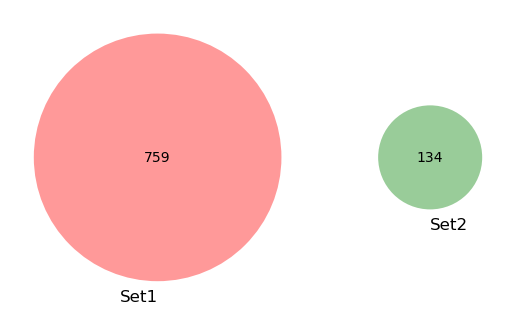

In [440]:
def draw_venn(sets):
    venn2(subsets=sets, set_labels=('Set1', 'Set2'))
    plt.show()
    
draw_venn([s1, s2])  #train_a는 순위에 있는 아이들로만 진행한다.null column만 지우면, feature가 너무 많기 때문 

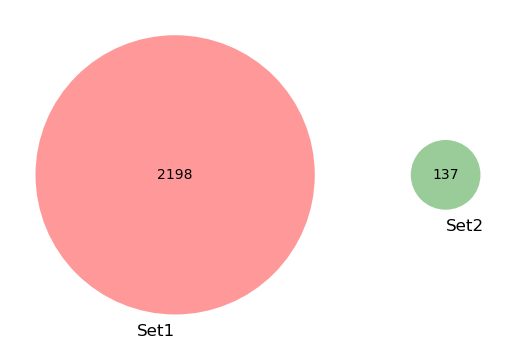

In [441]:
draw_venn([s3, s4]) #train_to는,,,, 안쓰는 null column이 너무 많다. null column만 지우고 진행

In [8]:
print(len(train_a)) #196 245
print(len(train_to))

249
349


In [420]:
def fill_nan(df): #미디언으로 해주는 이유는 yclass가 0인건 55 1인건 59 이런 식으로 규칙이 존재하기 때문에 함부로 평균을 내면 안될 것 같음
    for col in df.columns[-2875:]: #X_1 ~ X_1531 , -1345
        #모두 결측치 인 경우 채우지 않는다.
        #T304 라인만 측정된 경우, 냅두기
        #T306 라인만 측정된 경우, 냅두기

        if df[col].isnull().sum() == len(df): #모든 value가 결측치인 행
            continue
            
        elif len(df) - df[col].isnull().sum() <= 10: #너무 적은 개수만큼 측정되었다면, 그냥 채우지 않기 train_df_o의 경우 x
            continue
            
        elif df[col].isnull().sum() == 0: #모든 값이 다 측정된 경우 null 0개
            continue
            
        elif df[col].isnull().sum() < len(df): #T050이나 T010라인만 측정된 경우 어차피 값이 들어가지 않을 것임.
            nan_lst = list(df[df[col].isnull()==True].index)
            for j in nan_lst:
                yc = df['Y_Class'][j]
                line = df['LINE'][j]
                val = df[col][(df['Y_Class']==yc) & (df['LINE']==line)].median()
                df[col][j] = val

    fill_df = df    
    return fill_df

train 데이터에만 결측치의 일부 채워준다.

In [421]:
train_fill_a = fill_nan(train_a)
train_fill_to = fill_nan(train_to)

In [173]:
drop_col_a = set(train_a.columns[-2875:])-set(a_top70_list)
drop_col_to = set(train_to.columns[-2875:])-set(to_top70_list)

In [174]:
train_drop_a = train_a.drop(drop_col_a, axis = 1)
train_drop_to = train_to.drop(drop_col_to, axis = 1)

In [175]:
test_drop_a = test_a.drop(drop_col_a, axis = 1)
test_drop_to = test_to.drop(drop_col_to, axis = 1)

In [176]:
train_y = train_drop_a['Y_Class']

In [177]:
train_x = train_drop_a.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
test_x = test_drop_a.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [179]:
p1 = test_x.index.tolist() #28 #39 # 

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

In [180]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i]) #원래 column 값을 기준으로 fit.
    train_x[i] = le.transform(train_x[i]) #수치화, 수치로 변형

    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


# Modeling

# A

### randomsearch

In [181]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

param_distribs = {
    'min_child_weight': randint(low = 3, high = 5),
    'min_split_loss': randint(low = 1, high = 3),
    'max_depth': randint(low = 3, high = 6),
    'reg_lambda' : randint(low = 1, high = 2),
    'reg_alpha' : randint(low = 0, high = 1)
}
start = time.time()
xgboost_r = XGBClassifier(seed=37, learning_rate = 0.03).fit(train_x,train_y, early_stopping_rounds=50, eval_metric = 'mlogloss',
                                       eval_set = [(X_test, y_test)])
rand_cv = RandomizedSearchCV(xgboost_r, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_iter = 50,
                            scoring = 'f1_macro',
                            n_jobs = 1,
                            verbose=3)
rand_cv.fit(train_x, train_y)
preds = rand_cv.predict(test_x)
end = time.time()
# sub['Y_Class'] = preds
# subto_csv('./t34_XGB_RandomSearchCV.csv', index=False)

print(f'최적 하이퍼 파라미터: {rand_cv.best_params_}')
print(f'최고 예측 정확도: {(rand_cv.best_score_):.4f}')
print(f'time elapsed: {end-start}')

[0]	validation_0-mlogloss:1.06838
[1]	validation_0-mlogloss:1.04162
[2]	validation_0-mlogloss:1.01535
[3]	validation_0-mlogloss:0.98946
[4]	validation_0-mlogloss:0.96577
[5]	validation_0-mlogloss:0.94242
[6]	validation_0-mlogloss:0.91994
[7]	validation_0-mlogloss:0.89901
[8]	validation_0-mlogloss:0.87922
[9]	validation_0-mlogloss:0.86039
[10]	validation_0-mlogloss:0.84174
[11]	validation_0-mlogloss:0.82406
[12]	validation_0-mlogloss:0.80633
[13]	validation_0-mlogloss:0.79035
[14]	validation_0-mlogloss:0.77375
[15]	validation_0-mlogloss:0.75786
[16]	validation_0-mlogloss:0.74421
[17]	validation_0-mlogloss:0.72872
[18]	validation_0-mlogloss:0.71517
[19]	validation_0-mlogloss:0.70101
[20]	validation_0-mlogloss:0.68712
[21]	validation_0-mlogloss:0.67507
[22]	validation_0-mlogloss:0.66232
[23]	validation_0-mlogloss:0.65059
[24]	validation_0-mlogloss:0.64004
[25]	validation_0-mlogloss:0.62810
[26]	validation_0-mlogloss:0.61776
[27]	validation_0-mlogloss:0.60478
[28]	validation_0-mlogloss:0.5

[CV 4/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.550 total time=   0.9s
[CV 5/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.361 total time=   0.9s
[CV 1/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.202 total time=   1.1s
[CV 2/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.470 total time=   1.1s
[CV 3/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.465 total time=   1.1s
[CV 4/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.570 total time=   1.1s
[CV 5/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.451 total time=   1.1s
[CV 1/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.217 total time=   1.1s
[CV 2/5] END max

[CV 1/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.203 total time=   1.1s
[CV 2/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.442 total time=   1.0s
[CV 3/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.481 total time=   0.9s
[CV 4/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.567 total time=   0.9s
[CV 5/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.374 total time=   0.9s
[CV 1/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.203 total time=   1.0s
[CV 2/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.442 total time=   0.9s
[CV 3/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.481 total time=   0.9s
[CV 4/5] END max

[CV 3/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.445 total time=   0.8s
[CV 4/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.551 total time=   0.8s
[CV 5/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.441 total time=   0.8s
[CV 1/5] END max_depth=4, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.268 total time=   0.8s
[CV 2/5] END max_depth=4, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.502 total time=   0.8s
[CV 3/5] END max_depth=4, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.423 total time=   0.8s
[CV 4/5] END max_depth=4, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.543 total time=   0.8s
[CV 5/5] END max_depth=4, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.455 total time=   0.7s
[CV 1/5] END max

[CV 5/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.361 total time=   1.1s
[CV 1/5] END max_depth=3, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.234 total time=   0.7s
[CV 2/5] END max_depth=3, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.476 total time=   0.7s
[CV 3/5] END max_depth=3, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.415 total time=   0.6s
[CV 4/5] END max_depth=3, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.544 total time=   0.6s
[CV 5/5] END max_depth=3, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.404 total time=   0.6s
[CV 1/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.203 total time=   0.8s
[CV 2/5] END max_depth=4, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.442 total time=   0.8s
[CV 3/5] END max

In [191]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(n_estimators=1500)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

# 후보 파라미터 선정
params = {'max_depth':[3],
          'subsample':[0.6], #일단 1보다 아래이면 좋은지: "좋다" 나중ㅇ에 0.75추가
          'learning_rate':[0.03], #0.01, 0.02, 
          'min_child_weight':[3], #1,2,
          'reg_lambda': [1], 
          'reg_alpha' : [0.2], 
          'min_split_loss':[1.2],
          'colsample_bytree':[0.9]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(train_x, train_y, early_stopping_rounds=50, eval_metric='mlogloss', eval_set=[(X_train, y_train), (X_test, y_test)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)
print(gridcv.best_score_)

[0]	validation_0-mlogloss:1.08569	validation_1-mlogloss:1.08726
[1]	validation_0-mlogloss:1.07304	validation_1-mlogloss:1.07771
[2]	validation_0-mlogloss:1.05798	validation_1-mlogloss:1.06451
[3]	validation_0-mlogloss:1.04689	validation_1-mlogloss:1.05461
[4]	validation_0-mlogloss:1.03331	validation_1-mlogloss:1.04300
[5]	validation_0-mlogloss:1.02276	validation_1-mlogloss:1.03340
[6]	validation_0-mlogloss:1.00914	validation_1-mlogloss:1.02157
[7]	validation_0-mlogloss:0.99819	validation_1-mlogloss:1.01039
[8]	validation_0-mlogloss:0.98649	validation_1-mlogloss:1.00150
[9]	validation_0-mlogloss:0.97438	validation_1-mlogloss:0.99146
[10]	validation_0-mlogloss:0.96495	validation_1-mlogloss:0.98430
[11]	validation_0-mlogloss:0.95296	validation_1-mlogloss:0.97587
[12]	validation_0-mlogloss:0.94311	validation_1-mlogloss:0.96532
[13]	validation_0-mlogloss:0.93187	validation_1-mlogloss:0.95629
[14]	validation_0-mlogloss:0.92359	validation_1-mlogloss:0.95041
[15]	validation_0-mlogloss:0.91684	

[126]	validation_0-mlogloss:0.54115	validation_1-mlogloss:0.59802
[127]	validation_0-mlogloss:0.54002	validation_1-mlogloss:0.59599
[128]	validation_0-mlogloss:0.53897	validation_1-mlogloss:0.59464
[129]	validation_0-mlogloss:0.53807	validation_1-mlogloss:0.59462
[130]	validation_0-mlogloss:0.53742	validation_1-mlogloss:0.59445
[131]	validation_0-mlogloss:0.53756	validation_1-mlogloss:0.59336
[132]	validation_0-mlogloss:0.53752	validation_1-mlogloss:0.59381
[133]	validation_0-mlogloss:0.53774	validation_1-mlogloss:0.59359
[134]	validation_0-mlogloss:0.53702	validation_1-mlogloss:0.59336
[135]	validation_0-mlogloss:0.53703	validation_1-mlogloss:0.59185
[136]	validation_0-mlogloss:0.53547	validation_1-mlogloss:0.59082
[137]	validation_0-mlogloss:0.53447	validation_1-mlogloss:0.59069
[138]	validation_0-mlogloss:0.53360	validation_1-mlogloss:0.58934
[139]	validation_0-mlogloss:0.53310	validation_1-mlogloss:0.58831
[140]	validation_0-mlogloss:0.53242	validation_1-mlogloss:0.58843
[141]	vali

[251]	validation_0-mlogloss:0.48870	validation_1-mlogloss:0.54146
[252]	validation_0-mlogloss:0.48874	validation_1-mlogloss:0.54138
[253]	validation_0-mlogloss:0.48882	validation_1-mlogloss:0.54148
[254]	validation_0-mlogloss:0.48855	validation_1-mlogloss:0.54121
[255]	validation_0-mlogloss:0.48820	validation_1-mlogloss:0.54117
[256]	validation_0-mlogloss:0.48817	validation_1-mlogloss:0.54105
[257]	validation_0-mlogloss:0.48813	validation_1-mlogloss:0.54103
[258]	validation_0-mlogloss:0.48816	validation_1-mlogloss:0.54112
[259]	validation_0-mlogloss:0.48816	validation_1-mlogloss:0.54112
[260]	validation_0-mlogloss:0.48780	validation_1-mlogloss:0.54089
[261]	validation_0-mlogloss:0.48773	validation_1-mlogloss:0.54071
[262]	validation_0-mlogloss:0.48736	validation_1-mlogloss:0.54077
[263]	validation_0-mlogloss:0.48695	validation_1-mlogloss:0.53977
[264]	validation_0-mlogloss:0.48600	validation_1-mlogloss:0.53864
[265]	validation_0-mlogloss:0.48535	validation_1-mlogloss:0.53836
[266]	vali

[33]	validation_0-mlogloss:0.77575	validation_1-mlogloss:0.84636
[34]	validation_0-mlogloss:0.77008	validation_1-mlogloss:0.84032
[35]	validation_0-mlogloss:0.76531	validation_1-mlogloss:0.83548
[36]	validation_0-mlogloss:0.76093	validation_1-mlogloss:0.83253
[37]	validation_0-mlogloss:0.75525	validation_1-mlogloss:0.82974
[38]	validation_0-mlogloss:0.75088	validation_1-mlogloss:0.82555
[39]	validation_0-mlogloss:0.74489	validation_1-mlogloss:0.81985
[40]	validation_0-mlogloss:0.73790	validation_1-mlogloss:0.81415
[41]	validation_0-mlogloss:0.73365	validation_1-mlogloss:0.81079
[42]	validation_0-mlogloss:0.72820	validation_1-mlogloss:0.80556
[43]	validation_0-mlogloss:0.72322	validation_1-mlogloss:0.80150
[44]	validation_0-mlogloss:0.71867	validation_1-mlogloss:0.79810
[45]	validation_0-mlogloss:0.71396	validation_1-mlogloss:0.79309
[46]	validation_0-mlogloss:0.71112	validation_1-mlogloss:0.79125
[47]	validation_0-mlogloss:0.70680	validation_1-mlogloss:0.78956
[48]	validation_0-mloglos

[159]	validation_0-mlogloss:0.49167	validation_1-mlogloss:0.60885
[160]	validation_0-mlogloss:0.49030	validation_1-mlogloss:0.60834
[161]	validation_0-mlogloss:0.48959	validation_1-mlogloss:0.60844
[162]	validation_0-mlogloss:0.48927	validation_1-mlogloss:0.60783
[163]	validation_0-mlogloss:0.48892	validation_1-mlogloss:0.60815
[164]	validation_0-mlogloss:0.48809	validation_1-mlogloss:0.60718
[165]	validation_0-mlogloss:0.48776	validation_1-mlogloss:0.60653
[166]	validation_0-mlogloss:0.48660	validation_1-mlogloss:0.60618
[167]	validation_0-mlogloss:0.48608	validation_1-mlogloss:0.60556
[168]	validation_0-mlogloss:0.48488	validation_1-mlogloss:0.60385
[169]	validation_0-mlogloss:0.48383	validation_1-mlogloss:0.60295
[170]	validation_0-mlogloss:0.48311	validation_1-mlogloss:0.60102
[171]	validation_0-mlogloss:0.48311	validation_1-mlogloss:0.60097
[172]	validation_0-mlogloss:0.48212	validation_1-mlogloss:0.60077
[173]	validation_0-mlogloss:0.48173	validation_1-mlogloss:0.60124
[174]	vali

[8]	validation_0-mlogloss:0.97329	validation_1-mlogloss:1.01104
[9]	validation_0-mlogloss:0.96278	validation_1-mlogloss:1.00515
[10]	validation_0-mlogloss:0.95057	validation_1-mlogloss:0.99688
[11]	validation_0-mlogloss:0.93913	validation_1-mlogloss:0.98898
[12]	validation_0-mlogloss:0.92841	validation_1-mlogloss:0.98377
[13]	validation_0-mlogloss:0.91866	validation_1-mlogloss:0.97679
[14]	validation_0-mlogloss:0.91059	validation_1-mlogloss:0.97100
[15]	validation_0-mlogloss:0.89979	validation_1-mlogloss:0.96256
[16]	validation_0-mlogloss:0.89027	validation_1-mlogloss:0.95476
[17]	validation_0-mlogloss:0.88104	validation_1-mlogloss:0.94837
[18]	validation_0-mlogloss:0.87450	validation_1-mlogloss:0.94444
[19]	validation_0-mlogloss:0.86534	validation_1-mlogloss:0.93692
[20]	validation_0-mlogloss:0.85621	validation_1-mlogloss:0.92941
[21]	validation_0-mlogloss:0.84636	validation_1-mlogloss:0.92390
[22]	validation_0-mlogloss:0.83840	validation_1-mlogloss:0.91904
[23]	validation_0-mlogloss:

[134]	validation_0-mlogloss:0.53596	validation_1-mlogloss:0.69179
[135]	validation_0-mlogloss:0.53556	validation_1-mlogloss:0.69111
[136]	validation_0-mlogloss:0.53521	validation_1-mlogloss:0.68828
[137]	validation_0-mlogloss:0.53477	validation_1-mlogloss:0.68766
[138]	validation_0-mlogloss:0.53482	validation_1-mlogloss:0.68641
[139]	validation_0-mlogloss:0.53414	validation_1-mlogloss:0.68657
[140]	validation_0-mlogloss:0.53344	validation_1-mlogloss:0.68472
[141]	validation_0-mlogloss:0.53246	validation_1-mlogloss:0.68277
[142]	validation_0-mlogloss:0.53132	validation_1-mlogloss:0.68015
[143]	validation_0-mlogloss:0.53068	validation_1-mlogloss:0.67956
[144]	validation_0-mlogloss:0.52987	validation_1-mlogloss:0.67894
[145]	validation_0-mlogloss:0.52913	validation_1-mlogloss:0.67834
[146]	validation_0-mlogloss:0.52802	validation_1-mlogloss:0.67810
[147]	validation_0-mlogloss:0.52706	validation_1-mlogloss:0.67642
[148]	validation_0-mlogloss:0.52630	validation_1-mlogloss:0.67666
[149]	vali

[259]	validation_0-mlogloss:0.49240	validation_1-mlogloss:0.64185
[260]	validation_0-mlogloss:0.49242	validation_1-mlogloss:0.64185
[261]	validation_0-mlogloss:0.49268	validation_1-mlogloss:0.64136
[262]	validation_0-mlogloss:0.49261	validation_1-mlogloss:0.64077
[263]	validation_0-mlogloss:0.49243	validation_1-mlogloss:0.64060
[264]	validation_0-mlogloss:0.49235	validation_1-mlogloss:0.64055
[265]	validation_0-mlogloss:0.49229	validation_1-mlogloss:0.64039
[266]	validation_0-mlogloss:0.49230	validation_1-mlogloss:0.64044
[267]	validation_0-mlogloss:0.49214	validation_1-mlogloss:0.64026
[268]	validation_0-mlogloss:0.49191	validation_1-mlogloss:0.64010
[269]	validation_0-mlogloss:0.49184	validation_1-mlogloss:0.63987
[270]	validation_0-mlogloss:0.49184	validation_1-mlogloss:0.63991
[271]	validation_0-mlogloss:0.49187	validation_1-mlogloss:0.63979
[272]	validation_0-mlogloss:0.49183	validation_1-mlogloss:0.63971
[273]	validation_0-mlogloss:0.49152	validation_1-mlogloss:0.63974
[274]	vali

[384]	validation_0-mlogloss:0.48379	validation_1-mlogloss:0.63205
[385]	validation_0-mlogloss:0.48392	validation_1-mlogloss:0.63219
[386]	validation_0-mlogloss:0.48400	validation_1-mlogloss:0.63220
[387]	validation_0-mlogloss:0.48345	validation_1-mlogloss:0.63185
[388]	validation_0-mlogloss:0.48324	validation_1-mlogloss:0.63168
[389]	validation_0-mlogloss:0.48322	validation_1-mlogloss:0.63156
[390]	validation_0-mlogloss:0.48323	validation_1-mlogloss:0.63166
[391]	validation_0-mlogloss:0.48324	validation_1-mlogloss:0.63170
[392]	validation_0-mlogloss:0.48281	validation_1-mlogloss:0.63075
[393]	validation_0-mlogloss:0.48295	validation_1-mlogloss:0.63113
[394]	validation_0-mlogloss:0.48268	validation_1-mlogloss:0.63088
[395]	validation_0-mlogloss:0.48274	validation_1-mlogloss:0.63089
[396]	validation_0-mlogloss:0.48278	validation_1-mlogloss:0.63088
[397]	validation_0-mlogloss:0.48308	validation_1-mlogloss:0.63064
[398]	validation_0-mlogloss:0.48302	validation_1-mlogloss:0.63047
[399]	vali

[509]	validation_0-mlogloss:0.47862	validation_1-mlogloss:0.62761
[510]	validation_0-mlogloss:0.47866	validation_1-mlogloss:0.62764
[511]	validation_0-mlogloss:0.47836	validation_1-mlogloss:0.62798
[512]	validation_0-mlogloss:0.47836	validation_1-mlogloss:0.62789
[513]	validation_0-mlogloss:0.47845	validation_1-mlogloss:0.62795
[514]	validation_0-mlogloss:0.47859	validation_1-mlogloss:0.62815
[515]	validation_0-mlogloss:0.47863	validation_1-mlogloss:0.62820
[516]	validation_0-mlogloss:0.47855	validation_1-mlogloss:0.62812
[517]	validation_0-mlogloss:0.47855	validation_1-mlogloss:0.62817
[518]	validation_0-mlogloss:0.47855	validation_1-mlogloss:0.62816
[519]	validation_0-mlogloss:0.47849	validation_1-mlogloss:0.62810
[520]	validation_0-mlogloss:0.47847	validation_1-mlogloss:0.62799
[521]	validation_0-mlogloss:0.47842	validation_1-mlogloss:0.62803
[522]	validation_0-mlogloss:0.47852	validation_1-mlogloss:0.62804
[523]	validation_0-mlogloss:0.47854	validation_1-mlogloss:0.62791
[524]	vali

[43]	validation_0-mlogloss:0.73271	validation_1-mlogloss:0.78538
[44]	validation_0-mlogloss:0.72739	validation_1-mlogloss:0.78177
[45]	validation_0-mlogloss:0.72142	validation_1-mlogloss:0.77708
[46]	validation_0-mlogloss:0.71802	validation_1-mlogloss:0.77327
[47]	validation_0-mlogloss:0.71252	validation_1-mlogloss:0.76867
[48]	validation_0-mlogloss:0.70836	validation_1-mlogloss:0.76472
[49]	validation_0-mlogloss:0.70396	validation_1-mlogloss:0.76291
[50]	validation_0-mlogloss:0.69972	validation_1-mlogloss:0.75826
[51]	validation_0-mlogloss:0.69546	validation_1-mlogloss:0.75503
[52]	validation_0-mlogloss:0.69122	validation_1-mlogloss:0.75239
[53]	validation_0-mlogloss:0.68776	validation_1-mlogloss:0.74799
[54]	validation_0-mlogloss:0.68320	validation_1-mlogloss:0.74597
[55]	validation_0-mlogloss:0.68028	validation_1-mlogloss:0.74459
[56]	validation_0-mlogloss:0.67641	validation_1-mlogloss:0.74191
[57]	validation_0-mlogloss:0.67357	validation_1-mlogloss:0.74020
[58]	validation_0-mloglos

[168]	validation_0-mlogloss:0.50540	validation_1-mlogloss:0.57004
[169]	validation_0-mlogloss:0.50550	validation_1-mlogloss:0.57020
[170]	validation_0-mlogloss:0.50555	validation_1-mlogloss:0.57002
[171]	validation_0-mlogloss:0.50512	validation_1-mlogloss:0.56917
[172]	validation_0-mlogloss:0.50473	validation_1-mlogloss:0.56859
[173]	validation_0-mlogloss:0.50408	validation_1-mlogloss:0.56800
[174]	validation_0-mlogloss:0.50357	validation_1-mlogloss:0.56709
[175]	validation_0-mlogloss:0.50329	validation_1-mlogloss:0.56676
[176]	validation_0-mlogloss:0.50327	validation_1-mlogloss:0.56705
[177]	validation_0-mlogloss:0.50212	validation_1-mlogloss:0.56603
[178]	validation_0-mlogloss:0.50170	validation_1-mlogloss:0.56564
[179]	validation_0-mlogloss:0.50051	validation_1-mlogloss:0.56571
[180]	validation_0-mlogloss:0.50075	validation_1-mlogloss:0.56502
[181]	validation_0-mlogloss:0.50024	validation_1-mlogloss:0.56401
[182]	validation_0-mlogloss:0.50017	validation_1-mlogloss:0.56436
[183]	vali

[293]	validation_0-mlogloss:0.47539	validation_1-mlogloss:0.53775
[294]	validation_0-mlogloss:0.47544	validation_1-mlogloss:0.53781
[295]	validation_0-mlogloss:0.47561	validation_1-mlogloss:0.53785
[296]	validation_0-mlogloss:0.47567	validation_1-mlogloss:0.53795
[297]	validation_0-mlogloss:0.47561	validation_1-mlogloss:0.53784
[298]	validation_0-mlogloss:0.47562	validation_1-mlogloss:0.53786
[299]	validation_0-mlogloss:0.47554	validation_1-mlogloss:0.53779
[300]	validation_0-mlogloss:0.47547	validation_1-mlogloss:0.53748
[301]	validation_0-mlogloss:0.47551	validation_1-mlogloss:0.53760
[302]	validation_0-mlogloss:0.47504	validation_1-mlogloss:0.53727
[303]	validation_0-mlogloss:0.47515	validation_1-mlogloss:0.53744
[304]	validation_0-mlogloss:0.47513	validation_1-mlogloss:0.53749
[305]	validation_0-mlogloss:0.47518	validation_1-mlogloss:0.53755
[306]	validation_0-mlogloss:0.47537	validation_1-mlogloss:0.53777
[307]	validation_0-mlogloss:0.47547	validation_1-mlogloss:0.53789
[308]	vali

[80]	validation_0-mlogloss:0.59100	validation_1-mlogloss:0.69406
[81]	validation_0-mlogloss:0.58870	validation_1-mlogloss:0.69303
[82]	validation_0-mlogloss:0.58630	validation_1-mlogloss:0.69198
[83]	validation_0-mlogloss:0.58483	validation_1-mlogloss:0.68843
[84]	validation_0-mlogloss:0.58266	validation_1-mlogloss:0.68635
[85]	validation_0-mlogloss:0.58096	validation_1-mlogloss:0.68527
[86]	validation_0-mlogloss:0.57789	validation_1-mlogloss:0.68373
[87]	validation_0-mlogloss:0.57590	validation_1-mlogloss:0.68155
[88]	validation_0-mlogloss:0.57391	validation_1-mlogloss:0.67822
[89]	validation_0-mlogloss:0.57147	validation_1-mlogloss:0.67667
[90]	validation_0-mlogloss:0.56869	validation_1-mlogloss:0.67526
[91]	validation_0-mlogloss:0.56747	validation_1-mlogloss:0.67287
[92]	validation_0-mlogloss:0.56513	validation_1-mlogloss:0.67106
[93]	validation_0-mlogloss:0.56263	validation_1-mlogloss:0.66954
[94]	validation_0-mlogloss:0.56099	validation_1-mlogloss:0.66697
[95]	validation_0-mloglos

[205]	validation_0-mlogloss:0.47013	validation_1-mlogloss:0.58046
[206]	validation_0-mlogloss:0.46995	validation_1-mlogloss:0.58113
[207]	validation_0-mlogloss:0.46948	validation_1-mlogloss:0.58167
[208]	validation_0-mlogloss:0.46937	validation_1-mlogloss:0.58213
[209]	validation_0-mlogloss:0.46906	validation_1-mlogloss:0.58359
[210]	validation_0-mlogloss:0.46904	validation_1-mlogloss:0.58375
[211]	validation_0-mlogloss:0.46828	validation_1-mlogloss:0.58324
[212]	validation_0-mlogloss:0.46785	validation_1-mlogloss:0.58301
[213]	validation_0-mlogloss:0.46725	validation_1-mlogloss:0.58316
[214]	validation_0-mlogloss:0.46650	validation_1-mlogloss:0.58246
[215]	validation_0-mlogloss:0.46605	validation_1-mlogloss:0.58233
[216]	validation_0-mlogloss:0.46596	validation_1-mlogloss:0.58202
[217]	validation_0-mlogloss:0.46535	validation_1-mlogloss:0.58132
[218]	validation_0-mlogloss:0.46475	validation_1-mlogloss:0.58023
[219]	validation_0-mlogloss:0.46474	validation_1-mlogloss:0.58023
[220]	vali

[55]	validation_0-mlogloss:0.66262	validation_1-mlogloss:0.79925
[56]	validation_0-mlogloss:0.65947	validation_1-mlogloss:0.79682
[57]	validation_0-mlogloss:0.65648	validation_1-mlogloss:0.79550
[58]	validation_0-mlogloss:0.65482	validation_1-mlogloss:0.79364
[59]	validation_0-mlogloss:0.65140	validation_1-mlogloss:0.79028
[60]	validation_0-mlogloss:0.64839	validation_1-mlogloss:0.78888
[61]	validation_0-mlogloss:0.64515	validation_1-mlogloss:0.78503
[62]	validation_0-mlogloss:0.64277	validation_1-mlogloss:0.78175
[63]	validation_0-mlogloss:0.63936	validation_1-mlogloss:0.77847
[64]	validation_0-mlogloss:0.63704	validation_1-mlogloss:0.77739
[65]	validation_0-mlogloss:0.63471	validation_1-mlogloss:0.77560
[66]	validation_0-mlogloss:0.63122	validation_1-mlogloss:0.77399
[67]	validation_0-mlogloss:0.62853	validation_1-mlogloss:0.77130
[68]	validation_0-mlogloss:0.62502	validation_1-mlogloss:0.76953
[69]	validation_0-mlogloss:0.62229	validation_1-mlogloss:0.76687
[70]	validation_0-mloglos

[180]	validation_0-mlogloss:0.50834	validation_1-mlogloss:0.65678
[181]	validation_0-mlogloss:0.50730	validation_1-mlogloss:0.65496
[182]	validation_0-mlogloss:0.50699	validation_1-mlogloss:0.65437
[183]	validation_0-mlogloss:0.50632	validation_1-mlogloss:0.65378
[184]	validation_0-mlogloss:0.50640	validation_1-mlogloss:0.65395
[185]	validation_0-mlogloss:0.50609	validation_1-mlogloss:0.65426
[186]	validation_0-mlogloss:0.50593	validation_1-mlogloss:0.65394
[187]	validation_0-mlogloss:0.50564	validation_1-mlogloss:0.65390
[188]	validation_0-mlogloss:0.50547	validation_1-mlogloss:0.65379
[189]	validation_0-mlogloss:0.50509	validation_1-mlogloss:0.65353
[190]	validation_0-mlogloss:0.50468	validation_1-mlogloss:0.65308
[191]	validation_0-mlogloss:0.50414	validation_1-mlogloss:0.65245
[192]	validation_0-mlogloss:0.50404	validation_1-mlogloss:0.65185
[193]	validation_0-mlogloss:0.50321	validation_1-mlogloss:0.65141
[194]	validation_0-mlogloss:0.50319	validation_1-mlogloss:0.65128
[195]	vali

[305]	validation_0-mlogloss:0.48619	validation_1-mlogloss:0.63221
[306]	validation_0-mlogloss:0.48617	validation_1-mlogloss:0.63223
[307]	validation_0-mlogloss:0.48571	validation_1-mlogloss:0.63209
[308]	validation_0-mlogloss:0.48570	validation_1-mlogloss:0.63188
[309]	validation_0-mlogloss:0.48575	validation_1-mlogloss:0.63192
[310]	validation_0-mlogloss:0.48537	validation_1-mlogloss:0.63191
[311]	validation_0-mlogloss:0.48543	validation_1-mlogloss:0.63191
[312]	validation_0-mlogloss:0.48522	validation_1-mlogloss:0.63169
[313]	validation_0-mlogloss:0.48530	validation_1-mlogloss:0.63175
[314]	validation_0-mlogloss:0.48515	validation_1-mlogloss:0.63126
[315]	validation_0-mlogloss:0.48537	validation_1-mlogloss:0.63153
[316]	validation_0-mlogloss:0.48520	validation_1-mlogloss:0.63088
[317]	validation_0-mlogloss:0.48520	validation_1-mlogloss:0.63078
[318]	validation_0-mlogloss:0.48517	validation_1-mlogloss:0.63072
[319]	validation_0-mlogloss:0.48468	validation_1-mlogloss:0.63076
[320]	vali

[430]	validation_0-mlogloss:0.47913	validation_1-mlogloss:0.62522
[431]	validation_0-mlogloss:0.47902	validation_1-mlogloss:0.62493
[432]	validation_0-mlogloss:0.47897	validation_1-mlogloss:0.62498
[433]	validation_0-mlogloss:0.47887	validation_1-mlogloss:0.62483
[434]	validation_0-mlogloss:0.47890	validation_1-mlogloss:0.62494
[435]	validation_0-mlogloss:0.47881	validation_1-mlogloss:0.62408
[436]	validation_0-mlogloss:0.47878	validation_1-mlogloss:0.62402
[437]	validation_0-mlogloss:0.47897	validation_1-mlogloss:0.62417
[438]	validation_0-mlogloss:0.47898	validation_1-mlogloss:0.62421
[439]	validation_0-mlogloss:0.47886	validation_1-mlogloss:0.62423
[440]	validation_0-mlogloss:0.47894	validation_1-mlogloss:0.62438
[441]	validation_0-mlogloss:0.47901	validation_1-mlogloss:0.62451
[442]	validation_0-mlogloss:0.47910	validation_1-mlogloss:0.62455
[443]	validation_0-mlogloss:0.47936	validation_1-mlogloss:0.62366
[444]	validation_0-mlogloss:0.47938	validation_1-mlogloss:0.62368
[445]	vali

[89]	validation_0-mlogloss:0.44240	validation_1-mlogloss:0.54916
[90]	validation_0-mlogloss:0.43952	validation_1-mlogloss:0.54766
[91]	validation_0-mlogloss:0.43663	validation_1-mlogloss:0.54603
[92]	validation_0-mlogloss:0.43361	validation_1-mlogloss:0.54298
[93]	validation_0-mlogloss:0.43161	validation_1-mlogloss:0.54023
[94]	validation_0-mlogloss:0.42919	validation_1-mlogloss:0.53714
[95]	validation_0-mlogloss:0.42604	validation_1-mlogloss:0.53468
[96]	validation_0-mlogloss:0.42389	validation_1-mlogloss:0.53355
[97]	validation_0-mlogloss:0.42119	validation_1-mlogloss:0.53068
[98]	validation_0-mlogloss:0.41805	validation_1-mlogloss:0.52770
[99]	validation_0-mlogloss:0.41571	validation_1-mlogloss:0.52483
[100]	validation_0-mlogloss:0.41370	validation_1-mlogloss:0.52290
[101]	validation_0-mlogloss:0.41154	validation_1-mlogloss:0.52029
[102]	validation_0-mlogloss:0.40930	validation_1-mlogloss:0.51792
[103]	validation_0-mlogloss:0.40718	validation_1-mlogloss:0.51484
[104]	validation_0-ml

[214]	validation_0-mlogloss:0.26091	validation_1-mlogloss:0.35536
[215]	validation_0-mlogloss:0.26035	validation_1-mlogloss:0.35473
[216]	validation_0-mlogloss:0.25998	validation_1-mlogloss:0.35383
[217]	validation_0-mlogloss:0.25978	validation_1-mlogloss:0.35371
[218]	validation_0-mlogloss:0.25946	validation_1-mlogloss:0.35292
[219]	validation_0-mlogloss:0.25843	validation_1-mlogloss:0.35174
[220]	validation_0-mlogloss:0.25804	validation_1-mlogloss:0.35158
[221]	validation_0-mlogloss:0.25741	validation_1-mlogloss:0.35057
[222]	validation_0-mlogloss:0.25740	validation_1-mlogloss:0.35063
[223]	validation_0-mlogloss:0.25677	validation_1-mlogloss:0.35052
[224]	validation_0-mlogloss:0.25590	validation_1-mlogloss:0.35056
[225]	validation_0-mlogloss:0.25498	validation_1-mlogloss:0.35000
[226]	validation_0-mlogloss:0.25482	validation_1-mlogloss:0.34983
[227]	validation_0-mlogloss:0.25384	validation_1-mlogloss:0.34990
[228]	validation_0-mlogloss:0.25340	validation_1-mlogloss:0.34946
[229]	vali

[339]	validation_0-mlogloss:0.22300	validation_1-mlogloss:0.31344
[340]	validation_0-mlogloss:0.22300	validation_1-mlogloss:0.31345
[341]	validation_0-mlogloss:0.22268	validation_1-mlogloss:0.31355
[342]	validation_0-mlogloss:0.22226	validation_1-mlogloss:0.31297
[343]	validation_0-mlogloss:0.22149	validation_1-mlogloss:0.31249
[344]	validation_0-mlogloss:0.22149	validation_1-mlogloss:0.31248
[345]	validation_0-mlogloss:0.22115	validation_1-mlogloss:0.31227
[346]	validation_0-mlogloss:0.22115	validation_1-mlogloss:0.31227
[347]	validation_0-mlogloss:0.22115	validation_1-mlogloss:0.31230
[348]	validation_0-mlogloss:0.22070	validation_1-mlogloss:0.31198
[349]	validation_0-mlogloss:0.22041	validation_1-mlogloss:0.31166
[350]	validation_0-mlogloss:0.22002	validation_1-mlogloss:0.31095
[351]	validation_0-mlogloss:0.21942	validation_1-mlogloss:0.31029
[352]	validation_0-mlogloss:0.21912	validation_1-mlogloss:0.31010
[353]	validation_0-mlogloss:0.21912	validation_1-mlogloss:0.31009
[354]	vali

[464]	validation_0-mlogloss:0.20932	validation_1-mlogloss:0.29847
[465]	validation_0-mlogloss:0.20896	validation_1-mlogloss:0.29836
[466]	validation_0-mlogloss:0.20896	validation_1-mlogloss:0.29836
[467]	validation_0-mlogloss:0.20896	validation_1-mlogloss:0.29834
[468]	validation_0-mlogloss:0.20859	validation_1-mlogloss:0.29747
[469]	validation_0-mlogloss:0.20840	validation_1-mlogloss:0.29733
[470]	validation_0-mlogloss:0.20839	validation_1-mlogloss:0.29738
[471]	validation_0-mlogloss:0.20839	validation_1-mlogloss:0.29736
[472]	validation_0-mlogloss:0.20840	validation_1-mlogloss:0.29733
[473]	validation_0-mlogloss:0.20840	validation_1-mlogloss:0.29732
[474]	validation_0-mlogloss:0.20840	validation_1-mlogloss:0.29732
[475]	validation_0-mlogloss:0.20839	validation_1-mlogloss:0.29735
[476]	validation_0-mlogloss:0.20785	validation_1-mlogloss:0.29595
[477]	validation_0-mlogloss:0.20785	validation_1-mlogloss:0.29596
[478]	validation_0-mlogloss:0.20771	validation_1-mlogloss:0.29572
[479]	vali

[589]	validation_0-mlogloss:0.20145	validation_1-mlogloss:0.28766
[590]	validation_0-mlogloss:0.20145	validation_1-mlogloss:0.28763
[591]	validation_0-mlogloss:0.20145	validation_1-mlogloss:0.28767
[592]	validation_0-mlogloss:0.20122	validation_1-mlogloss:0.28792
[593]	validation_0-mlogloss:0.20100	validation_1-mlogloss:0.28785
[594]	validation_0-mlogloss:0.20100	validation_1-mlogloss:0.28784
[595]	validation_0-mlogloss:0.20100	validation_1-mlogloss:0.28785
[596]	validation_0-mlogloss:0.20078	validation_1-mlogloss:0.28765
[597]	validation_0-mlogloss:0.20078	validation_1-mlogloss:0.28764
[598]	validation_0-mlogloss:0.20044	validation_1-mlogloss:0.28685
[599]	validation_0-mlogloss:0.20044	validation_1-mlogloss:0.28686
[600]	validation_0-mlogloss:0.20045	validation_1-mlogloss:0.28683
[601]	validation_0-mlogloss:0.20044	validation_1-mlogloss:0.28683
[602]	validation_0-mlogloss:0.20025	validation_1-mlogloss:0.28646
[603]	validation_0-mlogloss:0.20026	validation_1-mlogloss:0.28643
[604]	vali

[714]	validation_0-mlogloss:0.19483	validation_1-mlogloss:0.27881
[715]	validation_0-mlogloss:0.19483	validation_1-mlogloss:0.27884
[716]	validation_0-mlogloss:0.19482	validation_1-mlogloss:0.27886
[717]	validation_0-mlogloss:0.19483	validation_1-mlogloss:0.27884
[718]	validation_0-mlogloss:0.19482	validation_1-mlogloss:0.27888
[719]	validation_0-mlogloss:0.19482	validation_1-mlogloss:0.27888
[720]	validation_0-mlogloss:0.19482	validation_1-mlogloss:0.27885
[721]	validation_0-mlogloss:0.19466	validation_1-mlogloss:0.27858
[722]	validation_0-mlogloss:0.19451	validation_1-mlogloss:0.27845
[723]	validation_0-mlogloss:0.19451	validation_1-mlogloss:0.27843
[724]	validation_0-mlogloss:0.19451	validation_1-mlogloss:0.27842
[725]	validation_0-mlogloss:0.19451	validation_1-mlogloss:0.27840
[726]	validation_0-mlogloss:0.19452	validation_1-mlogloss:0.27839
[727]	validation_0-mlogloss:0.19452	validation_1-mlogloss:0.27836
[728]	validation_0-mlogloss:0.19436	validation_1-mlogloss:0.27782
[729]	vali

[839]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27127
[840]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27126
[841]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27127
[842]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27124
[843]	validation_0-mlogloss:0.19048	validation_1-mlogloss:0.27120
[844]	validation_0-mlogloss:0.19048	validation_1-mlogloss:0.27118
[845]	validation_0-mlogloss:0.19049	validation_1-mlogloss:0.27117
[846]	validation_0-mlogloss:0.19049	validation_1-mlogloss:0.27116
[847]	validation_0-mlogloss:0.19048	validation_1-mlogloss:0.27119
[848]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27127
[849]	validation_0-mlogloss:0.19047	validation_1-mlogloss:0.27123
[850]	validation_0-mlogloss:0.19047	validation_1-mlogloss:0.27121
[851]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27124
[852]	validation_0-mlogloss:0.19046	validation_1-mlogloss:0.27126
[853]	validation_0-mlogloss:0.19023	validation_1-mlogloss:0.27061
[854]	vali

[1086]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26248
[1087]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26246
[1088]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26244
[1089]	validation_0-mlogloss:0.18465	validation_1-mlogloss:0.26243
[1090]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26244
[1091]	validation_0-mlogloss:0.18463	validation_1-mlogloss:0.26249
[1092]	validation_0-mlogloss:0.18463	validation_1-mlogloss:0.26251
[1093]	validation_0-mlogloss:0.18462	validation_1-mlogloss:0.26254
[1094]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26248
[1095]	validation_0-mlogloss:0.18463	validation_1-mlogloss:0.26248
[1096]	validation_0-mlogloss:0.18465	validation_1-mlogloss:0.26243
[1097]	validation_0-mlogloss:0.18465	validation_1-mlogloss:0.26243
[1098]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26246
[1099]	validation_0-mlogloss:0.18464	validation_1-mlogloss:0.26246
[1100]	validation_0-mlogloss:0.18435	validation_1-mlogloss:0.2

[1209]	validation_0-mlogloss:0.18292	validation_1-mlogloss:0.26035
[1210]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1211]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1212]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1213]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1214]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26031
[1215]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1216]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26033
[1217]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1218]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26032
[1219]	validation_0-mlogloss:0.18292	validation_1-mlogloss:0.26034
[1220]	validation_0-mlogloss:0.18293	validation_1-mlogloss:0.26031
[1221]	validation_0-mlogloss:0.18292	validation_1-mlogloss:0.26034
[1222]	validation_0-mlogloss:0.18292	validation_1-mlogloss:0.26037
[1223]	validation_0-mlogloss:0.18292	validation_1-mlogloss:0.2

In [192]:
preds_g = gridcv.predict(test_x)
preds_g

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [103]:
xgboost = XGBClassifier(seed=37, n_estimators = 1500, 
                        learning_rate = 0.03, 
                        max_depth = 3, 
                        min_child_weight = 3, 
                        min_split_loss = 1.3, #gamma
                        colsample_bytree = 1,
                        reg_lambda = 1.2, 
                        reg_alpha = 0.2,
                        subsample = 0.7,
                        ).fit(train_x,train_y, 
                                          early_stopping_rounds=100, 
                                              eval_metric = 'mlogloss',
                                               eval_set = [(X_train, y_train), (X_test, y_test)])

preds = xgboost.predict(test_x,ntree_limit = xgboost.best_ntree_limit)

[0]	validation_0-mlogloss:1.08222	validation_1-mlogloss:1.08601
[1]	validation_0-mlogloss:1.06518	validation_1-mlogloss:1.07442
[2]	validation_0-mlogloss:1.04845	validation_1-mlogloss:1.06158
[3]	validation_0-mlogloss:1.03294	validation_1-mlogloss:1.04677
[4]	validation_0-mlogloss:1.01553	validation_1-mlogloss:1.03292
[5]	validation_0-mlogloss:1.00195	validation_1-mlogloss:1.02243
[6]	validation_0-mlogloss:0.98894	validation_1-mlogloss:1.01134
[7]	validation_0-mlogloss:0.97590	validation_1-mlogloss:0.99905
[8]	validation_0-mlogloss:0.96338	validation_1-mlogloss:0.98868
[9]	validation_0-mlogloss:0.94844	validation_1-mlogloss:0.97790
[10]	validation_0-mlogloss:0.93597	validation_1-mlogloss:0.96689
[11]	validation_0-mlogloss:0.92451	validation_1-mlogloss:0.95925
[12]	validation_0-mlogloss:0.91230	validation_1-mlogloss:0.94831
[13]	validation_0-mlogloss:0.90089	validation_1-mlogloss:0.94069
[14]	validation_0-mlogloss:0.88941	validation_1-mlogloss:0.93346
[15]	validation_0-mlogloss:0.87835	

[126]	validation_0-mlogloss:0.39002	validation_1-mlogloss:0.51415
[127]	validation_0-mlogloss:0.38794	validation_1-mlogloss:0.51317
[128]	validation_0-mlogloss:0.38607	validation_1-mlogloss:0.51194
[129]	validation_0-mlogloss:0.38485	validation_1-mlogloss:0.51037
[130]	validation_0-mlogloss:0.38328	validation_1-mlogloss:0.50861
[131]	validation_0-mlogloss:0.38177	validation_1-mlogloss:0.50719
[132]	validation_0-mlogloss:0.37943	validation_1-mlogloss:0.50537
[133]	validation_0-mlogloss:0.37724	validation_1-mlogloss:0.50292
[134]	validation_0-mlogloss:0.37595	validation_1-mlogloss:0.50215
[135]	validation_0-mlogloss:0.37493	validation_1-mlogloss:0.50145
[136]	validation_0-mlogloss:0.37304	validation_1-mlogloss:0.50058
[137]	validation_0-mlogloss:0.37159	validation_1-mlogloss:0.49936
[138]	validation_0-mlogloss:0.37024	validation_1-mlogloss:0.49884
[139]	validation_0-mlogloss:0.36828	validation_1-mlogloss:0.49872
[140]	validation_0-mlogloss:0.36685	validation_1-mlogloss:0.49602
[141]	vali

[375]	validation_0-mlogloss:0.25426	validation_1-mlogloss:0.36484
[376]	validation_0-mlogloss:0.25427	validation_1-mlogloss:0.36476
[377]	validation_0-mlogloss:0.25397	validation_1-mlogloss:0.36482
[378]	validation_0-mlogloss:0.25393	validation_1-mlogloss:0.36500
[379]	validation_0-mlogloss:0.25349	validation_1-mlogloss:0.36323
[380]	validation_0-mlogloss:0.25348	validation_1-mlogloss:0.36329
[381]	validation_0-mlogloss:0.25346	validation_1-mlogloss:0.36336
[382]	validation_0-mlogloss:0.25329	validation_1-mlogloss:0.36302
[383]	validation_0-mlogloss:0.25297	validation_1-mlogloss:0.36244
[384]	validation_0-mlogloss:0.25241	validation_1-mlogloss:0.36270
[385]	validation_0-mlogloss:0.25241	validation_1-mlogloss:0.36268
[386]	validation_0-mlogloss:0.25224	validation_1-mlogloss:0.36263
[387]	validation_0-mlogloss:0.25187	validation_1-mlogloss:0.36153
[388]	validation_0-mlogloss:0.25185	validation_1-mlogloss:0.36165
[389]	validation_0-mlogloss:0.25169	validation_1-mlogloss:0.36125
[390]	vali

[500]	validation_0-mlogloss:0.23930	validation_1-mlogloss:0.34406
[501]	validation_0-mlogloss:0.23930	validation_1-mlogloss:0.34407
[502]	validation_0-mlogloss:0.23930	validation_1-mlogloss:0.34407
[503]	validation_0-mlogloss:0.23930	validation_1-mlogloss:0.34404
[504]	validation_0-mlogloss:0.23915	validation_1-mlogloss:0.34401
[505]	validation_0-mlogloss:0.23914	validation_1-mlogloss:0.34404
[506]	validation_0-mlogloss:0.23914	validation_1-mlogloss:0.34406
[507]	validation_0-mlogloss:0.23914	validation_1-mlogloss:0.34406
[508]	validation_0-mlogloss:0.23900	validation_1-mlogloss:0.34403
[509]	validation_0-mlogloss:0.23900	validation_1-mlogloss:0.34400
[510]	validation_0-mlogloss:0.23902	validation_1-mlogloss:0.34393
[511]	validation_0-mlogloss:0.23902	validation_1-mlogloss:0.34394
[512]	validation_0-mlogloss:0.23871	validation_1-mlogloss:0.34329
[513]	validation_0-mlogloss:0.23832	validation_1-mlogloss:0.34272
[514]	validation_0-mlogloss:0.23828	validation_1-mlogloss:0.34254
[515]	vali

[625]	validation_0-mlogloss:0.23139	validation_1-mlogloss:0.33395
[626]	validation_0-mlogloss:0.23138	validation_1-mlogloss:0.33399
[627]	validation_0-mlogloss:0.23137	validation_1-mlogloss:0.33401
[628]	validation_0-mlogloss:0.23137	validation_1-mlogloss:0.33399
[629]	validation_0-mlogloss:0.23109	validation_1-mlogloss:0.33335
[630]	validation_0-mlogloss:0.23108	validation_1-mlogloss:0.33336
[631]	validation_0-mlogloss:0.23109	validation_1-mlogloss:0.33335
[632]	validation_0-mlogloss:0.23107	validation_1-mlogloss:0.33341
[633]	validation_0-mlogloss:0.23108	validation_1-mlogloss:0.33336
[634]	validation_0-mlogloss:0.23109	validation_1-mlogloss:0.33334
[635]	validation_0-mlogloss:0.23083	validation_1-mlogloss:0.33314
[636]	validation_0-mlogloss:0.23082	validation_1-mlogloss:0.33321
[637]	validation_0-mlogloss:0.23082	validation_1-mlogloss:0.33321
[638]	validation_0-mlogloss:0.23084	validation_1-mlogloss:0.33313
[639]	validation_0-mlogloss:0.23061	validation_1-mlogloss:0.33277
[640]	vali

[750]	validation_0-mlogloss:0.22590	validation_1-mlogloss:0.32475
[751]	validation_0-mlogloss:0.22573	validation_1-mlogloss:0.32436
[752]	validation_0-mlogloss:0.22567	validation_1-mlogloss:0.32420
[753]	validation_0-mlogloss:0.22568	validation_1-mlogloss:0.32412
[754]	validation_0-mlogloss:0.22569	validation_1-mlogloss:0.32411
[755]	validation_0-mlogloss:0.22529	validation_1-mlogloss:0.32392
[756]	validation_0-mlogloss:0.22528	validation_1-mlogloss:0.32395
[757]	validation_0-mlogloss:0.22527	validation_1-mlogloss:0.32404
[758]	validation_0-mlogloss:0.22527	validation_1-mlogloss:0.32404
[759]	validation_0-mlogloss:0.22509	validation_1-mlogloss:0.32367
[760]	validation_0-mlogloss:0.22509	validation_1-mlogloss:0.32369
[761]	validation_0-mlogloss:0.22509	validation_1-mlogloss:0.32368
[762]	validation_0-mlogloss:0.22508	validation_1-mlogloss:0.32371
[763]	validation_0-mlogloss:0.22508	validation_1-mlogloss:0.32372
[764]	validation_0-mlogloss:0.22492	validation_1-mlogloss:0.32373
[765]	vali

[875]	validation_0-mlogloss:0.22053	validation_1-mlogloss:0.31953
[876]	validation_0-mlogloss:0.22053	validation_1-mlogloss:0.31954
[877]	validation_0-mlogloss:0.22037	validation_1-mlogloss:0.31953
[878]	validation_0-mlogloss:0.22037	validation_1-mlogloss:0.31952
[879]	validation_0-mlogloss:0.22036	validation_1-mlogloss:0.31955
[880]	validation_0-mlogloss:0.22026	validation_1-mlogloss:0.31925
[881]	validation_0-mlogloss:0.22027	validation_1-mlogloss:0.31922
[882]	validation_0-mlogloss:0.22021	validation_1-mlogloss:0.31897
[883]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31903
[884]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31905
[885]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31902
[886]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31903
[887]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31904
[888]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31903
[889]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.31901
[890]	vali

[1000]	validation_0-mlogloss:0.21645	validation_1-mlogloss:0.31525
[1001]	validation_0-mlogloss:0.21646	validation_1-mlogloss:0.31524
[1002]	validation_0-mlogloss:0.21631	validation_1-mlogloss:0.31510
[1003]	validation_0-mlogloss:0.21631	validation_1-mlogloss:0.31509
[1004]	validation_0-mlogloss:0.21632	validation_1-mlogloss:0.31508
[1005]	validation_0-mlogloss:0.21633	validation_1-mlogloss:0.31502
[1006]	validation_0-mlogloss:0.21632	validation_1-mlogloss:0.31503
[1007]	validation_0-mlogloss:0.21631	validation_1-mlogloss:0.31509
[1008]	validation_0-mlogloss:0.21631	validation_1-mlogloss:0.31514
[1009]	validation_0-mlogloss:0.21631	validation_1-mlogloss:0.31510
[1010]	validation_0-mlogloss:0.21633	validation_1-mlogloss:0.31501
[1011]	validation_0-mlogloss:0.21634	validation_1-mlogloss:0.31496
[1012]	validation_0-mlogloss:0.21634	validation_1-mlogloss:0.31498
[1013]	validation_0-mlogloss:0.21620	validation_1-mlogloss:0.31458
[1014]	validation_0-mlogloss:0.21619	validation_1-mlogloss:0.3

[1123]	validation_0-mlogloss:0.21246	validation_1-mlogloss:0.30901
[1124]	validation_0-mlogloss:0.21246	validation_1-mlogloss:0.30900
[1125]	validation_0-mlogloss:0.21246	validation_1-mlogloss:0.30903
[1126]	validation_0-mlogloss:0.21245	validation_1-mlogloss:0.30869
[1127]	validation_0-mlogloss:0.21244	validation_1-mlogloss:0.30872
[1128]	validation_0-mlogloss:0.21244	validation_1-mlogloss:0.30876
[1129]	validation_0-mlogloss:0.21243	validation_1-mlogloss:0.30878
[1130]	validation_0-mlogloss:0.21242	validation_1-mlogloss:0.30887
[1131]	validation_0-mlogloss:0.21241	validation_1-mlogloss:0.30891
[1132]	validation_0-mlogloss:0.21242	validation_1-mlogloss:0.30885
[1133]	validation_0-mlogloss:0.21241	validation_1-mlogloss:0.30889
[1134]	validation_0-mlogloss:0.21242	validation_1-mlogloss:0.30887
[1135]	validation_0-mlogloss:0.21210	validation_1-mlogloss:0.30832
[1136]	validation_0-mlogloss:0.21210	validation_1-mlogloss:0.30829
[1137]	validation_0-mlogloss:0.21211	validation_1-mlogloss:0.3

[1246]	validation_0-mlogloss:0.20987	validation_1-mlogloss:0.30508
[1247]	validation_0-mlogloss:0.20988	validation_1-mlogloss:0.30507
[1248]	validation_0-mlogloss:0.20988	validation_1-mlogloss:0.30506
[1249]	validation_0-mlogloss:0.20987	validation_1-mlogloss:0.30509
[1250]	validation_0-mlogloss:0.20987	validation_1-mlogloss:0.30514
[1251]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30460
[1252]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30459
[1253]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30456
[1254]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30457
[1255]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30457
[1256]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30457
[1257]	validation_0-mlogloss:0.20965	validation_1-mlogloss:0.30455
[1258]	validation_0-mlogloss:0.20960	validation_1-mlogloss:0.30419
[1259]	validation_0-mlogloss:0.20960	validation_1-mlogloss:0.30421
[1260]	validation_0-mlogloss:0.20961	validation_1-mlogloss:0.3

[1369]	validation_0-mlogloss:0.20796	validation_1-mlogloss:0.30189
[1370]	validation_0-mlogloss:0.20796	validation_1-mlogloss:0.30187
[1371]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30184
[1372]	validation_0-mlogloss:0.20798	validation_1-mlogloss:0.30178
[1373]	validation_0-mlogloss:0.20798	validation_1-mlogloss:0.30178
[1374]	validation_0-mlogloss:0.20799	validation_1-mlogloss:0.30175
[1375]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30141
[1376]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30143
[1377]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30141
[1378]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30144
[1379]	validation_0-mlogloss:0.20798	validation_1-mlogloss:0.30138
[1380]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30140
[1381]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.30140
[1382]	validation_0-mlogloss:0.20798	validation_1-mlogloss:0.30140
[1383]	validation_0-mlogloss:0.20797	validation_1-mlogloss:0.3

[1492]	validation_0-mlogloss:0.20667	validation_1-mlogloss:0.29943
[1493]	validation_0-mlogloss:0.20665	validation_1-mlogloss:0.29950
[1494]	validation_0-mlogloss:0.20666	validation_1-mlogloss:0.29947
[1495]	validation_0-mlogloss:0.20666	validation_1-mlogloss:0.29948
[1496]	validation_0-mlogloss:0.20666	validation_1-mlogloss:0.29947
[1497]	validation_0-mlogloss:0.20666	validation_1-mlogloss:0.29947
[1498]	validation_0-mlogloss:0.20665	validation_1-mlogloss:0.29951
[1499]	validation_0-mlogloss:0.20664	validation_1-mlogloss:0.29955


In [104]:
#validation score
print(f'best ntree limit은 {xgboost.best_ntree_limit}')
y_pred = xgboost.predict(X_test, ntree_limit=xgboost.best_ntree_limit)
y_pred = np.round(y_pred).astype(int)
print(f1_score(y_test, y_pred, average = 'macro'))

best ntree limit은 1476
0.9184149184149183


In [195]:
results = xgboost.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
#plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

TypeError: 'dict' object is not callable

In [106]:
preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [109]:
preds_g.mean()

0.47761194029850745

In [196]:
preds_1 = np.round(preds_g).astype(int)
preds1 = pd.DataFrame(preds_1)
p1 = pd.Series(data = p1)
preds10 = pd.concat([preds1, p1], axis = 1)
preds10.columns = ['y_class', 'p1']
preds10.index = preds10['p1']
del preds10['p1']
preds10

,y_class
p1,
3,1
4,1
5,1
6,1
7,0
8,1
9,1
10,1
11,1


In [114]:
train_y = train_drop_to['Y_Class']

In [115]:
train_x = train_drop_to.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
test_x = test_drop_to.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [116]:
p2 = test_x.index.tolist() #28 #39 # 

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

In [117]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i]) #원래 column 값을 기준으로 fit.
    train_x[i] = le.transform(train_x[i]) #수치화, 수치로 변형

    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


# Modeling

### randomsearch

In [118]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

param_distribs = {
    'min_child_weight': randint(low = 3, high = 5),
    'min_split_loss': randint(low = 1, high = 3),
    'max_depth': randint(low = 3, high = 6),
    'reg_lambda' : randint(low = 1, high = 2),
    'reg_alpha' : randint(low = 0, high = 1)
}
start = time.time()
xgboost_r2 = XGBClassifier(seed=37, learning_rate = 0.03).fit(train_x,train_y, early_stopping_rounds=50, eval_metric = 'mlogloss',
                                       eval_set = [(X_test, y_test)])
rand_cv2 = RandomizedSearchCV(xgboost_r2, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_iter = 80,
                            scoring = 'f1_macro',
                            n_jobs = 1,
                            verbose=3)
rand_cv2.fit(train_x, train_y)
preds = rand_cv2.predict(test_x)
end = time.time()
# sub['Y_Class'] = preds
# subto_csv('./t34_XGB_RandomSearchCV.csv', index=False)

print(f'최적 하이퍼 파라미터: {rand_cv2.best_params_}')
print(f'최고 예측 정확도: {(rand_cv2.best_score_):.4f}')
print(f'time elapsed: {end-start}')

[0]	validation_0-mlogloss:1.06751
[1]	validation_0-mlogloss:1.03817
[2]	validation_0-mlogloss:1.01017
[3]	validation_0-mlogloss:0.98328
[4]	validation_0-mlogloss:0.95799
[5]	validation_0-mlogloss:0.93385
[6]	validation_0-mlogloss:0.91156
[7]	validation_0-mlogloss:0.88945
[8]	validation_0-mlogloss:0.86868
[9]	validation_0-mlogloss:0.84859
[10]	validation_0-mlogloss:0.83019
[11]	validation_0-mlogloss:0.81160
[12]	validation_0-mlogloss:0.79503
[13]	validation_0-mlogloss:0.77880
[14]	validation_0-mlogloss:0.76327
[15]	validation_0-mlogloss:0.74732
[16]	validation_0-mlogloss:0.73273
[17]	validation_0-mlogloss:0.71837
[18]	validation_0-mlogloss:0.70476
[19]	validation_0-mlogloss:0.69109
[20]	validation_0-mlogloss:0.67797
[21]	validation_0-mlogloss:0.66504
[22]	validation_0-mlogloss:0.65183
[23]	validation_0-mlogloss:0.63911
[24]	validation_0-mlogloss:0.62691
[25]	validation_0-mlogloss:0.61496
[26]	validation_0-mlogloss:0.60348
[27]	validation_0-mlogloss:0.59262
[28]	validation_0-mlogloss:0.5

[CV 4/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.0s
[CV 5/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.346 total time=   1.0s
[CV 1/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.425 total time=   0.9s
[CV 2/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.0s
[CV 3/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   1.1s
[CV 4/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.0s
[CV 5/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.337 total time=   1.0s
[CV 1/5] END max_depth=4, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.434 total time=   0.9s
[CV 2/5] END max

[CV 1/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.403 total time=   0.9s
[CV 2/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.1s
[CV 3/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   1.0s
[CV 4/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.1s
[CV 5/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.346 total time=   1.0s
[CV 1/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.434 total time=   1.1s
[CV 2/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.3s
[CV 3/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   1.2s
[CV 4/5] END max

[CV 3/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   1.2s
[CV 4/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.2s
[CV 5/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.355 total time=   1.2s
[CV 1/5] END max_depth=5, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.434 total time=   1.0s
[CV 2/5] END max_depth=5, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.1s
[CV 3/5] END max_depth=5, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   1.0s
[CV 4/5] END max_depth=5, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.1s
[CV 5/5] END max_depth=5, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.307 total time=   1.0s
[CV 1/5] END max

[CV 5/5] END max_depth=5, min_child_weight=4, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.307 total time=   1.2s
[CV 1/5] END max_depth=3, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.436 total time=   0.7s
[CV 2/5] END max_depth=3, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   0.8s
[CV 3/5] END max_depth=3, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   0.8s
[CV 4/5] END max_depth=3, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   0.8s
[CV 5/5] END max_depth=3, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.346 total time=   0.8s
[CV 1/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.375 total time=   1.1s
[CV 2/5] END max_depth=5, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.3s
[CV 3/5] END max

[CV 2/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.0s
[CV 3/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   0.9s
[CV 4/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   0.9s
[CV 5/5] END max_depth=4, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.346 total time=   1.0s
[CV 1/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.434 total time=   1.0s
[CV 2/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.1s
[CV 3/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.299 total time=   1.0s
[CV 4/5] END max_depth=5, min_child_weight=4, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   1.1s
[CV 5/5] END max

[CV 4/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   0.9s
[CV 5/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.310 total time=   0.8s
[CV 1/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.413 total time=   0.7s
[CV 2/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   0.8s
[CV 3/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.385 total time=   0.8s
[CV 4/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.302 total time=   0.8s
[CV 5/5] END max_depth=3, min_child_weight=3, min_split_loss=1, reg_alpha=0, reg_lambda=1;, score=0.310 total time=   0.8s
[CV 1/5] END max_depth=4, min_child_weight=3, min_split_loss=2, reg_alpha=0, reg_lambda=1;, score=0.425 total time=   1.0s
[CV 2/5] END max

In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model2 = XGBClassifier(n_estimators=1500)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

# 후보 파라미터 선정
params = {'max_depth':[4],
          'subsample':[0.5], #일단 1보다 아래이면 좋은지: "좋다" 나중ㅇ에 0.75추가
          'learning_rate':[0.03], #0.01, 0.02, 
          'min_child_weight':[4], #1,2,
          'reg_lambda': [1], 
          'reg_alpha' : [0.15,0.2, 0.3], 
          'min_split_loss':[1,1.3],
          'colsample_bytree':[1]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv2 = GridSearchCV(xgb_model2, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv2.fit(train_x, train_y, early_stopping_rounds=50, eval_metric='mlogloss', eval_set=[(X_train, y_train), (X_test, y_test)])

#튜닝된 파라미터 출력
print(gridcv2.best_params_)
print(gridcv2.best_score_)

[0]	validation_0-mlogloss:1.07373	validation_1-mlogloss:1.07401
[1]	validation_0-mlogloss:1.04956	validation_1-mlogloss:1.05196
[2]	validation_0-mlogloss:1.02535	validation_1-mlogloss:1.02831
[3]	validation_0-mlogloss:1.00341	validation_1-mlogloss:1.00696
[4]	validation_0-mlogloss:0.98416	validation_1-mlogloss:0.98838
[5]	validation_0-mlogloss:0.96411	validation_1-mlogloss:0.97020
[6]	validation_0-mlogloss:0.94322	validation_1-mlogloss:0.94951
[7]	validation_0-mlogloss:0.92525	validation_1-mlogloss:0.93172
[8]	validation_0-mlogloss:0.90832	validation_1-mlogloss:0.91554
[9]	validation_0-mlogloss:0.89200	validation_1-mlogloss:0.89793
[10]	validation_0-mlogloss:0.87641	validation_1-mlogloss:0.88256
[11]	validation_0-mlogloss:0.86310	validation_1-mlogloss:0.86850
[12]	validation_0-mlogloss:0.84770	validation_1-mlogloss:0.85357
[13]	validation_0-mlogloss:0.83346	validation_1-mlogloss:0.83996
[14]	validation_0-mlogloss:0.82005	validation_1-mlogloss:0.82720
[15]	validation_0-mlogloss:0.80738	

[126]	validation_0-mlogloss:0.39739	validation_1-mlogloss:0.38880
[127]	validation_0-mlogloss:0.39650	validation_1-mlogloss:0.38884
[128]	validation_0-mlogloss:0.39535	validation_1-mlogloss:0.38737
[129]	validation_0-mlogloss:0.39496	validation_1-mlogloss:0.38667
[130]	validation_0-mlogloss:0.39381	validation_1-mlogloss:0.38435
[131]	validation_0-mlogloss:0.39295	validation_1-mlogloss:0.38329
[132]	validation_0-mlogloss:0.39201	validation_1-mlogloss:0.38188
[133]	validation_0-mlogloss:0.39145	validation_1-mlogloss:0.38156
[134]	validation_0-mlogloss:0.39072	validation_1-mlogloss:0.38107
[135]	validation_0-mlogloss:0.39001	validation_1-mlogloss:0.38054
[136]	validation_0-mlogloss:0.38921	validation_1-mlogloss:0.38036
[137]	validation_0-mlogloss:0.38874	validation_1-mlogloss:0.38026
[138]	validation_0-mlogloss:0.38804	validation_1-mlogloss:0.37930
[139]	validation_0-mlogloss:0.38727	validation_1-mlogloss:0.37851
[140]	validation_0-mlogloss:0.38668	validation_1-mlogloss:0.37646
[141]	vali

[375]	validation_0-mlogloss:0.31462	validation_1-mlogloss:0.26587
[376]	validation_0-mlogloss:0.31463	validation_1-mlogloss:0.26588
[377]	validation_0-mlogloss:0.31456	validation_1-mlogloss:0.26525
[378]	validation_0-mlogloss:0.31465	validation_1-mlogloss:0.26459
[379]	validation_0-mlogloss:0.31452	validation_1-mlogloss:0.26446
[380]	validation_0-mlogloss:0.31444	validation_1-mlogloss:0.26412
[381]	validation_0-mlogloss:0.31440	validation_1-mlogloss:0.26406
[382]	validation_0-mlogloss:0.31426	validation_1-mlogloss:0.26390
[383]	validation_0-mlogloss:0.31407	validation_1-mlogloss:0.26377
[384]	validation_0-mlogloss:0.31416	validation_1-mlogloss:0.26296
[385]	validation_0-mlogloss:0.31409	validation_1-mlogloss:0.26290
[386]	validation_0-mlogloss:0.31421	validation_1-mlogloss:0.26293
[387]	validation_0-mlogloss:0.31424	validation_1-mlogloss:0.26297
[388]	validation_0-mlogloss:0.31421	validation_1-mlogloss:0.26291
[389]	validation_0-mlogloss:0.31436	validation_1-mlogloss:0.26292
[390]	vali

[500]	validation_0-mlogloss:0.30834	validation_1-mlogloss:0.25038
[501]	validation_0-mlogloss:0.30828	validation_1-mlogloss:0.25021
[502]	validation_0-mlogloss:0.30817	validation_1-mlogloss:0.25001
[503]	validation_0-mlogloss:0.30820	validation_1-mlogloss:0.25006
[504]	validation_0-mlogloss:0.30810	validation_1-mlogloss:0.24987
[505]	validation_0-mlogloss:0.30811	validation_1-mlogloss:0.24969
[506]	validation_0-mlogloss:0.30812	validation_1-mlogloss:0.24970
[507]	validation_0-mlogloss:0.30814	validation_1-mlogloss:0.24987
[508]	validation_0-mlogloss:0.30810	validation_1-mlogloss:0.24982
[509]	validation_0-mlogloss:0.30812	validation_1-mlogloss:0.24985
[510]	validation_0-mlogloss:0.30786	validation_1-mlogloss:0.25000
[511]	validation_0-mlogloss:0.30759	validation_1-mlogloss:0.24984
[512]	validation_0-mlogloss:0.30773	validation_1-mlogloss:0.24983
[513]	validation_0-mlogloss:0.30782	validation_1-mlogloss:0.24969
[514]	validation_0-mlogloss:0.30768	validation_1-mlogloss:0.24949
[515]	vali

[625]	validation_0-mlogloss:0.30398	validation_1-mlogloss:0.24313
[626]	validation_0-mlogloss:0.30406	validation_1-mlogloss:0.24323
[627]	validation_0-mlogloss:0.30408	validation_1-mlogloss:0.24327
[628]	validation_0-mlogloss:0.30406	validation_1-mlogloss:0.24325
[629]	validation_0-mlogloss:0.30412	validation_1-mlogloss:0.24336
[630]	validation_0-mlogloss:0.30422	validation_1-mlogloss:0.24334
[631]	validation_0-mlogloss:0.30425	validation_1-mlogloss:0.24338
[632]	validation_0-mlogloss:0.30425	validation_1-mlogloss:0.24339
[633]	validation_0-mlogloss:0.30419	validation_1-mlogloss:0.24322
[634]	validation_0-mlogloss:0.30419	validation_1-mlogloss:0.24323
[635]	validation_0-mlogloss:0.30415	validation_1-mlogloss:0.24296
[636]	validation_0-mlogloss:0.30408	validation_1-mlogloss:0.24256
[637]	validation_0-mlogloss:0.30394	validation_1-mlogloss:0.24241
[638]	validation_0-mlogloss:0.30377	validation_1-mlogloss:0.24229
[639]	validation_0-mlogloss:0.30376	validation_1-mlogloss:0.24242
[640]	vali

[750]	validation_0-mlogloss:0.30143	validation_1-mlogloss:0.23909
[751]	validation_0-mlogloss:0.30142	validation_1-mlogloss:0.23908
[752]	validation_0-mlogloss:0.30139	validation_1-mlogloss:0.23904
[753]	validation_0-mlogloss:0.30138	validation_1-mlogloss:0.23903
[754]	validation_0-mlogloss:0.30132	validation_1-mlogloss:0.23909
[755]	validation_0-mlogloss:0.30129	validation_1-mlogloss:0.23877
[756]	validation_0-mlogloss:0.30127	validation_1-mlogloss:0.23873
[757]	validation_0-mlogloss:0.30118	validation_1-mlogloss:0.23870
[758]	validation_0-mlogloss:0.30120	validation_1-mlogloss:0.23874
[759]	validation_0-mlogloss:0.30125	validation_1-mlogloss:0.23881
[760]	validation_0-mlogloss:0.30124	validation_1-mlogloss:0.23881
[761]	validation_0-mlogloss:0.30124	validation_1-mlogloss:0.23882
[762]	validation_0-mlogloss:0.30121	validation_1-mlogloss:0.23878
[763]	validation_0-mlogloss:0.30126	validation_1-mlogloss:0.23884
[764]	validation_0-mlogloss:0.30129	validation_1-mlogloss:0.23888
[765]	vali

[41]	validation_0-mlogloss:0.55927	validation_1-mlogloss:0.61419
[42]	validation_0-mlogloss:0.55400	validation_1-mlogloss:0.60881
[43]	validation_0-mlogloss:0.54783	validation_1-mlogloss:0.60423
[44]	validation_0-mlogloss:0.54250	validation_1-mlogloss:0.60262
[45]	validation_0-mlogloss:0.53654	validation_1-mlogloss:0.59799
[46]	validation_0-mlogloss:0.53194	validation_1-mlogloss:0.59431
[47]	validation_0-mlogloss:0.52709	validation_1-mlogloss:0.59005
[48]	validation_0-mlogloss:0.52249	validation_1-mlogloss:0.58676
[49]	validation_0-mlogloss:0.51806	validation_1-mlogloss:0.58265
[50]	validation_0-mlogloss:0.51344	validation_1-mlogloss:0.57821
[51]	validation_0-mlogloss:0.50867	validation_1-mlogloss:0.57401
[52]	validation_0-mlogloss:0.50560	validation_1-mlogloss:0.57155
[53]	validation_0-mlogloss:0.50200	validation_1-mlogloss:0.56828
[54]	validation_0-mlogloss:0.49819	validation_1-mlogloss:0.56459
[55]	validation_0-mlogloss:0.49413	validation_1-mlogloss:0.56206
[56]	validation_0-mloglos

[167]	validation_0-mlogloss:0.32915	validation_1-mlogloss:0.47407
[168]	validation_0-mlogloss:0.32866	validation_1-mlogloss:0.47277
[169]	validation_0-mlogloss:0.32785	validation_1-mlogloss:0.47364
[170]	validation_0-mlogloss:0.32751	validation_1-mlogloss:0.47360
[171]	validation_0-mlogloss:0.32711	validation_1-mlogloss:0.47388
[172]	validation_0-mlogloss:0.32690	validation_1-mlogloss:0.47323
[173]	validation_0-mlogloss:0.32651	validation_1-mlogloss:0.47297
[174]	validation_0-mlogloss:0.32614	validation_1-mlogloss:0.47351
[175]	validation_0-mlogloss:0.32596	validation_1-mlogloss:0.47304
[176]	validation_0-mlogloss:0.32584	validation_1-mlogloss:0.47280
[177]	validation_0-mlogloss:0.32547	validation_1-mlogloss:0.47300
[178]	validation_0-mlogloss:0.32463	validation_1-mlogloss:0.47303
[179]	validation_0-mlogloss:0.32417	validation_1-mlogloss:0.47267
[180]	validation_0-mlogloss:0.32377	validation_1-mlogloss:0.47193
[181]	validation_0-mlogloss:0.32342	validation_1-mlogloss:0.47088
[182]	vali

[292]	validation_0-mlogloss:0.28581	validation_1-mlogloss:0.46588
[293]	validation_0-mlogloss:0.28557	validation_1-mlogloss:0.46543
[294]	validation_0-mlogloss:0.28559	validation_1-mlogloss:0.46537
[295]	validation_0-mlogloss:0.28542	validation_1-mlogloss:0.46488
[296]	validation_0-mlogloss:0.28490	validation_1-mlogloss:0.46441
[297]	validation_0-mlogloss:0.28444	validation_1-mlogloss:0.46315
[298]	validation_0-mlogloss:0.28426	validation_1-mlogloss:0.46333
[299]	validation_0-mlogloss:0.28446	validation_1-mlogloss:0.46343
[300]	validation_0-mlogloss:0.28418	validation_1-mlogloss:0.46368
[301]	validation_0-mlogloss:0.28413	validation_1-mlogloss:0.46412
[302]	validation_0-mlogloss:0.28393	validation_1-mlogloss:0.46431
[303]	validation_0-mlogloss:0.28376	validation_1-mlogloss:0.46421
[304]	validation_0-mlogloss:0.28371	validation_1-mlogloss:0.46413
[305]	validation_0-mlogloss:0.28368	validation_1-mlogloss:0.46400
[306]	validation_0-mlogloss:0.28366	validation_1-mlogloss:0.46345
[307]	vali

[173]	validation_0-mlogloss:0.35761	validation_1-mlogloss:0.40377
[174]	validation_0-mlogloss:0.35689	validation_1-mlogloss:0.40227
[175]	validation_0-mlogloss:0.35637	validation_1-mlogloss:0.40265
[176]	validation_0-mlogloss:0.35562	validation_1-mlogloss:0.40243
[177]	validation_0-mlogloss:0.35461	validation_1-mlogloss:0.40129
[178]	validation_0-mlogloss:0.35387	validation_1-mlogloss:0.40101
[179]	validation_0-mlogloss:0.35361	validation_1-mlogloss:0.39996
[180]	validation_0-mlogloss:0.35294	validation_1-mlogloss:0.39983
[181]	validation_0-mlogloss:0.35264	validation_1-mlogloss:0.39974
[182]	validation_0-mlogloss:0.35165	validation_1-mlogloss:0.39984
[183]	validation_0-mlogloss:0.35097	validation_1-mlogloss:0.39866
[184]	validation_0-mlogloss:0.35013	validation_1-mlogloss:0.39792
[185]	validation_0-mlogloss:0.34985	validation_1-mlogloss:0.39761
[186]	validation_0-mlogloss:0.34994	validation_1-mlogloss:0.39789
[187]	validation_0-mlogloss:0.34997	validation_1-mlogloss:0.39754
[188]	vali

[298]	validation_0-mlogloss:0.31401	validation_1-mlogloss:0.37393
[299]	validation_0-mlogloss:0.31377	validation_1-mlogloss:0.37402
[300]	validation_0-mlogloss:0.31338	validation_1-mlogloss:0.37406
[301]	validation_0-mlogloss:0.31329	validation_1-mlogloss:0.37403
[302]	validation_0-mlogloss:0.31337	validation_1-mlogloss:0.37402
[303]	validation_0-mlogloss:0.31282	validation_1-mlogloss:0.37396
[304]	validation_0-mlogloss:0.31264	validation_1-mlogloss:0.37385
[305]	validation_0-mlogloss:0.31311	validation_1-mlogloss:0.37397
[306]	validation_0-mlogloss:0.31278	validation_1-mlogloss:0.37379
[307]	validation_0-mlogloss:0.31275	validation_1-mlogloss:0.37391
[308]	validation_0-mlogloss:0.31285	validation_1-mlogloss:0.37395
[309]	validation_0-mlogloss:0.31307	validation_1-mlogloss:0.37455
[310]	validation_0-mlogloss:0.31255	validation_1-mlogloss:0.37431
[311]	validation_0-mlogloss:0.31261	validation_1-mlogloss:0.37469
[312]	validation_0-mlogloss:0.31265	validation_1-mlogloss:0.37449
[313]	vali

[0]	validation_0-mlogloss:1.07378	validation_1-mlogloss:1.07407
[1]	validation_0-mlogloss:1.04968	validation_1-mlogloss:1.05209
[2]	validation_0-mlogloss:1.02552	validation_1-mlogloss:1.02847
[3]	validation_0-mlogloss:1.00365	validation_1-mlogloss:1.00719
[4]	validation_0-mlogloss:0.98445	validation_1-mlogloss:0.98868
[5]	validation_0-mlogloss:0.96442	validation_1-mlogloss:0.97050
[6]	validation_0-mlogloss:0.94356	validation_1-mlogloss:0.94985
[7]	validation_0-mlogloss:0.92561	validation_1-mlogloss:0.93207
[8]	validation_0-mlogloss:0.90873	validation_1-mlogloss:0.91594
[9]	validation_0-mlogloss:0.89242	validation_1-mlogloss:0.89837
[10]	validation_0-mlogloss:0.87687	validation_1-mlogloss:0.88303
[11]	validation_0-mlogloss:0.86359	validation_1-mlogloss:0.86900
[12]	validation_0-mlogloss:0.84821	validation_1-mlogloss:0.85430
[13]	validation_0-mlogloss:0.83401	validation_1-mlogloss:0.84073
[14]	validation_0-mlogloss:0.81993	validation_1-mlogloss:0.82792
[15]	validation_0-mlogloss:0.80729	

[126]	validation_0-mlogloss:0.39976	validation_1-mlogloss:0.39304
[127]	validation_0-mlogloss:0.39895	validation_1-mlogloss:0.39288
[128]	validation_0-mlogloss:0.39781	validation_1-mlogloss:0.39142
[129]	validation_0-mlogloss:0.39739	validation_1-mlogloss:0.39070
[130]	validation_0-mlogloss:0.39613	validation_1-mlogloss:0.38873
[131]	validation_0-mlogloss:0.39529	validation_1-mlogloss:0.38774
[132]	validation_0-mlogloss:0.39437	validation_1-mlogloss:0.38633
[133]	validation_0-mlogloss:0.39380	validation_1-mlogloss:0.38599
[134]	validation_0-mlogloss:0.39306	validation_1-mlogloss:0.38552
[135]	validation_0-mlogloss:0.39234	validation_1-mlogloss:0.38496
[136]	validation_0-mlogloss:0.39146	validation_1-mlogloss:0.38464
[137]	validation_0-mlogloss:0.39099	validation_1-mlogloss:0.38456
[138]	validation_0-mlogloss:0.38998	validation_1-mlogloss:0.38292
[139]	validation_0-mlogloss:0.38899	validation_1-mlogloss:0.38168
[140]	validation_0-mlogloss:0.38840	validation_1-mlogloss:0.37964
[141]	vali

[251]	validation_0-mlogloss:0.33754	validation_1-mlogloss:0.30604
[252]	validation_0-mlogloss:0.33710	validation_1-mlogloss:0.30563
[253]	validation_0-mlogloss:0.33676	validation_1-mlogloss:0.30508
[254]	validation_0-mlogloss:0.33634	validation_1-mlogloss:0.30498
[255]	validation_0-mlogloss:0.33613	validation_1-mlogloss:0.30482
[256]	validation_0-mlogloss:0.33546	validation_1-mlogloss:0.30466
[257]	validation_0-mlogloss:0.33505	validation_1-mlogloss:0.30448
[258]	validation_0-mlogloss:0.33464	validation_1-mlogloss:0.30421
[259]	validation_0-mlogloss:0.33465	validation_1-mlogloss:0.30373
[260]	validation_0-mlogloss:0.33446	validation_1-mlogloss:0.30329
[261]	validation_0-mlogloss:0.33444	validation_1-mlogloss:0.30294
[262]	validation_0-mlogloss:0.33465	validation_1-mlogloss:0.30266
[263]	validation_0-mlogloss:0.33422	validation_1-mlogloss:0.30236
[264]	validation_0-mlogloss:0.33386	validation_1-mlogloss:0.30134
[265]	validation_0-mlogloss:0.33372	validation_1-mlogloss:0.30100
[266]	vali

[376]	validation_0-mlogloss:0.31655	validation_1-mlogloss:0.26944
[377]	validation_0-mlogloss:0.31648	validation_1-mlogloss:0.26881
[378]	validation_0-mlogloss:0.31658	validation_1-mlogloss:0.26814
[379]	validation_0-mlogloss:0.31624	validation_1-mlogloss:0.26812
[380]	validation_0-mlogloss:0.31617	validation_1-mlogloss:0.26776
[381]	validation_0-mlogloss:0.31614	validation_1-mlogloss:0.26770
[382]	validation_0-mlogloss:0.31599	validation_1-mlogloss:0.26753
[383]	validation_0-mlogloss:0.31582	validation_1-mlogloss:0.26752
[384]	validation_0-mlogloss:0.31590	validation_1-mlogloss:0.26671
[385]	validation_0-mlogloss:0.31582	validation_1-mlogloss:0.26665
[386]	validation_0-mlogloss:0.31593	validation_1-mlogloss:0.26669
[387]	validation_0-mlogloss:0.31596	validation_1-mlogloss:0.26673
[388]	validation_0-mlogloss:0.31593	validation_1-mlogloss:0.26666
[389]	validation_0-mlogloss:0.31609	validation_1-mlogloss:0.26667
[390]	validation_0-mlogloss:0.31584	validation_1-mlogloss:0.26681
[391]	vali

[501]	validation_0-mlogloss:0.30986	validation_1-mlogloss:0.25476
[502]	validation_0-mlogloss:0.30975	validation_1-mlogloss:0.25457
[503]	validation_0-mlogloss:0.30978	validation_1-mlogloss:0.25461
[504]	validation_0-mlogloss:0.30968	validation_1-mlogloss:0.25443
[505]	validation_0-mlogloss:0.30969	validation_1-mlogloss:0.25425
[506]	validation_0-mlogloss:0.30969	validation_1-mlogloss:0.25426
[507]	validation_0-mlogloss:0.30972	validation_1-mlogloss:0.25443
[508]	validation_0-mlogloss:0.30969	validation_1-mlogloss:0.25438
[509]	validation_0-mlogloss:0.30970	validation_1-mlogloss:0.25441
[510]	validation_0-mlogloss:0.30944	validation_1-mlogloss:0.25456
[511]	validation_0-mlogloss:0.30917	validation_1-mlogloss:0.25439
[512]	validation_0-mlogloss:0.30931	validation_1-mlogloss:0.25438
[513]	validation_0-mlogloss:0.30940	validation_1-mlogloss:0.25423
[514]	validation_0-mlogloss:0.30926	validation_1-mlogloss:0.25404
[515]	validation_0-mlogloss:0.30908	validation_1-mlogloss:0.25386
[516]	vali

[626]	validation_0-mlogloss:0.30518	validation_1-mlogloss:0.24794
[627]	validation_0-mlogloss:0.30520	validation_1-mlogloss:0.24797
[628]	validation_0-mlogloss:0.30518	validation_1-mlogloss:0.24795
[629]	validation_0-mlogloss:0.30524	validation_1-mlogloss:0.24806
[630]	validation_0-mlogloss:0.30534	validation_1-mlogloss:0.24804
[631]	validation_0-mlogloss:0.30537	validation_1-mlogloss:0.24808
[632]	validation_0-mlogloss:0.30536	validation_1-mlogloss:0.24808
[633]	validation_0-mlogloss:0.30530	validation_1-mlogloss:0.24791
[634]	validation_0-mlogloss:0.30530	validation_1-mlogloss:0.24792
[635]	validation_0-mlogloss:0.30520	validation_1-mlogloss:0.24795
[636]	validation_0-mlogloss:0.30519	validation_1-mlogloss:0.24794
[637]	validation_0-mlogloss:0.30504	validation_1-mlogloss:0.24779
[638]	validation_0-mlogloss:0.30488	validation_1-mlogloss:0.24766
[639]	validation_0-mlogloss:0.30487	validation_1-mlogloss:0.24778
[640]	validation_0-mlogloss:0.30486	validation_1-mlogloss:0.24777
[641]	vali

[751]	validation_0-mlogloss:0.30229	validation_1-mlogloss:0.24522
[752]	validation_0-mlogloss:0.30226	validation_1-mlogloss:0.24518
[753]	validation_0-mlogloss:0.30225	validation_1-mlogloss:0.24516
[754]	validation_0-mlogloss:0.30219	validation_1-mlogloss:0.24523
[755]	validation_0-mlogloss:0.30216	validation_1-mlogloss:0.24489
[756]	validation_0-mlogloss:0.30213	validation_1-mlogloss:0.24485
[757]	validation_0-mlogloss:0.30204	validation_1-mlogloss:0.24485
[758]	validation_0-mlogloss:0.30206	validation_1-mlogloss:0.24488
[759]	validation_0-mlogloss:0.30211	validation_1-mlogloss:0.24494
[760]	validation_0-mlogloss:0.30210	validation_1-mlogloss:0.24493
[761]	validation_0-mlogloss:0.30210	validation_1-mlogloss:0.24493
[762]	validation_0-mlogloss:0.30207	validation_1-mlogloss:0.24489
[763]	validation_0-mlogloss:0.30212	validation_1-mlogloss:0.24496
[764]	validation_0-mlogloss:0.30215	validation_1-mlogloss:0.24500
[765]	validation_0-mlogloss:0.30214	validation_1-mlogloss:0.24499
[766]	vali

[42]	validation_0-mlogloss:0.55489	validation_1-mlogloss:0.60726
[43]	validation_0-mlogloss:0.54875	validation_1-mlogloss:0.60271
[44]	validation_0-mlogloss:0.54342	validation_1-mlogloss:0.60108
[45]	validation_0-mlogloss:0.53747	validation_1-mlogloss:0.59648
[46]	validation_0-mlogloss:0.53289	validation_1-mlogloss:0.59281
[47]	validation_0-mlogloss:0.52804	validation_1-mlogloss:0.58856
[48]	validation_0-mlogloss:0.52323	validation_1-mlogloss:0.58551
[49]	validation_0-mlogloss:0.51883	validation_1-mlogloss:0.58141
[50]	validation_0-mlogloss:0.51417	validation_1-mlogloss:0.57674
[51]	validation_0-mlogloss:0.50941	validation_1-mlogloss:0.57255
[52]	validation_0-mlogloss:0.50619	validation_1-mlogloss:0.56970
[53]	validation_0-mlogloss:0.50262	validation_1-mlogloss:0.56645
[54]	validation_0-mlogloss:0.49858	validation_1-mlogloss:0.56341
[55]	validation_0-mlogloss:0.49453	validation_1-mlogloss:0.56090
[56]	validation_0-mlogloss:0.49084	validation_1-mlogloss:0.55767
[57]	validation_0-mloglos

[18]	validation_0-mlogloss:0.77462	validation_1-mlogloss:0.79548
[19]	validation_0-mlogloss:0.76435	validation_1-mlogloss:0.78567
[20]	validation_0-mlogloss:0.75327	validation_1-mlogloss:0.77500
[21]	validation_0-mlogloss:0.74461	validation_1-mlogloss:0.76697
[22]	validation_0-mlogloss:0.73405	validation_1-mlogloss:0.75628
[23]	validation_0-mlogloss:0.72354	validation_1-mlogloss:0.74504
[24]	validation_0-mlogloss:0.71370	validation_1-mlogloss:0.73442
[25]	validation_0-mlogloss:0.70484	validation_1-mlogloss:0.72591
[26]	validation_0-mlogloss:0.69574	validation_1-mlogloss:0.71729
[27]	validation_0-mlogloss:0.68708	validation_1-mlogloss:0.70744
[28]	validation_0-mlogloss:0.67842	validation_1-mlogloss:0.70005
[29]	validation_0-mlogloss:0.67105	validation_1-mlogloss:0.69360
[30]	validation_0-mlogloss:0.66439	validation_1-mlogloss:0.68812
[31]	validation_0-mlogloss:0.65753	validation_1-mlogloss:0.68151
[32]	validation_0-mlogloss:0.65160	validation_1-mlogloss:0.67744
[33]	validation_0-mloglos

[144]	validation_0-mlogloss:0.37972	validation_1-mlogloss:0.42526
[145]	validation_0-mlogloss:0.37912	validation_1-mlogloss:0.42492
[146]	validation_0-mlogloss:0.37896	validation_1-mlogloss:0.42335
[147]	validation_0-mlogloss:0.37824	validation_1-mlogloss:0.42239
[148]	validation_0-mlogloss:0.37743	validation_1-mlogloss:0.42183
[149]	validation_0-mlogloss:0.37674	validation_1-mlogloss:0.42078
[150]	validation_0-mlogloss:0.37618	validation_1-mlogloss:0.41934
[151]	validation_0-mlogloss:0.37585	validation_1-mlogloss:0.41874
[152]	validation_0-mlogloss:0.37464	validation_1-mlogloss:0.41786
[153]	validation_0-mlogloss:0.37362	validation_1-mlogloss:0.41669
[154]	validation_0-mlogloss:0.37256	validation_1-mlogloss:0.41623
[155]	validation_0-mlogloss:0.37153	validation_1-mlogloss:0.41572
[156]	validation_0-mlogloss:0.37112	validation_1-mlogloss:0.41519
[157]	validation_0-mlogloss:0.37126	validation_1-mlogloss:0.41602
[158]	validation_0-mlogloss:0.37066	validation_1-mlogloss:0.41521
[159]	vali

[269]	validation_0-mlogloss:0.32069	validation_1-mlogloss:0.37801
[270]	validation_0-mlogloss:0.32033	validation_1-mlogloss:0.37821
[271]	validation_0-mlogloss:0.31948	validation_1-mlogloss:0.37761
[272]	validation_0-mlogloss:0.31964	validation_1-mlogloss:0.37702
[273]	validation_0-mlogloss:0.31991	validation_1-mlogloss:0.37698
[274]	validation_0-mlogloss:0.31958	validation_1-mlogloss:0.37770
[275]	validation_0-mlogloss:0.31893	validation_1-mlogloss:0.37749
[276]	validation_0-mlogloss:0.31854	validation_1-mlogloss:0.37734
[277]	validation_0-mlogloss:0.31860	validation_1-mlogloss:0.37743
[278]	validation_0-mlogloss:0.31877	validation_1-mlogloss:0.37773
[279]	validation_0-mlogloss:0.31919	validation_1-mlogloss:0.37762
[280]	validation_0-mlogloss:0.31922	validation_1-mlogloss:0.37774
[281]	validation_0-mlogloss:0.31922	validation_1-mlogloss:0.37801
[282]	validation_0-mlogloss:0.31941	validation_1-mlogloss:0.37811
[283]	validation_0-mlogloss:0.31904	validation_1-mlogloss:0.37731
[284]	vali

[47]	validation_0-mlogloss:0.56470	validation_1-mlogloss:0.57256
[48]	validation_0-mlogloss:0.56084	validation_1-mlogloss:0.56867
[49]	validation_0-mlogloss:0.55684	validation_1-mlogloss:0.56421
[50]	validation_0-mlogloss:0.55264	validation_1-mlogloss:0.55980
[51]	validation_0-mlogloss:0.54815	validation_1-mlogloss:0.55489
[52]	validation_0-mlogloss:0.54537	validation_1-mlogloss:0.55164
[53]	validation_0-mlogloss:0.54150	validation_1-mlogloss:0.54773
[54]	validation_0-mlogloss:0.53815	validation_1-mlogloss:0.54503
[55]	validation_0-mlogloss:0.53422	validation_1-mlogloss:0.54134
[56]	validation_0-mlogloss:0.53033	validation_1-mlogloss:0.53715
[57]	validation_0-mlogloss:0.52631	validation_1-mlogloss:0.53273
[58]	validation_0-mlogloss:0.52264	validation_1-mlogloss:0.52819
[59]	validation_0-mlogloss:0.51922	validation_1-mlogloss:0.52510
[60]	validation_0-mlogloss:0.51580	validation_1-mlogloss:0.52191
[61]	validation_0-mlogloss:0.51271	validation_1-mlogloss:0.51892
[62]	validation_0-mloglos

[172]	validation_0-mlogloss:0.37210	validation_1-mlogloss:0.35609
[173]	validation_0-mlogloss:0.37177	validation_1-mlogloss:0.35545
[174]	validation_0-mlogloss:0.37161	validation_1-mlogloss:0.35536
[175]	validation_0-mlogloss:0.37088	validation_1-mlogloss:0.35413
[176]	validation_0-mlogloss:0.37041	validation_1-mlogloss:0.35474
[177]	validation_0-mlogloss:0.36953	validation_1-mlogloss:0.35467
[178]	validation_0-mlogloss:0.36945	validation_1-mlogloss:0.35384
[179]	validation_0-mlogloss:0.36901	validation_1-mlogloss:0.35310
[180]	validation_0-mlogloss:0.36814	validation_1-mlogloss:0.35201
[181]	validation_0-mlogloss:0.36786	validation_1-mlogloss:0.35143
[182]	validation_0-mlogloss:0.36773	validation_1-mlogloss:0.35053
[183]	validation_0-mlogloss:0.36703	validation_1-mlogloss:0.35010
[184]	validation_0-mlogloss:0.36648	validation_1-mlogloss:0.34953
[185]	validation_0-mlogloss:0.36599	validation_1-mlogloss:0.34909
[186]	validation_0-mlogloss:0.36545	validation_1-mlogloss:0.34854
[187]	vali

[297]	validation_0-mlogloss:0.33173	validation_1-mlogloss:0.29360
[298]	validation_0-mlogloss:0.33148	validation_1-mlogloss:0.29321
[299]	validation_0-mlogloss:0.33142	validation_1-mlogloss:0.29325
[300]	validation_0-mlogloss:0.33120	validation_1-mlogloss:0.29242
[301]	validation_0-mlogloss:0.33075	validation_1-mlogloss:0.29228
[302]	validation_0-mlogloss:0.33066	validation_1-mlogloss:0.29247
[303]	validation_0-mlogloss:0.33048	validation_1-mlogloss:0.29200
[304]	validation_0-mlogloss:0.33017	validation_1-mlogloss:0.29157
[305]	validation_0-mlogloss:0.33024	validation_1-mlogloss:0.29168
[306]	validation_0-mlogloss:0.32965	validation_1-mlogloss:0.29164
[307]	validation_0-mlogloss:0.32961	validation_1-mlogloss:0.29099
[308]	validation_0-mlogloss:0.32940	validation_1-mlogloss:0.29065
[309]	validation_0-mlogloss:0.32952	validation_1-mlogloss:0.29001
[310]	validation_0-mlogloss:0.32955	validation_1-mlogloss:0.28961
[311]	validation_0-mlogloss:0.32930	validation_1-mlogloss:0.28926
[312]	vali

[422]	validation_0-mlogloss:0.32040	validation_1-mlogloss:0.26962
[423]	validation_0-mlogloss:0.32024	validation_1-mlogloss:0.26959
[424]	validation_0-mlogloss:0.32020	validation_1-mlogloss:0.26966
[425]	validation_0-mlogloss:0.32025	validation_1-mlogloss:0.26955
[426]	validation_0-mlogloss:0.31996	validation_1-mlogloss:0.26908
[427]	validation_0-mlogloss:0.31981	validation_1-mlogloss:0.26874
[428]	validation_0-mlogloss:0.31984	validation_1-mlogloss:0.26879
[429]	validation_0-mlogloss:0.31980	validation_1-mlogloss:0.26872
[430]	validation_0-mlogloss:0.31968	validation_1-mlogloss:0.26877
[431]	validation_0-mlogloss:0.31966	validation_1-mlogloss:0.26878
[432]	validation_0-mlogloss:0.31946	validation_1-mlogloss:0.26873
[433]	validation_0-mlogloss:0.31921	validation_1-mlogloss:0.26885
[434]	validation_0-mlogloss:0.31922	validation_1-mlogloss:0.26864
[435]	validation_0-mlogloss:0.31943	validation_1-mlogloss:0.26823
[436]	validation_0-mlogloss:0.31938	validation_1-mlogloss:0.26821
[437]	vali

[547]	validation_0-mlogloss:0.31381	validation_1-mlogloss:0.25906
[548]	validation_0-mlogloss:0.31386	validation_1-mlogloss:0.25924
[549]	validation_0-mlogloss:0.31387	validation_1-mlogloss:0.25926
[550]	validation_0-mlogloss:0.31384	validation_1-mlogloss:0.25907
[551]	validation_0-mlogloss:0.31385	validation_1-mlogloss:0.25908
[552]	validation_0-mlogloss:0.31385	validation_1-mlogloss:0.25909
[553]	validation_0-mlogloss:0.31367	validation_1-mlogloss:0.25834
[554]	validation_0-mlogloss:0.31351	validation_1-mlogloss:0.25866
[555]	validation_0-mlogloss:0.31351	validation_1-mlogloss:0.25867
[556]	validation_0-mlogloss:0.31361	validation_1-mlogloss:0.25864
[557]	validation_0-mlogloss:0.31361	validation_1-mlogloss:0.25845
[558]	validation_0-mlogloss:0.31361	validation_1-mlogloss:0.25847
[559]	validation_0-mlogloss:0.31355	validation_1-mlogloss:0.25833
[560]	validation_0-mlogloss:0.31352	validation_1-mlogloss:0.25829
[561]	validation_0-mlogloss:0.31351	validation_1-mlogloss:0.25827
[562]	vali

[672]	validation_0-mlogloss:0.30993	validation_1-mlogloss:0.25317
[673]	validation_0-mlogloss:0.30991	validation_1-mlogloss:0.25308
[674]	validation_0-mlogloss:0.30990	validation_1-mlogloss:0.25307
[675]	validation_0-mlogloss:0.30994	validation_1-mlogloss:0.25312
[676]	validation_0-mlogloss:0.30992	validation_1-mlogloss:0.25309
[677]	validation_0-mlogloss:0.30999	validation_1-mlogloss:0.25305
[678]	validation_0-mlogloss:0.30989	validation_1-mlogloss:0.25291
[679]	validation_0-mlogloss:0.30989	validation_1-mlogloss:0.25292
[680]	validation_0-mlogloss:0.30987	validation_1-mlogloss:0.25288
[681]	validation_0-mlogloss:0.30966	validation_1-mlogloss:0.25287
[682]	validation_0-mlogloss:0.30966	validation_1-mlogloss:0.25284
[683]	validation_0-mlogloss:0.30965	validation_1-mlogloss:0.25282
[684]	validation_0-mlogloss:0.30919	validation_1-mlogloss:0.25193
[685]	validation_0-mlogloss:0.30895	validation_1-mlogloss:0.25181
[686]	validation_0-mlogloss:0.30894	validation_1-mlogloss:0.25179
[687]	vali

[797]	validation_0-mlogloss:0.30693	validation_1-mlogloss:0.25008
[798]	validation_0-mlogloss:0.30694	validation_1-mlogloss:0.25010
[799]	validation_0-mlogloss:0.30695	validation_1-mlogloss:0.25011
[800]	validation_0-mlogloss:0.30694	validation_1-mlogloss:0.25010
[801]	validation_0-mlogloss:0.30697	validation_1-mlogloss:0.25013
[802]	validation_0-mlogloss:0.30706	validation_1-mlogloss:0.25026
[803]	validation_0-mlogloss:0.30704	validation_1-mlogloss:0.25023
[804]	validation_0-mlogloss:0.30702	validation_1-mlogloss:0.25021
[805]	validation_0-mlogloss:0.30707	validation_1-mlogloss:0.25027
[806]	validation_0-mlogloss:0.30712	validation_1-mlogloss:0.25043
[807]	validation_0-mlogloss:0.30713	validation_1-mlogloss:0.25045
[808]	validation_0-mlogloss:0.30713	validation_1-mlogloss:0.25044
[809]	validation_0-mlogloss:0.30717	validation_1-mlogloss:0.25051
[810]	validation_0-mlogloss:0.30715	validation_1-mlogloss:0.25048
[811]	validation_0-mlogloss:0.30722	validation_1-mlogloss:0.25026
[812]	vali

[83]	validation_0-mlogloss:0.42383	validation_1-mlogloss:0.50536
[84]	validation_0-mlogloss:0.42114	validation_1-mlogloss:0.50398
[85]	validation_0-mlogloss:0.41910	validation_1-mlogloss:0.50280
[86]	validation_0-mlogloss:0.41632	validation_1-mlogloss:0.50167
[87]	validation_0-mlogloss:0.41452	validation_1-mlogloss:0.50164
[88]	validation_0-mlogloss:0.41253	validation_1-mlogloss:0.50033
[89]	validation_0-mlogloss:0.41055	validation_1-mlogloss:0.49913
[90]	validation_0-mlogloss:0.40893	validation_1-mlogloss:0.49694
[91]	validation_0-mlogloss:0.40737	validation_1-mlogloss:0.49527
[92]	validation_0-mlogloss:0.40622	validation_1-mlogloss:0.49394
[93]	validation_0-mlogloss:0.40471	validation_1-mlogloss:0.49208
[94]	validation_0-mlogloss:0.40294	validation_1-mlogloss:0.49217
[95]	validation_0-mlogloss:0.40123	validation_1-mlogloss:0.49150
[96]	validation_0-mlogloss:0.39966	validation_1-mlogloss:0.49120
[97]	validation_0-mlogloss:0.39821	validation_1-mlogloss:0.49116
[98]	validation_0-mloglos

[208]	validation_0-mlogloss:0.31510	validation_1-mlogloss:0.46599
[209]	validation_0-mlogloss:0.31454	validation_1-mlogloss:0.46551
[210]	validation_0-mlogloss:0.31392	validation_1-mlogloss:0.46470
[211]	validation_0-mlogloss:0.31364	validation_1-mlogloss:0.46520
[212]	validation_0-mlogloss:0.31366	validation_1-mlogloss:0.46595
[213]	validation_0-mlogloss:0.31248	validation_1-mlogloss:0.46571
[214]	validation_0-mlogloss:0.31197	validation_1-mlogloss:0.46623
[215]	validation_0-mlogloss:0.31177	validation_1-mlogloss:0.46651
[216]	validation_0-mlogloss:0.31157	validation_1-mlogloss:0.46671
[217]	validation_0-mlogloss:0.31126	validation_1-mlogloss:0.46746
[218]	validation_0-mlogloss:0.31084	validation_1-mlogloss:0.46807
[219]	validation_0-mlogloss:0.31045	validation_1-mlogloss:0.46847
[220]	validation_0-mlogloss:0.30991	validation_1-mlogloss:0.46838
[221]	validation_0-mlogloss:0.30964	validation_1-mlogloss:0.46845
[222]	validation_0-mlogloss:0.30953	validation_1-mlogloss:0.46813
[223]	vali

[73]	validation_0-mlogloss:0.48471	validation_1-mlogloss:0.51274
[74]	validation_0-mlogloss:0.48142	validation_1-mlogloss:0.51021
[75]	validation_0-mlogloss:0.47845	validation_1-mlogloss:0.50774
[76]	validation_0-mlogloss:0.47690	validation_1-mlogloss:0.50638
[77]	validation_0-mlogloss:0.47440	validation_1-mlogloss:0.50339
[78]	validation_0-mlogloss:0.47232	validation_1-mlogloss:0.50159
[79]	validation_0-mlogloss:0.46910	validation_1-mlogloss:0.49932
[80]	validation_0-mlogloss:0.46797	validation_1-mlogloss:0.49781
[81]	validation_0-mlogloss:0.46525	validation_1-mlogloss:0.49574
[82]	validation_0-mlogloss:0.46332	validation_1-mlogloss:0.49333
[83]	validation_0-mlogloss:0.46162	validation_1-mlogloss:0.49203
[84]	validation_0-mlogloss:0.45945	validation_1-mlogloss:0.49094
[85]	validation_0-mlogloss:0.45736	validation_1-mlogloss:0.48921
[86]	validation_0-mlogloss:0.45575	validation_1-mlogloss:0.48712
[87]	validation_0-mlogloss:0.45384	validation_1-mlogloss:0.48503
[88]	validation_0-mloglos

[198]	validation_0-mlogloss:0.34924	validation_1-mlogloss:0.39243
[199]	validation_0-mlogloss:0.34893	validation_1-mlogloss:0.39208
[200]	validation_0-mlogloss:0.34857	validation_1-mlogloss:0.39173
[201]	validation_0-mlogloss:0.34777	validation_1-mlogloss:0.39164
[202]	validation_0-mlogloss:0.34694	validation_1-mlogloss:0.39117
[203]	validation_0-mlogloss:0.34636	validation_1-mlogloss:0.39080
[204]	validation_0-mlogloss:0.34611	validation_1-mlogloss:0.39050
[205]	validation_0-mlogloss:0.34591	validation_1-mlogloss:0.39023
[206]	validation_0-mlogloss:0.34500	validation_1-mlogloss:0.38926
[207]	validation_0-mlogloss:0.34477	validation_1-mlogloss:0.38874
[208]	validation_0-mlogloss:0.34412	validation_1-mlogloss:0.38866
[209]	validation_0-mlogloss:0.34417	validation_1-mlogloss:0.38801
[210]	validation_0-mlogloss:0.34412	validation_1-mlogloss:0.38755
[211]	validation_0-mlogloss:0.34379	validation_1-mlogloss:0.38736
[212]	validation_0-mlogloss:0.34372	validation_1-mlogloss:0.38714
[213]	vali

[323]	validation_0-mlogloss:0.31650	validation_1-mlogloss:0.37037
[324]	validation_0-mlogloss:0.31653	validation_1-mlogloss:0.37064
[325]	validation_0-mlogloss:0.31652	validation_1-mlogloss:0.37063
[326]	validation_0-mlogloss:0.31629	validation_1-mlogloss:0.37059
[327]	validation_0-mlogloss:0.31627	validation_1-mlogloss:0.37062
[328]	validation_0-mlogloss:0.31630	validation_1-mlogloss:0.37030
[329]	validation_0-mlogloss:0.31631	validation_1-mlogloss:0.37039
[330]	validation_0-mlogloss:0.31641	validation_1-mlogloss:0.37046
[331]	validation_0-mlogloss:0.31620	validation_1-mlogloss:0.37097
[332]	validation_0-mlogloss:0.31612	validation_1-mlogloss:0.37105
[333]	validation_0-mlogloss:0.31628	validation_1-mlogloss:0.37126
[334]	validation_0-mlogloss:0.31624	validation_1-mlogloss:0.37122
[335]	validation_0-mlogloss:0.31641	validation_1-mlogloss:0.37144
[336]	validation_0-mlogloss:0.31640	validation_1-mlogloss:0.37142
[337]	validation_0-mlogloss:0.31632	validation_1-mlogloss:0.37147
[338]	vali

[25]	validation_0-mlogloss:0.70230	validation_1-mlogloss:0.71361
[26]	validation_0-mlogloss:0.69441	validation_1-mlogloss:0.70517
[27]	validation_0-mlogloss:0.68651	validation_1-mlogloss:0.69735
[28]	validation_0-mlogloss:0.67827	validation_1-mlogloss:0.68910
[29]	validation_0-mlogloss:0.67026	validation_1-mlogloss:0.68026
[30]	validation_0-mlogloss:0.66336	validation_1-mlogloss:0.67279
[31]	validation_0-mlogloss:0.65598	validation_1-mlogloss:0.66546
[32]	validation_0-mlogloss:0.64827	validation_1-mlogloss:0.65929
[33]	validation_0-mlogloss:0.64129	validation_1-mlogloss:0.65253
[34]	validation_0-mlogloss:0.63429	validation_1-mlogloss:0.64604
[35]	validation_0-mlogloss:0.62815	validation_1-mlogloss:0.63893
[36]	validation_0-mlogloss:0.62201	validation_1-mlogloss:0.63330
[37]	validation_0-mlogloss:0.61540	validation_1-mlogloss:0.62594
[38]	validation_0-mlogloss:0.60998	validation_1-mlogloss:0.62023
[39]	validation_0-mlogloss:0.60456	validation_1-mlogloss:0.61404
[40]	validation_0-mloglos

[151]	validation_0-mlogloss:0.38865	validation_1-mlogloss:0.37858
[152]	validation_0-mlogloss:0.38794	validation_1-mlogloss:0.37757
[153]	validation_0-mlogloss:0.38746	validation_1-mlogloss:0.37728
[154]	validation_0-mlogloss:0.38595	validation_1-mlogloss:0.37654
[155]	validation_0-mlogloss:0.38545	validation_1-mlogloss:0.37592
[156]	validation_0-mlogloss:0.38395	validation_1-mlogloss:0.37369
[157]	validation_0-mlogloss:0.38342	validation_1-mlogloss:0.37299
[158]	validation_0-mlogloss:0.38326	validation_1-mlogloss:0.37245
[159]	validation_0-mlogloss:0.38260	validation_1-mlogloss:0.37127
[160]	validation_0-mlogloss:0.38191	validation_1-mlogloss:0.37074
[161]	validation_0-mlogloss:0.38111	validation_1-mlogloss:0.36982
[162]	validation_0-mlogloss:0.38044	validation_1-mlogloss:0.36871
[163]	validation_0-mlogloss:0.37951	validation_1-mlogloss:0.36863
[164]	validation_0-mlogloss:0.37893	validation_1-mlogloss:0.36755
[165]	validation_0-mlogloss:0.37860	validation_1-mlogloss:0.36744
[166]	vali

[276]	validation_0-mlogloss:0.33950	validation_1-mlogloss:0.31077
[277]	validation_0-mlogloss:0.33953	validation_1-mlogloss:0.30965
[278]	validation_0-mlogloss:0.33960	validation_1-mlogloss:0.30945
[279]	validation_0-mlogloss:0.33975	validation_1-mlogloss:0.30915
[280]	validation_0-mlogloss:0.33924	validation_1-mlogloss:0.30886
[281]	validation_0-mlogloss:0.33908	validation_1-mlogloss:0.30866
[282]	validation_0-mlogloss:0.33898	validation_1-mlogloss:0.30897
[283]	validation_0-mlogloss:0.33903	validation_1-mlogloss:0.30907
[284]	validation_0-mlogloss:0.33907	validation_1-mlogloss:0.30898
[285]	validation_0-mlogloss:0.33845	validation_1-mlogloss:0.30793
[286]	validation_0-mlogloss:0.33825	validation_1-mlogloss:0.30750
[287]	validation_0-mlogloss:0.33815	validation_1-mlogloss:0.30726
[288]	validation_0-mlogloss:0.33789	validation_1-mlogloss:0.30662
[289]	validation_0-mlogloss:0.33787	validation_1-mlogloss:0.30614
[290]	validation_0-mlogloss:0.33774	validation_1-mlogloss:0.30590
[291]	vali

[401]	validation_0-mlogloss:0.32790	validation_1-mlogloss:0.28510
[402]	validation_0-mlogloss:0.32779	validation_1-mlogloss:0.28440
[403]	validation_0-mlogloss:0.32771	validation_1-mlogloss:0.28400
[404]	validation_0-mlogloss:0.32767	validation_1-mlogloss:0.28392
[405]	validation_0-mlogloss:0.32765	validation_1-mlogloss:0.28391
[406]	validation_0-mlogloss:0.32743	validation_1-mlogloss:0.28376
[407]	validation_0-mlogloss:0.32743	validation_1-mlogloss:0.28378
[408]	validation_0-mlogloss:0.32704	validation_1-mlogloss:0.28401
[409]	validation_0-mlogloss:0.32702	validation_1-mlogloss:0.28397
[410]	validation_0-mlogloss:0.32699	validation_1-mlogloss:0.28389
[411]	validation_0-mlogloss:0.32699	validation_1-mlogloss:0.28389
[412]	validation_0-mlogloss:0.32712	validation_1-mlogloss:0.28384
[413]	validation_0-mlogloss:0.32716	validation_1-mlogloss:0.28391
[414]	validation_0-mlogloss:0.32697	validation_1-mlogloss:0.28395
[415]	validation_0-mlogloss:0.32696	validation_1-mlogloss:0.28393
[416]	vali

[526]	validation_0-mlogloss:0.32050	validation_1-mlogloss:0.27491
[527]	validation_0-mlogloss:0.32045	validation_1-mlogloss:0.27488
[528]	validation_0-mlogloss:0.32045	validation_1-mlogloss:0.27488
[529]	validation_0-mlogloss:0.32038	validation_1-mlogloss:0.27480
[530]	validation_0-mlogloss:0.32034	validation_1-mlogloss:0.27496
[531]	validation_0-mlogloss:0.32011	validation_1-mlogloss:0.27456
[532]	validation_0-mlogloss:0.32013	validation_1-mlogloss:0.27460
[533]	validation_0-mlogloss:0.31980	validation_1-mlogloss:0.27423
[534]	validation_0-mlogloss:0.31979	validation_1-mlogloss:0.27395
[535]	validation_0-mlogloss:0.31983	validation_1-mlogloss:0.27400
[536]	validation_0-mlogloss:0.31981	validation_1-mlogloss:0.27397
[537]	validation_0-mlogloss:0.31978	validation_1-mlogloss:0.27377
[538]	validation_0-mlogloss:0.31976	validation_1-mlogloss:0.27374
[539]	validation_0-mlogloss:0.31970	validation_1-mlogloss:0.27384
[540]	validation_0-mlogloss:0.31973	validation_1-mlogloss:0.27390
[541]	vali

[651]	validation_0-mlogloss:0.31565	validation_1-mlogloss:0.26852
[652]	validation_0-mlogloss:0.31569	validation_1-mlogloss:0.26858
[653]	validation_0-mlogloss:0.31563	validation_1-mlogloss:0.26850
[654]	validation_0-mlogloss:0.31570	validation_1-mlogloss:0.26860
[655]	validation_0-mlogloss:0.31573	validation_1-mlogloss:0.26866
[656]	validation_0-mlogloss:0.31574	validation_1-mlogloss:0.26867
[657]	validation_0-mlogloss:0.31551	validation_1-mlogloss:0.26885
[658]	validation_0-mlogloss:0.31552	validation_1-mlogloss:0.26886
[659]	validation_0-mlogloss:0.31538	validation_1-mlogloss:0.26838
[660]	validation_0-mlogloss:0.31536	validation_1-mlogloss:0.26834
[661]	validation_0-mlogloss:0.31518	validation_1-mlogloss:0.26828
[662]	validation_0-mlogloss:0.31515	validation_1-mlogloss:0.26823
[663]	validation_0-mlogloss:0.31488	validation_1-mlogloss:0.26779
[664]	validation_0-mlogloss:0.31484	validation_1-mlogloss:0.26773
[665]	validation_0-mlogloss:0.31483	validation_1-mlogloss:0.26773
[666]	vali

[776]	validation_0-mlogloss:0.31295	validation_1-mlogloss:0.26530
[777]	validation_0-mlogloss:0.31291	validation_1-mlogloss:0.26524
[778]	validation_0-mlogloss:0.31283	validation_1-mlogloss:0.26520
[779]	validation_0-mlogloss:0.31286	validation_1-mlogloss:0.26523
[780]	validation_0-mlogloss:0.31285	validation_1-mlogloss:0.26523
[781]	validation_0-mlogloss:0.31289	validation_1-mlogloss:0.26528
[782]	validation_0-mlogloss:0.31283	validation_1-mlogloss:0.26519
[783]	validation_0-mlogloss:0.31281	validation_1-mlogloss:0.26516
[784]	validation_0-mlogloss:0.31284	validation_1-mlogloss:0.26521
[785]	validation_0-mlogloss:0.31284	validation_1-mlogloss:0.26521
[786]	validation_0-mlogloss:0.31283	validation_1-mlogloss:0.26520
[787]	validation_0-mlogloss:0.31285	validation_1-mlogloss:0.26522
[788]	validation_0-mlogloss:0.31282	validation_1-mlogloss:0.26518
[789]	validation_0-mlogloss:0.31280	validation_1-mlogloss:0.26515
[790]	validation_0-mlogloss:0.31282	validation_1-mlogloss:0.26517
[791]	vali

[901]	validation_0-mlogloss:0.31183	validation_1-mlogloss:0.26398
[902]	validation_0-mlogloss:0.31220	validation_1-mlogloss:0.26417
[903]	validation_0-mlogloss:0.31225	validation_1-mlogloss:0.26426
[904]	validation_0-mlogloss:0.31223	validation_1-mlogloss:0.26422
[905]	validation_0-mlogloss:0.31235	validation_1-mlogloss:0.26418
[906]	validation_0-mlogloss:0.31233	validation_1-mlogloss:0.26416
[907]	validation_0-mlogloss:0.31230	validation_1-mlogloss:0.26412
[908]	validation_0-mlogloss:0.31223	validation_1-mlogloss:0.26388
[909]	validation_0-mlogloss:0.31222	validation_1-mlogloss:0.26386
[910]	validation_0-mlogloss:0.31219	validation_1-mlogloss:0.26382
[911]	validation_0-mlogloss:0.31210	validation_1-mlogloss:0.26372
[912]	validation_0-mlogloss:0.31210	validation_1-mlogloss:0.26373
[913]	validation_0-mlogloss:0.31185	validation_1-mlogloss:0.26347
[914]	validation_0-mlogloss:0.31185	validation_1-mlogloss:0.26348
[915]	validation_0-mlogloss:0.31190	validation_1-mlogloss:0.26355
[916]	vali

[1025]	validation_0-mlogloss:0.31115	validation_1-mlogloss:0.26058
[1026]	validation_0-mlogloss:0.31110	validation_1-mlogloss:0.26050
[1027]	validation_0-mlogloss:0.31109	validation_1-mlogloss:0.26049
[1028]	validation_0-mlogloss:0.31111	validation_1-mlogloss:0.26052
[1029]	validation_0-mlogloss:0.31112	validation_1-mlogloss:0.26054
[1030]	validation_0-mlogloss:0.31111	validation_1-mlogloss:0.26053
[1031]	validation_0-mlogloss:0.31109	validation_1-mlogloss:0.26050
[1032]	validation_0-mlogloss:0.31111	validation_1-mlogloss:0.26053
[1033]	validation_0-mlogloss:0.31111	validation_1-mlogloss:0.26053
[1034]	validation_0-mlogloss:0.31108	validation_1-mlogloss:0.26102
[1035]	validation_0-mlogloss:0.31105	validation_1-mlogloss:0.26087
[1036]	validation_0-mlogloss:0.31109	validation_1-mlogloss:0.26094
[1037]	validation_0-mlogloss:0.31112	validation_1-mlogloss:0.26097
[1038]	validation_0-mlogloss:0.31114	validation_1-mlogloss:0.26101
[1039]	validation_0-mlogloss:0.31116	validation_1-mlogloss:0.2

[1148]	validation_0-mlogloss:0.30996	validation_1-mlogloss:0.25851
[1149]	validation_0-mlogloss:0.30997	validation_1-mlogloss:0.25852
[1150]	validation_0-mlogloss:0.30999	validation_1-mlogloss:0.25855
[1151]	validation_0-mlogloss:0.30993	validation_1-mlogloss:0.25845
[1152]	validation_0-mlogloss:0.30996	validation_1-mlogloss:0.25849
[1153]	validation_0-mlogloss:0.30993	validation_1-mlogloss:0.25845
[1154]	validation_0-mlogloss:0.30994	validation_1-mlogloss:0.25847
[1155]	validation_0-mlogloss:0.30993	validation_1-mlogloss:0.25854
[1156]	validation_0-mlogloss:0.30995	validation_1-mlogloss:0.25858
[1157]	validation_0-mlogloss:0.30991	validation_1-mlogloss:0.25851
[1158]	validation_0-mlogloss:0.30994	validation_1-mlogloss:0.25855
[1159]	validation_0-mlogloss:0.30995	validation_1-mlogloss:0.25856
[1160]	validation_0-mlogloss:0.30999	validation_1-mlogloss:0.25862
[1161]	validation_0-mlogloss:0.30999	validation_1-mlogloss:0.25863
[1162]	validation_0-mlogloss:0.30994	validation_1-mlogloss:0.2

[34]	validation_0-mlogloss:0.60680	validation_1-mlogloss:0.64936
[35]	validation_0-mlogloss:0.59998	validation_1-mlogloss:0.64445
[36]	validation_0-mlogloss:0.59396	validation_1-mlogloss:0.63992
[37]	validation_0-mlogloss:0.58761	validation_1-mlogloss:0.63576
[38]	validation_0-mlogloss:0.58086	validation_1-mlogloss:0.62945
[39]	validation_0-mlogloss:0.57433	validation_1-mlogloss:0.62317
[40]	validation_0-mlogloss:0.56817	validation_1-mlogloss:0.61875
[41]	validation_0-mlogloss:0.56252	validation_1-mlogloss:0.61514
[42]	validation_0-mlogloss:0.55725	validation_1-mlogloss:0.60974
[43]	validation_0-mlogloss:0.55155	validation_1-mlogloss:0.60487
[44]	validation_0-mlogloss:0.54624	validation_1-mlogloss:0.60321
[45]	validation_0-mlogloss:0.54044	validation_1-mlogloss:0.59867
[46]	validation_0-mlogloss:0.53623	validation_1-mlogloss:0.59544
[47]	validation_0-mlogloss:0.53163	validation_1-mlogloss:0.59157
[48]	validation_0-mlogloss:0.52701	validation_1-mlogloss:0.58827
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.33899	validation_1-mlogloss:0.47642
[161]	validation_0-mlogloss:0.33855	validation_1-mlogloss:0.47650
[162]	validation_0-mlogloss:0.33826	validation_1-mlogloss:0.47694
[163]	validation_0-mlogloss:0.33778	validation_1-mlogloss:0.47671
[164]	validation_0-mlogloss:0.33719	validation_1-mlogloss:0.47570
[165]	validation_0-mlogloss:0.33718	validation_1-mlogloss:0.47544
[166]	validation_0-mlogloss:0.33695	validation_1-mlogloss:0.47502
[167]	validation_0-mlogloss:0.33596	validation_1-mlogloss:0.47570
[168]	validation_0-mlogloss:0.33549	validation_1-mlogloss:0.47469
[169]	validation_0-mlogloss:0.33482	validation_1-mlogloss:0.47529
[170]	validation_0-mlogloss:0.33447	validation_1-mlogloss:0.47496
[171]	validation_0-mlogloss:0.33412	validation_1-mlogloss:0.47548
[172]	validation_0-mlogloss:0.33387	validation_1-mlogloss:0.47480
[173]	validation_0-mlogloss:0.33366	validation_1-mlogloss:0.47467
[174]	validation_0-mlogloss:0.33327	validation_1-mlogloss:0.47508
[175]	vali

[285]	validation_0-mlogloss:0.29710	validation_1-mlogloss:0.46613
[286]	validation_0-mlogloss:0.29679	validation_1-mlogloss:0.46545
[287]	validation_0-mlogloss:0.29678	validation_1-mlogloss:0.46542
[288]	validation_0-mlogloss:0.29651	validation_1-mlogloss:0.46566
[289]	validation_0-mlogloss:0.29642	validation_1-mlogloss:0.46523
[290]	validation_0-mlogloss:0.29628	validation_1-mlogloss:0.46554
[291]	validation_0-mlogloss:0.29632	validation_1-mlogloss:0.46536
[292]	validation_0-mlogloss:0.29605	validation_1-mlogloss:0.46492
[293]	validation_0-mlogloss:0.29608	validation_1-mlogloss:0.46498
[294]	validation_0-mlogloss:0.29585	validation_1-mlogloss:0.46480
[295]	validation_0-mlogloss:0.29576	validation_1-mlogloss:0.46432
[296]	validation_0-mlogloss:0.29542	validation_1-mlogloss:0.46353
[297]	validation_0-mlogloss:0.29512	validation_1-mlogloss:0.46287
[298]	validation_0-mlogloss:0.29493	validation_1-mlogloss:0.46310
[299]	validation_0-mlogloss:0.29498	validation_1-mlogloss:0.46322
[300]	vali

[41]	validation_0-mlogloss:0.60119	validation_1-mlogloss:0.62754
[42]	validation_0-mlogloss:0.59512	validation_1-mlogloss:0.62090
[43]	validation_0-mlogloss:0.58975	validation_1-mlogloss:0.61620
[44]	validation_0-mlogloss:0.58523	validation_1-mlogloss:0.61326
[45]	validation_0-mlogloss:0.57915	validation_1-mlogloss:0.60534
[46]	validation_0-mlogloss:0.57365	validation_1-mlogloss:0.59889
[47]	validation_0-mlogloss:0.56916	validation_1-mlogloss:0.59544
[48]	validation_0-mlogloss:0.56564	validation_1-mlogloss:0.59312
[49]	validation_0-mlogloss:0.56139	validation_1-mlogloss:0.59072
[50]	validation_0-mlogloss:0.55775	validation_1-mlogloss:0.58748
[51]	validation_0-mlogloss:0.55430	validation_1-mlogloss:0.58433
[52]	validation_0-mlogloss:0.55014	validation_1-mlogloss:0.58140
[53]	validation_0-mlogloss:0.54700	validation_1-mlogloss:0.57936
[54]	validation_0-mlogloss:0.54346	validation_1-mlogloss:0.57488
[55]	validation_0-mlogloss:0.54085	validation_1-mlogloss:0.57084
[56]	validation_0-mloglos

[167]	validation_0-mlogloss:0.36465	validation_1-mlogloss:0.41376
[168]	validation_0-mlogloss:0.36484	validation_1-mlogloss:0.41345
[169]	validation_0-mlogloss:0.36442	validation_1-mlogloss:0.41206
[170]	validation_0-mlogloss:0.36396	validation_1-mlogloss:0.41198
[171]	validation_0-mlogloss:0.36364	validation_1-mlogloss:0.41130
[172]	validation_0-mlogloss:0.36298	validation_1-mlogloss:0.40938
[173]	validation_0-mlogloss:0.36302	validation_1-mlogloss:0.40920
[174]	validation_0-mlogloss:0.36290	validation_1-mlogloss:0.40815
[175]	validation_0-mlogloss:0.36216	validation_1-mlogloss:0.40783
[176]	validation_0-mlogloss:0.36174	validation_1-mlogloss:0.40790
[177]	validation_0-mlogloss:0.36075	validation_1-mlogloss:0.40715
[178]	validation_0-mlogloss:0.36009	validation_1-mlogloss:0.40686
[179]	validation_0-mlogloss:0.35979	validation_1-mlogloss:0.40585
[180]	validation_0-mlogloss:0.35893	validation_1-mlogloss:0.40559
[181]	validation_0-mlogloss:0.35862	validation_1-mlogloss:0.40552
[182]	vali

[292]	validation_0-mlogloss:0.32408	validation_1-mlogloss:0.38336
[293]	validation_0-mlogloss:0.32406	validation_1-mlogloss:0.38318
[294]	validation_0-mlogloss:0.32369	validation_1-mlogloss:0.38299
[295]	validation_0-mlogloss:0.32325	validation_1-mlogloss:0.38258
[296]	validation_0-mlogloss:0.32363	validation_1-mlogloss:0.38203
[297]	validation_0-mlogloss:0.32350	validation_1-mlogloss:0.38233
[298]	validation_0-mlogloss:0.32321	validation_1-mlogloss:0.38236
[299]	validation_0-mlogloss:0.32317	validation_1-mlogloss:0.38217
[300]	validation_0-mlogloss:0.32309	validation_1-mlogloss:0.38231
[301]	validation_0-mlogloss:0.32296	validation_1-mlogloss:0.38223
[302]	validation_0-mlogloss:0.32305	validation_1-mlogloss:0.38236
[303]	validation_0-mlogloss:0.32262	validation_1-mlogloss:0.38240
[304]	validation_0-mlogloss:0.32243	validation_1-mlogloss:0.38227
[305]	validation_0-mlogloss:0.32259	validation_1-mlogloss:0.38223
[306]	validation_0-mlogloss:0.32260	validation_1-mlogloss:0.38224
[307]	vali

[417]	validation_0-mlogloss:0.31753	validation_1-mlogloss:0.37905
[418]	validation_0-mlogloss:0.31750	validation_1-mlogloss:0.37890
[419]	validation_0-mlogloss:0.31736	validation_1-mlogloss:0.37872
[420]	validation_0-mlogloss:0.31737	validation_1-mlogloss:0.37875
[421]	validation_0-mlogloss:0.31691	validation_1-mlogloss:0.37844
[422]	validation_0-mlogloss:0.31694	validation_1-mlogloss:0.37927
[423]	validation_0-mlogloss:0.31704	validation_1-mlogloss:0.37857
[424]	validation_0-mlogloss:0.31673	validation_1-mlogloss:0.37781
[425]	validation_0-mlogloss:0.31642	validation_1-mlogloss:0.37761
[426]	validation_0-mlogloss:0.31659	validation_1-mlogloss:0.37788
[427]	validation_0-mlogloss:0.31660	validation_1-mlogloss:0.37788
[428]	validation_0-mlogloss:0.31625	validation_1-mlogloss:0.37741
[429]	validation_0-mlogloss:0.31621	validation_1-mlogloss:0.37738
[430]	validation_0-mlogloss:0.31594	validation_1-mlogloss:0.37676
[431]	validation_0-mlogloss:0.31588	validation_1-mlogloss:0.37679
[432]	vali

[542]	validation_0-mlogloss:0.31058	validation_1-mlogloss:0.37703
[543]	validation_0-mlogloss:0.31065	validation_1-mlogloss:0.37701
[544]	validation_0-mlogloss:0.31080	validation_1-mlogloss:0.37714
[545]	validation_0-mlogloss:0.31092	validation_1-mlogloss:0.37734
[546]	validation_0-mlogloss:0.31087	validation_1-mlogloss:0.37734
[547]	validation_0-mlogloss:0.31076	validation_1-mlogloss:0.37703
[548]	validation_0-mlogloss:0.31080	validation_1-mlogloss:0.37705
[549]	validation_0-mlogloss:0.31073	validation_1-mlogloss:0.37697
[550]	validation_0-mlogloss:0.31072	validation_1-mlogloss:0.37689
[551]	validation_0-mlogloss:0.31058	validation_1-mlogloss:0.37717
[552]	validation_0-mlogloss:0.31051	validation_1-mlogloss:0.37754
[553]	validation_0-mlogloss:0.31063	validation_1-mlogloss:0.37759
[554]	validation_0-mlogloss:0.31017	validation_1-mlogloss:0.37717
[555]	validation_0-mlogloss:0.31011	validation_1-mlogloss:0.37712
[556]	validation_0-mlogloss:0.31055	validation_1-mlogloss:0.37761
[557]	vali

[106]	validation_0-mlogloss:0.42866	validation_1-mlogloss:0.43141
[107]	validation_0-mlogloss:0.42718	validation_1-mlogloss:0.43020
[108]	validation_0-mlogloss:0.42624	validation_1-mlogloss:0.42862
[109]	validation_0-mlogloss:0.42453	validation_1-mlogloss:0.42666
[110]	validation_0-mlogloss:0.42375	validation_1-mlogloss:0.42537
[111]	validation_0-mlogloss:0.42299	validation_1-mlogloss:0.42356
[112]	validation_0-mlogloss:0.42184	validation_1-mlogloss:0.42221
[113]	validation_0-mlogloss:0.42041	validation_1-mlogloss:0.42102
[114]	validation_0-mlogloss:0.41891	validation_1-mlogloss:0.41953
[115]	validation_0-mlogloss:0.41805	validation_1-mlogloss:0.41859
[116]	validation_0-mlogloss:0.41711	validation_1-mlogloss:0.41806
[117]	validation_0-mlogloss:0.41626	validation_1-mlogloss:0.41633
[118]	validation_0-mlogloss:0.41508	validation_1-mlogloss:0.41574
[119]	validation_0-mlogloss:0.41419	validation_1-mlogloss:0.41474
[120]	validation_0-mlogloss:0.41375	validation_1-mlogloss:0.41244
[121]	vali

[231]	validation_0-mlogloss:0.35437	validation_1-mlogloss:0.33118
[232]	validation_0-mlogloss:0.35387	validation_1-mlogloss:0.33060
[233]	validation_0-mlogloss:0.35354	validation_1-mlogloss:0.32974
[234]	validation_0-mlogloss:0.35286	validation_1-mlogloss:0.32876
[235]	validation_0-mlogloss:0.35239	validation_1-mlogloss:0.32863
[236]	validation_0-mlogloss:0.35207	validation_1-mlogloss:0.32822
[237]	validation_0-mlogloss:0.35164	validation_1-mlogloss:0.32780
[238]	validation_0-mlogloss:0.35075	validation_1-mlogloss:0.32726
[239]	validation_0-mlogloss:0.35087	validation_1-mlogloss:0.32665
[240]	validation_0-mlogloss:0.35082	validation_1-mlogloss:0.32650
[241]	validation_0-mlogloss:0.35092	validation_1-mlogloss:0.32649
[242]	validation_0-mlogloss:0.35067	validation_1-mlogloss:0.32545
[243]	validation_0-mlogloss:0.35028	validation_1-mlogloss:0.32574
[244]	validation_0-mlogloss:0.35024	validation_1-mlogloss:0.32539
[245]	validation_0-mlogloss:0.34993	validation_1-mlogloss:0.32452
[246]	vali

[356]	validation_0-mlogloss:0.33337	validation_1-mlogloss:0.29367
[357]	validation_0-mlogloss:0.33334	validation_1-mlogloss:0.29360
[358]	validation_0-mlogloss:0.33339	validation_1-mlogloss:0.29368
[359]	validation_0-mlogloss:0.33337	validation_1-mlogloss:0.29363
[360]	validation_0-mlogloss:0.33324	validation_1-mlogloss:0.29345
[361]	validation_0-mlogloss:0.33310	validation_1-mlogloss:0.29323
[362]	validation_0-mlogloss:0.33303	validation_1-mlogloss:0.29311
[363]	validation_0-mlogloss:0.33310	validation_1-mlogloss:0.29321
[364]	validation_0-mlogloss:0.33297	validation_1-mlogloss:0.29262
[365]	validation_0-mlogloss:0.33295	validation_1-mlogloss:0.29259
[366]	validation_0-mlogloss:0.33262	validation_1-mlogloss:0.29222
[367]	validation_0-mlogloss:0.33269	validation_1-mlogloss:0.29234
[368]	validation_0-mlogloss:0.33269	validation_1-mlogloss:0.29236
[369]	validation_0-mlogloss:0.33260	validation_1-mlogloss:0.29220
[370]	validation_0-mlogloss:0.33244	validation_1-mlogloss:0.29198
[371]	vali

[481]	validation_0-mlogloss:0.32559	validation_1-mlogloss:0.28046
[482]	validation_0-mlogloss:0.32532	validation_1-mlogloss:0.28028
[483]	validation_0-mlogloss:0.32531	validation_1-mlogloss:0.28025
[484]	validation_0-mlogloss:0.32535	validation_1-mlogloss:0.28031
[485]	validation_0-mlogloss:0.32538	validation_1-mlogloss:0.28011
[486]	validation_0-mlogloss:0.32537	validation_1-mlogloss:0.28012
[487]	validation_0-mlogloss:0.32538	validation_1-mlogloss:0.28014
[488]	validation_0-mlogloss:0.32525	validation_1-mlogloss:0.28004
[489]	validation_0-mlogloss:0.32536	validation_1-mlogloss:0.27994
[490]	validation_0-mlogloss:0.32513	validation_1-mlogloss:0.27976
[491]	validation_0-mlogloss:0.32498	validation_1-mlogloss:0.27952
[492]	validation_0-mlogloss:0.32487	validation_1-mlogloss:0.27954
[493]	validation_0-mlogloss:0.32491	validation_1-mlogloss:0.27958
[494]	validation_0-mlogloss:0.32492	validation_1-mlogloss:0.27961
[495]	validation_0-mlogloss:0.32490	validation_1-mlogloss:0.27958
[496]	vali

[606]	validation_0-mlogloss:0.31971	validation_1-mlogloss:0.27134
[607]	validation_0-mlogloss:0.31977	validation_1-mlogloss:0.27144
[608]	validation_0-mlogloss:0.31976	validation_1-mlogloss:0.27142
[609]	validation_0-mlogloss:0.31937	validation_1-mlogloss:0.27088
[610]	validation_0-mlogloss:0.31938	validation_1-mlogloss:0.27074
[611]	validation_0-mlogloss:0.31917	validation_1-mlogloss:0.27008
[612]	validation_0-mlogloss:0.31911	validation_1-mlogloss:0.26996
[613]	validation_0-mlogloss:0.31912	validation_1-mlogloss:0.26997
[614]	validation_0-mlogloss:0.31903	validation_1-mlogloss:0.26987
[615]	validation_0-mlogloss:0.31906	validation_1-mlogloss:0.26993
[616]	validation_0-mlogloss:0.31905	validation_1-mlogloss:0.26972
[617]	validation_0-mlogloss:0.31911	validation_1-mlogloss:0.26981
[618]	validation_0-mlogloss:0.31901	validation_1-mlogloss:0.26991
[619]	validation_0-mlogloss:0.31900	validation_1-mlogloss:0.26990
[620]	validation_0-mlogloss:0.31911	validation_1-mlogloss:0.27006
[621]	vali

[65]	validation_0-mlogloss:0.46884	validation_1-mlogloss:0.53820
[66]	validation_0-mlogloss:0.46647	validation_1-mlogloss:0.53578
[67]	validation_0-mlogloss:0.46359	validation_1-mlogloss:0.53297
[68]	validation_0-mlogloss:0.46109	validation_1-mlogloss:0.53150
[69]	validation_0-mlogloss:0.45898	validation_1-mlogloss:0.53025
[70]	validation_0-mlogloss:0.45576	validation_1-mlogloss:0.52894
[71]	validation_0-mlogloss:0.45348	validation_1-mlogloss:0.52745
[72]	validation_0-mlogloss:0.45172	validation_1-mlogloss:0.52624
[73]	validation_0-mlogloss:0.44913	validation_1-mlogloss:0.52446
[74]	validation_0-mlogloss:0.44587	validation_1-mlogloss:0.52274
[75]	validation_0-mlogloss:0.44368	validation_1-mlogloss:0.52105
[76]	validation_0-mlogloss:0.44181	validation_1-mlogloss:0.51914
[77]	validation_0-mlogloss:0.43975	validation_1-mlogloss:0.51676
[78]	validation_0-mlogloss:0.43801	validation_1-mlogloss:0.51515
[79]	validation_0-mlogloss:0.43546	validation_1-mlogloss:0.51298
[80]	validation_0-mloglos

[190]	validation_0-mlogloss:0.32849	validation_1-mlogloss:0.46793
[191]	validation_0-mlogloss:0.32733	validation_1-mlogloss:0.46788
[192]	validation_0-mlogloss:0.32703	validation_1-mlogloss:0.46716
[193]	validation_0-mlogloss:0.32649	validation_1-mlogloss:0.46755
[194]	validation_0-mlogloss:0.32600	validation_1-mlogloss:0.46792
[195]	validation_0-mlogloss:0.32554	validation_1-mlogloss:0.46782
[196]	validation_0-mlogloss:0.32525	validation_1-mlogloss:0.46841
[197]	validation_0-mlogloss:0.32507	validation_1-mlogloss:0.46918
[198]	validation_0-mlogloss:0.32463	validation_1-mlogloss:0.46891
[199]	validation_0-mlogloss:0.32440	validation_1-mlogloss:0.46965
[200]	validation_0-mlogloss:0.32413	validation_1-mlogloss:0.46897
[201]	validation_0-mlogloss:0.32332	validation_1-mlogloss:0.46815
[202]	validation_0-mlogloss:0.32306	validation_1-mlogloss:0.46834
[203]	validation_0-mlogloss:0.32273	validation_1-mlogloss:0.46878
[204]	validation_0-mlogloss:0.32210	validation_1-mlogloss:0.46813
[205]	vali

[315]	validation_0-mlogloss:0.29601	validation_1-mlogloss:0.46141
[316]	validation_0-mlogloss:0.29571	validation_1-mlogloss:0.46112
[317]	validation_0-mlogloss:0.29560	validation_1-mlogloss:0.46083
[318]	validation_0-mlogloss:0.29567	validation_1-mlogloss:0.46005
[319]	validation_0-mlogloss:0.29569	validation_1-mlogloss:0.46018
[320]	validation_0-mlogloss:0.29552	validation_1-mlogloss:0.46036
[321]	validation_0-mlogloss:0.29513	validation_1-mlogloss:0.46010
[322]	validation_0-mlogloss:0.29516	validation_1-mlogloss:0.46047
[323]	validation_0-mlogloss:0.29515	validation_1-mlogloss:0.46058
[324]	validation_0-mlogloss:0.29479	validation_1-mlogloss:0.46102
[325]	validation_0-mlogloss:0.29463	validation_1-mlogloss:0.46137
[326]	validation_0-mlogloss:0.29438	validation_1-mlogloss:0.46153
[327]	validation_0-mlogloss:0.29429	validation_1-mlogloss:0.46095
[328]	validation_0-mlogloss:0.29403	validation_1-mlogloss:0.46069
[329]	validation_0-mlogloss:0.29394	validation_1-mlogloss:0.46110
[330]	vali

[72]	validation_0-mlogloss:0.48996	validation_1-mlogloss:0.51814
[73]	validation_0-mlogloss:0.48638	validation_1-mlogloss:0.51576
[74]	validation_0-mlogloss:0.48308	validation_1-mlogloss:0.51317
[75]	validation_0-mlogloss:0.48008	validation_1-mlogloss:0.51068
[76]	validation_0-mlogloss:0.47830	validation_1-mlogloss:0.50944
[77]	validation_0-mlogloss:0.47577	validation_1-mlogloss:0.50638
[78]	validation_0-mlogloss:0.47369	validation_1-mlogloss:0.50455
[79]	validation_0-mlogloss:0.47100	validation_1-mlogloss:0.50265
[80]	validation_0-mlogloss:0.46993	validation_1-mlogloss:0.50143
[81]	validation_0-mlogloss:0.46745	validation_1-mlogloss:0.49947
[82]	validation_0-mlogloss:0.46551	validation_1-mlogloss:0.49701
[83]	validation_0-mlogloss:0.46383	validation_1-mlogloss:0.49571
[84]	validation_0-mlogloss:0.46163	validation_1-mlogloss:0.49461
[85]	validation_0-mlogloss:0.45958	validation_1-mlogloss:0.49306
[86]	validation_0-mlogloss:0.45808	validation_1-mlogloss:0.49144
[87]	validation_0-mloglos

[197]	validation_0-mlogloss:0.35654	validation_1-mlogloss:0.40182
[198]	validation_0-mlogloss:0.35587	validation_1-mlogloss:0.40140
[199]	validation_0-mlogloss:0.35547	validation_1-mlogloss:0.40111
[200]	validation_0-mlogloss:0.35509	validation_1-mlogloss:0.40074
[201]	validation_0-mlogloss:0.35449	validation_1-mlogloss:0.40091
[202]	validation_0-mlogloss:0.35358	validation_1-mlogloss:0.40037
[203]	validation_0-mlogloss:0.35298	validation_1-mlogloss:0.39982
[204]	validation_0-mlogloss:0.35271	validation_1-mlogloss:0.39948
[205]	validation_0-mlogloss:0.35251	validation_1-mlogloss:0.39917
[206]	validation_0-mlogloss:0.35155	validation_1-mlogloss:0.39816
[207]	validation_0-mlogloss:0.35128	validation_1-mlogloss:0.39758
[208]	validation_0-mlogloss:0.35077	validation_1-mlogloss:0.39755
[209]	validation_0-mlogloss:0.35053	validation_1-mlogloss:0.39645
[210]	validation_0-mlogloss:0.35046	validation_1-mlogloss:0.39593
[211]	validation_0-mlogloss:0.35023	validation_1-mlogloss:0.39561
[212]	vali

[322]	validation_0-mlogloss:0.32609	validation_1-mlogloss:0.38434
[323]	validation_0-mlogloss:0.32585	validation_1-mlogloss:0.38462
[324]	validation_0-mlogloss:0.32602	validation_1-mlogloss:0.38478
[325]	validation_0-mlogloss:0.32586	validation_1-mlogloss:0.38454
[326]	validation_0-mlogloss:0.32557	validation_1-mlogloss:0.38449
[327]	validation_0-mlogloss:0.32594	validation_1-mlogloss:0.38394
[328]	validation_0-mlogloss:0.32597	validation_1-mlogloss:0.38356
[329]	validation_0-mlogloss:0.32604	validation_1-mlogloss:0.38364
[330]	validation_0-mlogloss:0.32607	validation_1-mlogloss:0.38361
[331]	validation_0-mlogloss:0.32605	validation_1-mlogloss:0.38376
[332]	validation_0-mlogloss:0.32594	validation_1-mlogloss:0.38382
[333]	validation_0-mlogloss:0.32597	validation_1-mlogloss:0.38366
[334]	validation_0-mlogloss:0.32593	validation_1-mlogloss:0.38363
[335]	validation_0-mlogloss:0.32609	validation_1-mlogloss:0.38385
[336]	validation_0-mlogloss:0.32607	validation_1-mlogloss:0.38380
[337]	vali

[26]	validation_0-mlogloss:0.69580	validation_1-mlogloss:0.70697
[27]	validation_0-mlogloss:0.68794	validation_1-mlogloss:0.69916
[28]	validation_0-mlogloss:0.67982	validation_1-mlogloss:0.69084
[29]	validation_0-mlogloss:0.67258	validation_1-mlogloss:0.68282
[30]	validation_0-mlogloss:0.66571	validation_1-mlogloss:0.67540
[31]	validation_0-mlogloss:0.65864	validation_1-mlogloss:0.66839
[32]	validation_0-mlogloss:0.65162	validation_1-mlogloss:0.66203
[33]	validation_0-mlogloss:0.64468	validation_1-mlogloss:0.65532
[34]	validation_0-mlogloss:0.63794	validation_1-mlogloss:0.64848
[35]	validation_0-mlogloss:0.63181	validation_1-mlogloss:0.64142
[36]	validation_0-mlogloss:0.62569	validation_1-mlogloss:0.63582
[37]	validation_0-mlogloss:0.61908	validation_1-mlogloss:0.62849
[38]	validation_0-mlogloss:0.61399	validation_1-mlogloss:0.62351
[39]	validation_0-mlogloss:0.60918	validation_1-mlogloss:0.61709
[40]	validation_0-mlogloss:0.60347	validation_1-mlogloss:0.61229
[41]	validation_0-mloglos

[152]	validation_0-mlogloss:0.39348	validation_1-mlogloss:0.38566
[153]	validation_0-mlogloss:0.39305	validation_1-mlogloss:0.38501
[154]	validation_0-mlogloss:0.39233	validation_1-mlogloss:0.38484
[155]	validation_0-mlogloss:0.39181	validation_1-mlogloss:0.38425
[156]	validation_0-mlogloss:0.39031	validation_1-mlogloss:0.38204
[157]	validation_0-mlogloss:0.38979	validation_1-mlogloss:0.38138
[158]	validation_0-mlogloss:0.38940	validation_1-mlogloss:0.38106
[159]	validation_0-mlogloss:0.38872	validation_1-mlogloss:0.37986
[160]	validation_0-mlogloss:0.38802	validation_1-mlogloss:0.37932
[161]	validation_0-mlogloss:0.38723	validation_1-mlogloss:0.37843
[162]	validation_0-mlogloss:0.38644	validation_1-mlogloss:0.37724
[163]	validation_0-mlogloss:0.38554	validation_1-mlogloss:0.37719
[164]	validation_0-mlogloss:0.38491	validation_1-mlogloss:0.37614
[165]	validation_0-mlogloss:0.38457	validation_1-mlogloss:0.37600
[166]	validation_0-mlogloss:0.38396	validation_1-mlogloss:0.37484
[167]	vali

[277]	validation_0-mlogloss:0.34729	validation_1-mlogloss:0.32171
[278]	validation_0-mlogloss:0.34709	validation_1-mlogloss:0.32145
[279]	validation_0-mlogloss:0.34724	validation_1-mlogloss:0.32115
[280]	validation_0-mlogloss:0.34701	validation_1-mlogloss:0.32093
[281]	validation_0-mlogloss:0.34697	validation_1-mlogloss:0.32084
[282]	validation_0-mlogloss:0.34685	validation_1-mlogloss:0.32112
[283]	validation_0-mlogloss:0.34663	validation_1-mlogloss:0.32036
[284]	validation_0-mlogloss:0.34667	validation_1-mlogloss:0.32024
[285]	validation_0-mlogloss:0.34604	validation_1-mlogloss:0.31915
[286]	validation_0-mlogloss:0.34582	validation_1-mlogloss:0.31871
[287]	validation_0-mlogloss:0.34584	validation_1-mlogloss:0.31845
[288]	validation_0-mlogloss:0.34558	validation_1-mlogloss:0.31779
[289]	validation_0-mlogloss:0.34556	validation_1-mlogloss:0.31726
[290]	validation_0-mlogloss:0.34550	validation_1-mlogloss:0.31707
[291]	validation_0-mlogloss:0.34528	validation_1-mlogloss:0.31681
[292]	vali

[402]	validation_0-mlogloss:0.33471	validation_1-mlogloss:0.29275
[403]	validation_0-mlogloss:0.33470	validation_1-mlogloss:0.29268
[404]	validation_0-mlogloss:0.33466	validation_1-mlogloss:0.29260
[405]	validation_0-mlogloss:0.33465	validation_1-mlogloss:0.29257
[406]	validation_0-mlogloss:0.33442	validation_1-mlogloss:0.29243
[407]	validation_0-mlogloss:0.33443	validation_1-mlogloss:0.29243
[408]	validation_0-mlogloss:0.33402	validation_1-mlogloss:0.29268
[409]	validation_0-mlogloss:0.33400	validation_1-mlogloss:0.29264
[410]	validation_0-mlogloss:0.33399	validation_1-mlogloss:0.29262
[411]	validation_0-mlogloss:0.33399	validation_1-mlogloss:0.29261
[412]	validation_0-mlogloss:0.33411	validation_1-mlogloss:0.29256
[413]	validation_0-mlogloss:0.33410	validation_1-mlogloss:0.29216
[414]	validation_0-mlogloss:0.33391	validation_1-mlogloss:0.29222
[415]	validation_0-mlogloss:0.33390	validation_1-mlogloss:0.29220
[416]	validation_0-mlogloss:0.33354	validation_1-mlogloss:0.29214
[417]	vali

[651]	validation_0-mlogloss:0.32263	validation_1-mlogloss:0.27700
[652]	validation_0-mlogloss:0.32267	validation_1-mlogloss:0.27707
[653]	validation_0-mlogloss:0.32261	validation_1-mlogloss:0.27698
[654]	validation_0-mlogloss:0.32267	validation_1-mlogloss:0.27708
[655]	validation_0-mlogloss:0.32271	validation_1-mlogloss:0.27714
[656]	validation_0-mlogloss:0.32271	validation_1-mlogloss:0.27713
[657]	validation_0-mlogloss:0.32246	validation_1-mlogloss:0.27730
[658]	validation_0-mlogloss:0.32247	validation_1-mlogloss:0.27732
[659]	validation_0-mlogloss:0.32243	validation_1-mlogloss:0.27724
[660]	validation_0-mlogloss:0.32241	validation_1-mlogloss:0.27722
[661]	validation_0-mlogloss:0.32223	validation_1-mlogloss:0.27718
[662]	validation_0-mlogloss:0.32221	validation_1-mlogloss:0.27714
[663]	validation_0-mlogloss:0.32219	validation_1-mlogloss:0.27709
[664]	validation_0-mlogloss:0.32215	validation_1-mlogloss:0.27702
[665]	validation_0-mlogloss:0.32233	validation_1-mlogloss:0.27714
[666]	vali

[776]	validation_0-mlogloss:0.31979	validation_1-mlogloss:0.27303
[777]	validation_0-mlogloss:0.31975	validation_1-mlogloss:0.27296
[778]	validation_0-mlogloss:0.31966	validation_1-mlogloss:0.27292
[779]	validation_0-mlogloss:0.31969	validation_1-mlogloss:0.27296
[780]	validation_0-mlogloss:0.31968	validation_1-mlogloss:0.27296
[781]	validation_0-mlogloss:0.31963	validation_1-mlogloss:0.27280
[782]	validation_0-mlogloss:0.31958	validation_1-mlogloss:0.27271
[783]	validation_0-mlogloss:0.31956	validation_1-mlogloss:0.27268
[784]	validation_0-mlogloss:0.31958	validation_1-mlogloss:0.27273
[785]	validation_0-mlogloss:0.31958	validation_1-mlogloss:0.27272
[786]	validation_0-mlogloss:0.31958	validation_1-mlogloss:0.27270
[787]	validation_0-mlogloss:0.31959	validation_1-mlogloss:0.27271
[788]	validation_0-mlogloss:0.31956	validation_1-mlogloss:0.27266
[789]	validation_0-mlogloss:0.31954	validation_1-mlogloss:0.27265
[790]	validation_0-mlogloss:0.31956	validation_1-mlogloss:0.27266
[791]	vali

[62]	validation_0-mlogloss:0.48024	validation_1-mlogloss:0.54607
[63]	validation_0-mlogloss:0.47735	validation_1-mlogloss:0.54419
[64]	validation_0-mlogloss:0.47491	validation_1-mlogloss:0.54077
[65]	validation_0-mlogloss:0.47193	validation_1-mlogloss:0.53790
[66]	validation_0-mlogloss:0.46950	validation_1-mlogloss:0.53550
[67]	validation_0-mlogloss:0.46679	validation_1-mlogloss:0.53337
[68]	validation_0-mlogloss:0.46428	validation_1-mlogloss:0.53187
[69]	validation_0-mlogloss:0.46217	validation_1-mlogloss:0.53064
[70]	validation_0-mlogloss:0.45897	validation_1-mlogloss:0.52933
[71]	validation_0-mlogloss:0.45668	validation_1-mlogloss:0.52784
[72]	validation_0-mlogloss:0.45492	validation_1-mlogloss:0.52663
[73]	validation_0-mlogloss:0.45232	validation_1-mlogloss:0.52485
[74]	validation_0-mlogloss:0.44907	validation_1-mlogloss:0.52309
[75]	validation_0-mlogloss:0.44691	validation_1-mlogloss:0.52142
[76]	validation_0-mlogloss:0.44505	validation_1-mlogloss:0.51952
[77]	validation_0-mloglos

[187]	validation_0-mlogloss:0.33372	validation_1-mlogloss:0.46901
[188]	validation_0-mlogloss:0.33309	validation_1-mlogloss:0.46951
[189]	validation_0-mlogloss:0.33279	validation_1-mlogloss:0.46939
[190]	validation_0-mlogloss:0.33258	validation_1-mlogloss:0.46940
[191]	validation_0-mlogloss:0.33143	validation_1-mlogloss:0.46933
[192]	validation_0-mlogloss:0.33112	validation_1-mlogloss:0.46860
[193]	validation_0-mlogloss:0.33033	validation_1-mlogloss:0.46828
[194]	validation_0-mlogloss:0.32984	validation_1-mlogloss:0.46859
[195]	validation_0-mlogloss:0.32937	validation_1-mlogloss:0.46850
[196]	validation_0-mlogloss:0.32909	validation_1-mlogloss:0.46908
[197]	validation_0-mlogloss:0.32888	validation_1-mlogloss:0.46981
[198]	validation_0-mlogloss:0.32844	validation_1-mlogloss:0.46959
[199]	validation_0-mlogloss:0.32820	validation_1-mlogloss:0.47030
[200]	validation_0-mlogloss:0.32793	validation_1-mlogloss:0.46963
[201]	validation_0-mlogloss:0.32711	validation_1-mlogloss:0.46877
[202]	vali

[312]	validation_0-mlogloss:0.30038	validation_1-mlogloss:0.46002
[313]	validation_0-mlogloss:0.30040	validation_1-mlogloss:0.45999
[314]	validation_0-mlogloss:0.30040	validation_1-mlogloss:0.46047
[315]	validation_0-mlogloss:0.30040	validation_1-mlogloss:0.46044
[316]	validation_0-mlogloss:0.30032	validation_1-mlogloss:0.46063
[317]	validation_0-mlogloss:0.30030	validation_1-mlogloss:0.46010
[318]	validation_0-mlogloss:0.30036	validation_1-mlogloss:0.45933
[319]	validation_0-mlogloss:0.30037	validation_1-mlogloss:0.45945
[320]	validation_0-mlogloss:0.30037	validation_1-mlogloss:0.45945
[321]	validation_0-mlogloss:0.30017	validation_1-mlogloss:0.45941
[322]	validation_0-mlogloss:0.30018	validation_1-mlogloss:0.45975
[323]	validation_0-mlogloss:0.30015	validation_1-mlogloss:0.45984
[324]	validation_0-mlogloss:0.29980	validation_1-mlogloss:0.46027
[325]	validation_0-mlogloss:0.29982	validation_1-mlogloss:0.46043
[326]	validation_0-mlogloss:0.29959	validation_1-mlogloss:0.46062
[327]	vali

[70]	validation_0-mlogloss:0.49805	validation_1-mlogloss:0.52671
[71]	validation_0-mlogloss:0.49512	validation_1-mlogloss:0.52373
[72]	validation_0-mlogloss:0.49252	validation_1-mlogloss:0.52102
[73]	validation_0-mlogloss:0.48897	validation_1-mlogloss:0.51866
[74]	validation_0-mlogloss:0.48570	validation_1-mlogloss:0.51608
[75]	validation_0-mlogloss:0.48272	validation_1-mlogloss:0.51340
[76]	validation_0-mlogloss:0.48114	validation_1-mlogloss:0.51233
[77]	validation_0-mlogloss:0.47868	validation_1-mlogloss:0.50949
[78]	validation_0-mlogloss:0.47659	validation_1-mlogloss:0.50764
[79]	validation_0-mlogloss:0.47390	validation_1-mlogloss:0.50572
[80]	validation_0-mlogloss:0.47284	validation_1-mlogloss:0.50451
[81]	validation_0-mlogloss:0.47037	validation_1-mlogloss:0.50254
[82]	validation_0-mlogloss:0.46845	validation_1-mlogloss:0.50007
[83]	validation_0-mlogloss:0.46676	validation_1-mlogloss:0.49879
[84]	validation_0-mlogloss:0.46486	validation_1-mlogloss:0.49768
[85]	validation_0-mloglos

[195]	validation_0-mlogloss:0.36141	validation_1-mlogloss:0.40417
[196]	validation_0-mlogloss:0.36062	validation_1-mlogloss:0.40323
[197]	validation_0-mlogloss:0.36050	validation_1-mlogloss:0.40218
[198]	validation_0-mlogloss:0.35985	validation_1-mlogloss:0.40173
[199]	validation_0-mlogloss:0.35942	validation_1-mlogloss:0.40144
[200]	validation_0-mlogloss:0.35878	validation_1-mlogloss:0.40082
[201]	validation_0-mlogloss:0.35791	validation_1-mlogloss:0.40047
[202]	validation_0-mlogloss:0.35704	validation_1-mlogloss:0.39994
[203]	validation_0-mlogloss:0.35644	validation_1-mlogloss:0.39933
[204]	validation_0-mlogloss:0.35614	validation_1-mlogloss:0.39898
[205]	validation_0-mlogloss:0.35591	validation_1-mlogloss:0.39868
[206]	validation_0-mlogloss:0.35547	validation_1-mlogloss:0.39792
[207]	validation_0-mlogloss:0.35527	validation_1-mlogloss:0.39756
[208]	validation_0-mlogloss:0.35476	validation_1-mlogloss:0.39751
[209]	validation_0-mlogloss:0.35480	validation_1-mlogloss:0.39761
[210]	vali

[320]	validation_0-mlogloss:0.32979	validation_1-mlogloss:0.38590
[321]	validation_0-mlogloss:0.32979	validation_1-mlogloss:0.38590
[322]	validation_0-mlogloss:0.32968	validation_1-mlogloss:0.38611
[323]	validation_0-mlogloss:0.32943	validation_1-mlogloss:0.38638
[324]	validation_0-mlogloss:0.32953	validation_1-mlogloss:0.38688
[325]	validation_0-mlogloss:0.32951	validation_1-mlogloss:0.38686
[326]	validation_0-mlogloss:0.32924	validation_1-mlogloss:0.38680
[327]	validation_0-mlogloss:0.32959	validation_1-mlogloss:0.38660
[328]	validation_0-mlogloss:0.32962	validation_1-mlogloss:0.38622
[329]	validation_0-mlogloss:0.32967	validation_1-mlogloss:0.38629
[330]	validation_0-mlogloss:0.32970	validation_1-mlogloss:0.38626
[331]	validation_0-mlogloss:0.32966	validation_1-mlogloss:0.38639
[332]	validation_0-mlogloss:0.32955	validation_1-mlogloss:0.38644
[333]	validation_0-mlogloss:0.32957	validation_1-mlogloss:0.38628
[334]	validation_0-mlogloss:0.32952	validation_1-mlogloss:0.38624
[335]	vali

[11]	validation_0-mlogloss:0.84369	validation_1-mlogloss:0.85895
[12]	validation_0-mlogloss:0.82784	validation_1-mlogloss:0.84336
[13]	validation_0-mlogloss:0.81229	validation_1-mlogloss:0.82950
[14]	validation_0-mlogloss:0.79711	validation_1-mlogloss:0.81450
[15]	validation_0-mlogloss:0.78265	validation_1-mlogloss:0.80038
[16]	validation_0-mlogloss:0.76881	validation_1-mlogloss:0.78736
[17]	validation_0-mlogloss:0.75536	validation_1-mlogloss:0.77336
[18]	validation_0-mlogloss:0.74171	validation_1-mlogloss:0.76121
[19]	validation_0-mlogloss:0.72981	validation_1-mlogloss:0.74827
[20]	validation_0-mlogloss:0.71807	validation_1-mlogloss:0.73680
[21]	validation_0-mlogloss:0.70592	validation_1-mlogloss:0.72698
[22]	validation_0-mlogloss:0.69521	validation_1-mlogloss:0.71585
[23]	validation_0-mlogloss:0.68348	validation_1-mlogloss:0.70621
[24]	validation_0-mlogloss:0.67249	validation_1-mlogloss:0.69681
[25]	validation_0-mlogloss:0.66272	validation_1-mlogloss:0.68705
[26]	validation_0-mloglos

[137]	validation_0-mlogloss:0.26198	validation_1-mlogloss:0.29455
[138]	validation_0-mlogloss:0.26087	validation_1-mlogloss:0.29322
[139]	validation_0-mlogloss:0.26003	validation_1-mlogloss:0.29252
[140]	validation_0-mlogloss:0.25862	validation_1-mlogloss:0.29165
[141]	validation_0-mlogloss:0.25703	validation_1-mlogloss:0.28939
[142]	validation_0-mlogloss:0.25553	validation_1-mlogloss:0.28681
[143]	validation_0-mlogloss:0.25449	validation_1-mlogloss:0.28540
[144]	validation_0-mlogloss:0.25320	validation_1-mlogloss:0.28384
[145]	validation_0-mlogloss:0.25190	validation_1-mlogloss:0.28281
[146]	validation_0-mlogloss:0.25094	validation_1-mlogloss:0.28140
[147]	validation_0-mlogloss:0.24980	validation_1-mlogloss:0.28113
[148]	validation_0-mlogloss:0.24840	validation_1-mlogloss:0.27947
[149]	validation_0-mlogloss:0.24766	validation_1-mlogloss:0.27800
[150]	validation_0-mlogloss:0.24649	validation_1-mlogloss:0.27699
[151]	validation_0-mlogloss:0.24505	validation_1-mlogloss:0.27642
[152]	vali

[262]	validation_0-mlogloss:0.16536	validation_1-mlogloss:0.19434
[263]	validation_0-mlogloss:0.16507	validation_1-mlogloss:0.19379
[264]	validation_0-mlogloss:0.16471	validation_1-mlogloss:0.19367
[265]	validation_0-mlogloss:0.16435	validation_1-mlogloss:0.19350
[266]	validation_0-mlogloss:0.16364	validation_1-mlogloss:0.19310
[267]	validation_0-mlogloss:0.16329	validation_1-mlogloss:0.19237
[268]	validation_0-mlogloss:0.16294	validation_1-mlogloss:0.19169
[269]	validation_0-mlogloss:0.16272	validation_1-mlogloss:0.19141
[270]	validation_0-mlogloss:0.16253	validation_1-mlogloss:0.19137
[271]	validation_0-mlogloss:0.16216	validation_1-mlogloss:0.19090
[272]	validation_0-mlogloss:0.16199	validation_1-mlogloss:0.19069
[273]	validation_0-mlogloss:0.16140	validation_1-mlogloss:0.18993
[274]	validation_0-mlogloss:0.16136	validation_1-mlogloss:0.18995
[275]	validation_0-mlogloss:0.16094	validation_1-mlogloss:0.19000
[276]	validation_0-mlogloss:0.16044	validation_1-mlogloss:0.18933
[277]	vali

[387]	validation_0-mlogloss:0.13656	validation_1-mlogloss:0.16190
[388]	validation_0-mlogloss:0.13643	validation_1-mlogloss:0.16161
[389]	validation_0-mlogloss:0.13642	validation_1-mlogloss:0.16160
[390]	validation_0-mlogloss:0.13634	validation_1-mlogloss:0.16144
[391]	validation_0-mlogloss:0.13620	validation_1-mlogloss:0.16103
[392]	validation_0-mlogloss:0.13599	validation_1-mlogloss:0.16086
[393]	validation_0-mlogloss:0.13567	validation_1-mlogloss:0.16071
[394]	validation_0-mlogloss:0.13564	validation_1-mlogloss:0.16035
[395]	validation_0-mlogloss:0.13550	validation_1-mlogloss:0.15992
[396]	validation_0-mlogloss:0.13550	validation_1-mlogloss:0.15986
[397]	validation_0-mlogloss:0.13550	validation_1-mlogloss:0.15983
[398]	validation_0-mlogloss:0.13548	validation_1-mlogloss:0.15970
[399]	validation_0-mlogloss:0.13528	validation_1-mlogloss:0.15955
[400]	validation_0-mlogloss:0.13509	validation_1-mlogloss:0.15903
[401]	validation_0-mlogloss:0.13502	validation_1-mlogloss:0.15896
[402]	vali

[512]	validation_0-mlogloss:0.12641	validation_1-mlogloss:0.14977
[513]	validation_0-mlogloss:0.12640	validation_1-mlogloss:0.14975
[514]	validation_0-mlogloss:0.12623	validation_1-mlogloss:0.14955
[515]	validation_0-mlogloss:0.12623	validation_1-mlogloss:0.14957
[516]	validation_0-mlogloss:0.12621	validation_1-mlogloss:0.14951
[517]	validation_0-mlogloss:0.12613	validation_1-mlogloss:0.14948
[518]	validation_0-mlogloss:0.12578	validation_1-mlogloss:0.14943
[519]	validation_0-mlogloss:0.12577	validation_1-mlogloss:0.14942
[520]	validation_0-mlogloss:0.12557	validation_1-mlogloss:0.14921
[521]	validation_0-mlogloss:0.12545	validation_1-mlogloss:0.14937
[522]	validation_0-mlogloss:0.12542	validation_1-mlogloss:0.14930
[523]	validation_0-mlogloss:0.12542	validation_1-mlogloss:0.14928
[524]	validation_0-mlogloss:0.12542	validation_1-mlogloss:0.14930
[525]	validation_0-mlogloss:0.12542	validation_1-mlogloss:0.14929
[526]	validation_0-mlogloss:0.12542	validation_1-mlogloss:0.14929
[527]	vali

[637]	validation_0-mlogloss:0.11964	validation_1-mlogloss:0.14547
[638]	validation_0-mlogloss:0.11947	validation_1-mlogloss:0.14549
[639]	validation_0-mlogloss:0.11927	validation_1-mlogloss:0.14550
[640]	validation_0-mlogloss:0.11927	validation_1-mlogloss:0.14554
[641]	validation_0-mlogloss:0.11927	validation_1-mlogloss:0.14558
[642]	validation_0-mlogloss:0.11927	validation_1-mlogloss:0.14556
[643]	validation_0-mlogloss:0.11922	validation_1-mlogloss:0.14553
[644]	validation_0-mlogloss:0.11921	validation_1-mlogloss:0.14551
[645]	validation_0-mlogloss:0.11915	validation_1-mlogloss:0.14555
[646]	validation_0-mlogloss:0.11910	validation_1-mlogloss:0.14530
[647]	validation_0-mlogloss:0.11903	validation_1-mlogloss:0.14510
[648]	validation_0-mlogloss:0.11888	validation_1-mlogloss:0.14511
[649]	validation_0-mlogloss:0.11888	validation_1-mlogloss:0.14505
[650]	validation_0-mlogloss:0.11888	validation_1-mlogloss:0.14505
[651]	validation_0-mlogloss:0.11882	validation_1-mlogloss:0.14501
[652]	vali

[762]	validation_0-mlogloss:0.11540	validation_1-mlogloss:0.13984
[763]	validation_0-mlogloss:0.11540	validation_1-mlogloss:0.13984
[764]	validation_0-mlogloss:0.11533	validation_1-mlogloss:0.13982
[765]	validation_0-mlogloss:0.11533	validation_1-mlogloss:0.13981
[766]	validation_0-mlogloss:0.11534	validation_1-mlogloss:0.13979
[767]	validation_0-mlogloss:0.11534	validation_1-mlogloss:0.13979
[768]	validation_0-mlogloss:0.11535	validation_1-mlogloss:0.13980
[769]	validation_0-mlogloss:0.11535	validation_1-mlogloss:0.13980
[770]	validation_0-mlogloss:0.11536	validation_1-mlogloss:0.13976
[771]	validation_0-mlogloss:0.11536	validation_1-mlogloss:0.13975
[772]	validation_0-mlogloss:0.11535	validation_1-mlogloss:0.13975
[773]	validation_0-mlogloss:0.11535	validation_1-mlogloss:0.13975
[774]	validation_0-mlogloss:0.11526	validation_1-mlogloss:0.13983
[775]	validation_0-mlogloss:0.11526	validation_1-mlogloss:0.13981
[776]	validation_0-mlogloss:0.11522	validation_1-mlogloss:0.13989
[777]	vali

[887]	validation_0-mlogloss:0.11312	validation_1-mlogloss:0.13621
[888]	validation_0-mlogloss:0.11299	validation_1-mlogloss:0.13623
[889]	validation_0-mlogloss:0.11299	validation_1-mlogloss:0.13622
[890]	validation_0-mlogloss:0.11299	validation_1-mlogloss:0.13622
[891]	validation_0-mlogloss:0.11297	validation_1-mlogloss:0.13603
[892]	validation_0-mlogloss:0.11289	validation_1-mlogloss:0.13589
[893]	validation_0-mlogloss:0.11290	validation_1-mlogloss:0.13588
[894]	validation_0-mlogloss:0.11290	validation_1-mlogloss:0.13589
[895]	validation_0-mlogloss:0.11290	validation_1-mlogloss:0.13588
[896]	validation_0-mlogloss:0.11284	validation_1-mlogloss:0.13583
[897]	validation_0-mlogloss:0.11283	validation_1-mlogloss:0.13568
[898]	validation_0-mlogloss:0.11282	validation_1-mlogloss:0.13571
[899]	validation_0-mlogloss:0.11281	validation_1-mlogloss:0.13573
[900]	validation_0-mlogloss:0.11281	validation_1-mlogloss:0.13573
[901]	validation_0-mlogloss:0.11281	validation_1-mlogloss:0.13571
[902]	vali

[1011]	validation_0-mlogloss:0.11069	validation_1-mlogloss:0.13376
[1012]	validation_0-mlogloss:0.11069	validation_1-mlogloss:0.13375
[1013]	validation_0-mlogloss:0.11066	validation_1-mlogloss:0.13365
[1014]	validation_0-mlogloss:0.11066	validation_1-mlogloss:0.13364
[1015]	validation_0-mlogloss:0.11064	validation_1-mlogloss:0.13347
[1016]	validation_0-mlogloss:0.11064	validation_1-mlogloss:0.13345
[1017]	validation_0-mlogloss:0.11064	validation_1-mlogloss:0.13346
[1018]	validation_0-mlogloss:0.11064	validation_1-mlogloss:0.13346
[1019]	validation_0-mlogloss:0.11065	validation_1-mlogloss:0.13345
[1020]	validation_0-mlogloss:0.11064	validation_1-mlogloss:0.13346
[1021]	validation_0-mlogloss:0.11053	validation_1-mlogloss:0.13349
[1022]	validation_0-mlogloss:0.11034	validation_1-mlogloss:0.13327
[1023]	validation_0-mlogloss:0.11021	validation_1-mlogloss:0.13330
[1024]	validation_0-mlogloss:0.11021	validation_1-mlogloss:0.13329
[1025]	validation_0-mlogloss:0.11021	validation_1-mlogloss:0.1

[1134]	validation_0-mlogloss:0.10899	validation_1-mlogloss:0.13187
[1135]	validation_0-mlogloss:0.10900	validation_1-mlogloss:0.13185
[1136]	validation_0-mlogloss:0.10899	validation_1-mlogloss:0.13187
[1137]	validation_0-mlogloss:0.10899	validation_1-mlogloss:0.13190
[1138]	validation_0-mlogloss:0.10899	validation_1-mlogloss:0.13189
[1139]	validation_0-mlogloss:0.10899	validation_1-mlogloss:0.13188
[1140]	validation_0-mlogloss:0.10874	validation_1-mlogloss:0.13169
[1141]	validation_0-mlogloss:0.10874	validation_1-mlogloss:0.13168
[1142]	validation_0-mlogloss:0.10874	validation_1-mlogloss:0.13168
[1143]	validation_0-mlogloss:0.10874	validation_1-mlogloss:0.13168
[1144]	validation_0-mlogloss:0.10870	validation_1-mlogloss:0.13157
[1145]	validation_0-mlogloss:0.10870	validation_1-mlogloss:0.13155
[1146]	validation_0-mlogloss:0.10870	validation_1-mlogloss:0.13154
[1147]	validation_0-mlogloss:0.10868	validation_1-mlogloss:0.13142
[1148]	validation_0-mlogloss:0.10868	validation_1-mlogloss:0.1

In [121]:
preds_g2 = gridcv2.predict(test_x)
preds_g2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [130]:
xgboost2 = XGBClassifier(seed=37, n_estimators = 3000, 
                        learning_rate = 0.03, 
                        max_depth = 4, 
                        min_child_weight = 4, 
                        min_split_loss = 1, #gamma
                        colsample_bytree = 1,
                        reg_lambda = 1, 
                        reg_alpha = 0.2,
                        subsample = 0.5,
                        ).fit(train_x,train_y, 
                                          early_stopping_rounds=100, 
                                              eval_metric = 'mlogloss',
                                               eval_set = [(X_train, y_train), (X_test, y_test)])

preds2 = xgboost2.predict(test_x, ntree_limit = xgboost2.best_ntree_limit)

[0]	validation_0-mlogloss:1.07188	validation_1-mlogloss:1.07375
[1]	validation_0-mlogloss:1.04650	validation_1-mlogloss:1.04862
[2]	validation_0-mlogloss:1.02224	validation_1-mlogloss:1.02310
[3]	validation_0-mlogloss:0.99892	validation_1-mlogloss:1.00216
[4]	validation_0-mlogloss:0.97648	validation_1-mlogloss:0.98087
[5]	validation_0-mlogloss:0.95577	validation_1-mlogloss:0.96337
[6]	validation_0-mlogloss:0.93504	validation_1-mlogloss:0.94309
[7]	validation_0-mlogloss:0.91510	validation_1-mlogloss:0.92443
[8]	validation_0-mlogloss:0.89534	validation_1-mlogloss:0.90696
[9]	validation_0-mlogloss:0.87768	validation_1-mlogloss:0.89066
[10]	validation_0-mlogloss:0.85996	validation_1-mlogloss:0.87371
[11]	validation_0-mlogloss:0.84307	validation_1-mlogloss:0.85692
[12]	validation_0-mlogloss:0.82635	validation_1-mlogloss:0.84006
[13]	validation_0-mlogloss:0.81067	validation_1-mlogloss:0.82618
[14]	validation_0-mlogloss:0.79596	validation_1-mlogloss:0.81141
[15]	validation_0-mlogloss:0.78214	

[126]	validation_0-mlogloss:0.27557	validation_1-mlogloss:0.31983
[127]	validation_0-mlogloss:0.27428	validation_1-mlogloss:0.31800
[128]	validation_0-mlogloss:0.27271	validation_1-mlogloss:0.31471
[129]	validation_0-mlogloss:0.27168	validation_1-mlogloss:0.31278
[130]	validation_0-mlogloss:0.26978	validation_1-mlogloss:0.31099
[131]	validation_0-mlogloss:0.26817	validation_1-mlogloss:0.30908
[132]	validation_0-mlogloss:0.26670	validation_1-mlogloss:0.30659
[133]	validation_0-mlogloss:0.26515	validation_1-mlogloss:0.30556
[134]	validation_0-mlogloss:0.26381	validation_1-mlogloss:0.30343
[135]	validation_0-mlogloss:0.26225	validation_1-mlogloss:0.30154
[136]	validation_0-mlogloss:0.26093	validation_1-mlogloss:0.30018
[137]	validation_0-mlogloss:0.26005	validation_1-mlogloss:0.29799
[138]	validation_0-mlogloss:0.25876	validation_1-mlogloss:0.29666
[139]	validation_0-mlogloss:0.25688	validation_1-mlogloss:0.29418
[140]	validation_0-mlogloss:0.25574	validation_1-mlogloss:0.29332
[141]	vali

[251]	validation_0-mlogloss:0.16890	validation_1-mlogloss:0.20484
[252]	validation_0-mlogloss:0.16865	validation_1-mlogloss:0.20450
[253]	validation_0-mlogloss:0.16834	validation_1-mlogloss:0.20410
[254]	validation_0-mlogloss:0.16772	validation_1-mlogloss:0.20369
[255]	validation_0-mlogloss:0.16737	validation_1-mlogloss:0.20288
[256]	validation_0-mlogloss:0.16715	validation_1-mlogloss:0.20212
[257]	validation_0-mlogloss:0.16663	validation_1-mlogloss:0.20171
[258]	validation_0-mlogloss:0.16622	validation_1-mlogloss:0.20149
[259]	validation_0-mlogloss:0.16569	validation_1-mlogloss:0.20132
[260]	validation_0-mlogloss:0.16518	validation_1-mlogloss:0.20108
[261]	validation_0-mlogloss:0.16490	validation_1-mlogloss:0.20113
[262]	validation_0-mlogloss:0.16428	validation_1-mlogloss:0.20092
[263]	validation_0-mlogloss:0.16362	validation_1-mlogloss:0.20053
[264]	validation_0-mlogloss:0.16333	validation_1-mlogloss:0.19955
[265]	validation_0-mlogloss:0.16301	validation_1-mlogloss:0.19869
[266]	vali

[376]	validation_0-mlogloss:0.13759	validation_1-mlogloss:0.16704
[377]	validation_0-mlogloss:0.13755	validation_1-mlogloss:0.16684
[378]	validation_0-mlogloss:0.13749	validation_1-mlogloss:0.16670
[379]	validation_0-mlogloss:0.13724	validation_1-mlogloss:0.16650
[380]	validation_0-mlogloss:0.13697	validation_1-mlogloss:0.16671
[381]	validation_0-mlogloss:0.13694	validation_1-mlogloss:0.16656
[382]	validation_0-mlogloss:0.13680	validation_1-mlogloss:0.16640
[383]	validation_0-mlogloss:0.13679	validation_1-mlogloss:0.16640
[384]	validation_0-mlogloss:0.13679	validation_1-mlogloss:0.16640
[385]	validation_0-mlogloss:0.13656	validation_1-mlogloss:0.16648
[386]	validation_0-mlogloss:0.13654	validation_1-mlogloss:0.16624
[387]	validation_0-mlogloss:0.13645	validation_1-mlogloss:0.16620
[388]	validation_0-mlogloss:0.13619	validation_1-mlogloss:0.16628
[389]	validation_0-mlogloss:0.13608	validation_1-mlogloss:0.16614
[390]	validation_0-mlogloss:0.13592	validation_1-mlogloss:0.16634
[391]	vali

[501]	validation_0-mlogloss:0.12620	validation_1-mlogloss:0.15293
[502]	validation_0-mlogloss:0.12604	validation_1-mlogloss:0.15275
[503]	validation_0-mlogloss:0.12576	validation_1-mlogloss:0.15272
[504]	validation_0-mlogloss:0.12571	validation_1-mlogloss:0.15256
[505]	validation_0-mlogloss:0.12570	validation_1-mlogloss:0.15254
[506]	validation_0-mlogloss:0.12570	validation_1-mlogloss:0.15253
[507]	validation_0-mlogloss:0.12570	validation_1-mlogloss:0.15250
[508]	validation_0-mlogloss:0.12564	validation_1-mlogloss:0.15232
[509]	validation_0-mlogloss:0.12556	validation_1-mlogloss:0.15229
[510]	validation_0-mlogloss:0.12556	validation_1-mlogloss:0.15228
[511]	validation_0-mlogloss:0.12556	validation_1-mlogloss:0.15226
[512]	validation_0-mlogloss:0.12549	validation_1-mlogloss:0.15224
[513]	validation_0-mlogloss:0.12549	validation_1-mlogloss:0.15223
[514]	validation_0-mlogloss:0.12539	validation_1-mlogloss:0.15219
[515]	validation_0-mlogloss:0.12539	validation_1-mlogloss:0.15218
[516]	vali

[626]	validation_0-mlogloss:0.12146	validation_1-mlogloss:0.14779
[627]	validation_0-mlogloss:0.12141	validation_1-mlogloss:0.14782
[628]	validation_0-mlogloss:0.12133	validation_1-mlogloss:0.14767
[629]	validation_0-mlogloss:0.12133	validation_1-mlogloss:0.14767
[630]	validation_0-mlogloss:0.12133	validation_1-mlogloss:0.14767
[631]	validation_0-mlogloss:0.12133	validation_1-mlogloss:0.14767
[632]	validation_0-mlogloss:0.12129	validation_1-mlogloss:0.14769
[633]	validation_0-mlogloss:0.12129	validation_1-mlogloss:0.14769
[634]	validation_0-mlogloss:0.12129	validation_1-mlogloss:0.14767
[635]	validation_0-mlogloss:0.12129	validation_1-mlogloss:0.14771
[636]	validation_0-mlogloss:0.12123	validation_1-mlogloss:0.14764
[637]	validation_0-mlogloss:0.12123	validation_1-mlogloss:0.14743
[638]	validation_0-mlogloss:0.12123	validation_1-mlogloss:0.14743
[639]	validation_0-mlogloss:0.12123	validation_1-mlogloss:0.14741
[640]	validation_0-mlogloss:0.12123	validation_1-mlogloss:0.14740
[641]	vali

[751]	validation_0-mlogloss:0.11743	validation_1-mlogloss:0.14333
[752]	validation_0-mlogloss:0.11737	validation_1-mlogloss:0.14337
[753]	validation_0-mlogloss:0.11737	validation_1-mlogloss:0.14337
[754]	validation_0-mlogloss:0.11737	validation_1-mlogloss:0.14335
[755]	validation_0-mlogloss:0.11737	validation_1-mlogloss:0.14333
[756]	validation_0-mlogloss:0.11737	validation_1-mlogloss:0.14334
[757]	validation_0-mlogloss:0.11724	validation_1-mlogloss:0.14340
[758]	validation_0-mlogloss:0.11724	validation_1-mlogloss:0.14339
[759]	validation_0-mlogloss:0.11724	validation_1-mlogloss:0.14340
[760]	validation_0-mlogloss:0.11707	validation_1-mlogloss:0.14310
[761]	validation_0-mlogloss:0.11698	validation_1-mlogloss:0.14300
[762]	validation_0-mlogloss:0.11698	validation_1-mlogloss:0.14303
[763]	validation_0-mlogloss:0.11698	validation_1-mlogloss:0.14299
[764]	validation_0-mlogloss:0.11690	validation_1-mlogloss:0.14287
[765]	validation_0-mlogloss:0.11690	validation_1-mlogloss:0.14292
[766]	vali

[876]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.14000
[877]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.14000
[878]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.14000
[879]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.13998
[880]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.13997
[881]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.13996
[882]	validation_0-mlogloss:0.11396	validation_1-mlogloss:0.13999
[883]	validation_0-mlogloss:0.11389	validation_1-mlogloss:0.14012
[884]	validation_0-mlogloss:0.11389	validation_1-mlogloss:0.14009
[885]	validation_0-mlogloss:0.11381	validation_1-mlogloss:0.14015
[886]	validation_0-mlogloss:0.11381	validation_1-mlogloss:0.14014
[887]	validation_0-mlogloss:0.11381	validation_1-mlogloss:0.14013
[888]	validation_0-mlogloss:0.11381	validation_1-mlogloss:0.14013
[889]	validation_0-mlogloss:0.11381	validation_1-mlogloss:0.14013
[890]	validation_0-mlogloss:0.11381	validation_1-mlogloss:0.14012
[891]	vali

[1001]	validation_0-mlogloss:0.11129	validation_1-mlogloss:0.13713
[1002]	validation_0-mlogloss:0.11129	validation_1-mlogloss:0.13712
[1003]	validation_0-mlogloss:0.11129	validation_1-mlogloss:0.13712
[1004]	validation_0-mlogloss:0.11129	validation_1-mlogloss:0.13714
[1005]	validation_0-mlogloss:0.11128	validation_1-mlogloss:0.13715
[1006]	validation_0-mlogloss:0.11128	validation_1-mlogloss:0.13716
[1007]	validation_0-mlogloss:0.11120	validation_1-mlogloss:0.13714
[1008]	validation_0-mlogloss:0.11120	validation_1-mlogloss:0.13716
[1009]	validation_0-mlogloss:0.11121	validation_1-mlogloss:0.13695
[1010]	validation_0-mlogloss:0.11102	validation_1-mlogloss:0.13680
[1011]	validation_0-mlogloss:0.11101	validation_1-mlogloss:0.13683
[1012]	validation_0-mlogloss:0.11094	validation_1-mlogloss:0.13673
[1013]	validation_0-mlogloss:0.11094	validation_1-mlogloss:0.13673
[1014]	validation_0-mlogloss:0.11094	validation_1-mlogloss:0.13673
[1015]	validation_0-mlogloss:0.11092	validation_1-mlogloss:0.1

[1124]	validation_0-mlogloss:0.10907	validation_1-mlogloss:0.13524
[1125]	validation_0-mlogloss:0.10907	validation_1-mlogloss:0.13524
[1126]	validation_0-mlogloss:0.10901	validation_1-mlogloss:0.13521
[1127]	validation_0-mlogloss:0.10901	validation_1-mlogloss:0.13521
[1128]	validation_0-mlogloss:0.10901	validation_1-mlogloss:0.13523
[1129]	validation_0-mlogloss:0.10900	validation_1-mlogloss:0.13524
[1130]	validation_0-mlogloss:0.10900	validation_1-mlogloss:0.13526
[1131]	validation_0-mlogloss:0.10900	validation_1-mlogloss:0.13524
[1132]	validation_0-mlogloss:0.10901	validation_1-mlogloss:0.13523
[1133]	validation_0-mlogloss:0.10889	validation_1-mlogloss:0.13538
[1134]	validation_0-mlogloss:0.10889	validation_1-mlogloss:0.13539
[1135]	validation_0-mlogloss:0.10888	validation_1-mlogloss:0.13539
[1136]	validation_0-mlogloss:0.10889	validation_1-mlogloss:0.13538
[1137]	validation_0-mlogloss:0.10884	validation_1-mlogloss:0.13540
[1138]	validation_0-mlogloss:0.10883	validation_1-mlogloss:0.1

[1247]	validation_0-mlogloss:0.10707	validation_1-mlogloss:0.13371
[1248]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13362
[1249]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13360
[1250]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13361
[1251]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13360
[1252]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13359
[1253]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13359
[1254]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13358
[1255]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13359
[1256]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13360
[1257]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13360
[1258]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13361
[1259]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13361
[1260]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.13362
[1261]	validation_0-mlogloss:0.10702	validation_1-mlogloss:0.1

[1370]	validation_0-mlogloss:0.10583	validation_1-mlogloss:0.13254
[1371]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13254
[1372]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13255
[1373]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13255
[1374]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13255
[1375]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13254
[1376]	validation_0-mlogloss:0.10575	validation_1-mlogloss:0.13251
[1377]	validation_0-mlogloss:0.10575	validation_1-mlogloss:0.13251
[1378]	validation_0-mlogloss:0.10575	validation_1-mlogloss:0.13253
[1379]	validation_0-mlogloss:0.10575	validation_1-mlogloss:0.13253
[1380]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13253
[1381]	validation_0-mlogloss:0.10575	validation_1-mlogloss:0.13253
[1382]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13254
[1383]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.13255
[1384]	validation_0-mlogloss:0.10574	validation_1-mlogloss:0.1

[1493]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13187
[1494]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13187
[1495]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13188
[1496]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13186
[1497]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13188
[1498]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13186
[1499]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13184
[1500]	validation_0-mlogloss:0.10499	validation_1-mlogloss:0.13186
[1501]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.13183
[1502]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.13182
[1503]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.13180
[1504]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.13180
[1505]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.13180
[1506]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.13181
[1507]	validation_0-mlogloss:0.10500	validation_1-mlogloss:0.1

[1616]	validation_0-mlogloss:0.10384	validation_1-mlogloss:0.13196
[1617]	validation_0-mlogloss:0.10384	validation_1-mlogloss:0.13192
[1618]	validation_0-mlogloss:0.10384	validation_1-mlogloss:0.13192
[1619]	validation_0-mlogloss:0.10384	validation_1-mlogloss:0.13192
[1620]	validation_0-mlogloss:0.10384	validation_1-mlogloss:0.13192
[1621]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13189
[1622]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13187
[1623]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13186
[1624]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13187
[1625]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13187
[1626]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13185
[1627]	validation_0-mlogloss:0.10385	validation_1-mlogloss:0.13185
[1628]	validation_0-mlogloss:0.10386	validation_1-mlogloss:0.13183
[1629]	validation_0-mlogloss:0.10386	validation_1-mlogloss:0.13182
[1630]	validation_0-mlogloss:0.10386	validation_1-mlogloss:0.1

In [131]:
#validation score
print(f'best ntree limit은 {xgboost2.best_ntree_limit}')
y_pred2 = xgboost2.predict(X_test, ntree_limit=xgboost2.best_ntree_limit)
y_pred2 = np.round(y_pred2).astype(int)
print(f1_score(y_test, y_pred2, average = 'macro'))

best ntree limit은 1538
0.9668479668479669


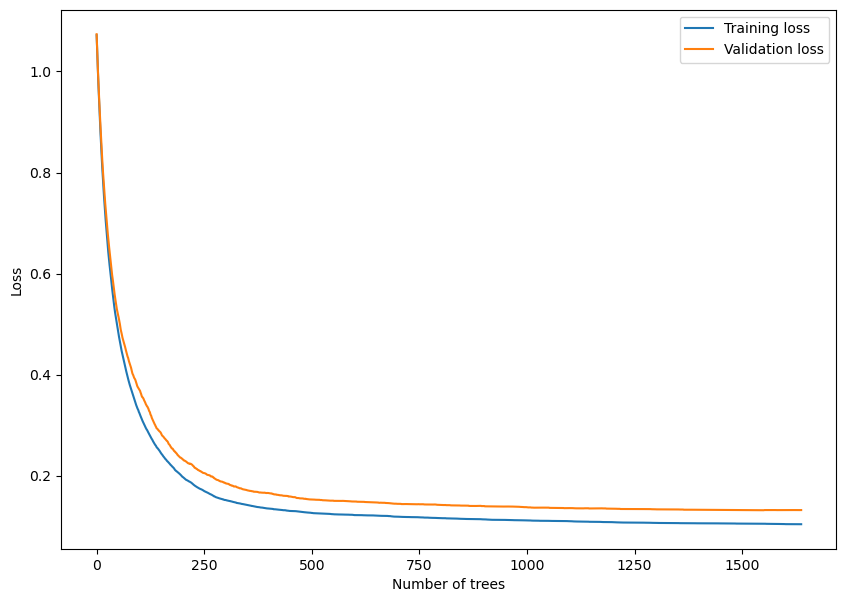

In [132]:
results = xgboost2.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
#plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [126]:
preds_2 = np.round(preds2).astype(int)
preds2 = pd.DataFrame(preds_2)
p2 = pd.Series(data = p2)
preds20 = pd.concat([preds2, p2], axis = 1)
preds20.columns = ['y_class', 'p2']
preds20.index = preds20['p2']
del preds20['p2']
preds20

,y_class
p2,
0,1
1,0
2,1
15,2
16,1
17,1
18,1
19,1
20,1


In [197]:
preds = pd.concat([preds10, preds20], axis = 0)
preds = preds.sort_index(ascending=True)
preds

,y_class
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [199]:
preds.describe()

,y_class
count,310.000000
mean,0.903226
std,0.414529
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [200]:
sub['Y_Class'] = preds
sub.to_csv('./t37_XGB_sep_2.csv', index = False)

In [87]:
sub

,PRODUCT_ID,Y_Class
0,TEST_000,1
1,TEST_001,1
2,TEST_002,1
3,TEST_003,1
4,TEST_004,0
5,TEST_005,1
6,TEST_006,1
7,TEST_007,1
8,TEST_008,1
9,TEST_009,1


In [100]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' :6,
          'eta': 0.03,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'min_child_weight' : 3,
          'subsample' :1,
          'gamma' : 2, #default 0 gamma 0.2, 0.8로 하고 earlystopping 하면 score가 늘어난다.
          'alpha' : 2
          }
num_rounds = 1000

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.07160	eval-mlogloss:1.08083
[1]	train-mlogloss:1.04728	eval-mlogloss:1.06572
[2]	train-mlogloss:1.02320	eval-mlogloss:1.04940
[3]	train-mlogloss:0.99997	eval-mlogloss:1.03464
[4]	train-mlogloss:0.97708	eval-mlogloss:1.01995
[5]	train-mlogloss:0.95573	eval-mlogloss:1.00659
[6]	train-mlogloss:0.93569	eval-mlogloss:0.99396
[7]	train-mlogloss:0.91612	eval-mlogloss:0.98141
[8]	train-mlogloss:0.89672	eval-mlogloss:0.96956
[9]	train-mlogloss:0.87952	eval-mlogloss:0.95943
[10]	train-mlogloss:0.86327	eval-mlogloss:0.94983
[11]	train-mlogloss:0.84562	eval-mlogloss:0.93954
[12]	train-mlogloss:0.83085	eval-mlogloss:0.93072
[13]	train-mlogloss:0.81661	eval-mlogloss:0.92228
[14]	train-mlogloss:0.80219	eval-mlogloss:0.91325
[15]	train-mlogloss:0.78834	eval-mlogloss:0.90492
[16]	train-mlogloss:0.77551	eval-mlogloss:0.89753
[17]	train-mlogloss:0.76188	eval-mlogloss:0.88982
[18]	train-mlogloss:0.74931	eval-mlogloss:0.88221
[19]	train-mlogloss:0.73803	eval-mlogloss:0.87610
[20]	train

[163]	train-mlogloss:0.35604	eval-mlogloss:0.63943
[164]	train-mlogloss:0.35604	eval-mlogloss:0.63943
[165]	train-mlogloss:0.35603	eval-mlogloss:0.63943
[166]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[167]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[168]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[169]	train-mlogloss:0.35603	eval-mlogloss:0.63944
[170]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[171]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[172]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[173]	train-mlogloss:0.35602	eval-mlogloss:0.63945
[174]	train-mlogloss:0.35602	eval-mlogloss:0.63946
[175]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[176]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[177]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[178]	train-mlogloss:0.35601	eval-mlogloss:0.63946
[179]	train-mlogloss:0.35601	eval-mlogloss:0.63947
[180]	train-mlogloss:0.35601	eval-mlogloss:0.63947
[181]	train-mlogloss:0.35600	eval-mlogloss:0.63947
[182]	train-mlogloss:0.35600	ev

In [101]:
print(f'best ntree limit은 {xgb_model.best_ntree_limit}')
y_pred = xgb_model.predict(dtest, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

best ntree limit은 118
0.75990675990676


In [102]:
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(y_preds).astype(int)
preds

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [103]:
y_preds = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds_1 = np.round(y_preds).astype(int)
preds1 = pd.DataFrame(preds_1)
p1 = pd.Series(data = p1)
preds10 = pd.concat([preds1, p1], axis = 1)
preds10.columns = ['y_class', 'p1']
preds10.index = preds10['p1']
del preds10['p1']
preds10

,y_class
p1,
3,1
4,1
5,2
6,1
7,0
8,1
9,2
10,1
11,1


# TO data

### Gridsearch

In [164]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(n_estimators=200)

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

# 후보 파라미터 선정
params = {'max_depth':[6], 'min_child_weight':[3], 'colsample_bytree':[1],'learning_rate' :[0.03, 0.04], 'reg_alpha' : [0.5,1, 1.5], 'min_split_loss':[0.5, 1, 1.5]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(train_x, train_y, early_stopping_rounds=20, eval_metric='mlogloss', eval_set=[(X_val, y_val)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

[0]	validation_0-mlogloss:1.06120
[1]	validation_0-mlogloss:1.02580
[2]	validation_0-mlogloss:0.99227
[3]	validation_0-mlogloss:0.96046
[4]	validation_0-mlogloss:0.93025
[5]	validation_0-mlogloss:0.90152
[6]	validation_0-mlogloss:0.87418
[7]	validation_0-mlogloss:0.84813
[8]	validation_0-mlogloss:0.82330
[9]	validation_0-mlogloss:0.79961
[10]	validation_0-mlogloss:0.77699
[11]	validation_0-mlogloss:0.75539
[12]	validation_0-mlogloss:0.73473
[13]	validation_0-mlogloss:0.71497
[14]	validation_0-mlogloss:0.69606
[15]	validation_0-mlogloss:0.67797
[16]	validation_0-mlogloss:0.66062
[17]	validation_0-mlogloss:0.64401
[18]	validation_0-mlogloss:0.62809
[19]	validation_0-mlogloss:0.61281
[20]	validation_0-mlogloss:0.59817
[21]	validation_0-mlogloss:0.58411
[22]	validation_0-mlogloss:0.57063
[23]	validation_0-mlogloss:0.55767
[24]	validation_0-mlogloss:0.54522
[25]	validation_0-mlogloss:0.53327
[26]	validation_0-mlogloss:0.52180
[27]	validation_0-mlogloss:0.51077
[28]	validation_0-mlogloss:0.5

[32]	validation_0-mlogloss:0.42294
[33]	validation_0-mlogloss:0.41269
[34]	validation_0-mlogloss:0.40277
[35]	validation_0-mlogloss:0.39318
[36]	validation_0-mlogloss:0.38350
[37]	validation_0-mlogloss:0.37433
[38]	validation_0-mlogloss:0.36595
[39]	validation_0-mlogloss:0.35735
[40]	validation_0-mlogloss:0.34939
[41]	validation_0-mlogloss:0.34102
[42]	validation_0-mlogloss:0.33282
[43]	validation_0-mlogloss:0.32567
[44]	validation_0-mlogloss:0.31818
[45]	validation_0-mlogloss:0.31091
[46]	validation_0-mlogloss:0.30463
[47]	validation_0-mlogloss:0.29802
[48]	validation_0-mlogloss:0.29173
[49]	validation_0-mlogloss:0.28571
[50]	validation_0-mlogloss:0.28002
[51]	validation_0-mlogloss:0.27424
[52]	validation_0-mlogloss:0.26869
[53]	validation_0-mlogloss:0.26349
[54]	validation_0-mlogloss:0.25841
[55]	validation_0-mlogloss:0.25373
[56]	validation_0-mlogloss:0.24935
[57]	validation_0-mlogloss:0.24450
[58]	validation_0-mlogloss:0.24005
[59]	validation_0-mlogloss:0.23616
[60]	validation_0-ml

[79]	validation_0-mlogloss:0.16539
[80]	validation_0-mlogloss:0.16270
[81]	validation_0-mlogloss:0.15980
[82]	validation_0-mlogloss:0.15752
[83]	validation_0-mlogloss:0.15479
[84]	validation_0-mlogloss:0.15272
[85]	validation_0-mlogloss:0.15039
[86]	validation_0-mlogloss:0.14837
[87]	validation_0-mlogloss:0.14657
[88]	validation_0-mlogloss:0.14452
[89]	validation_0-mlogloss:0.14281
[90]	validation_0-mlogloss:0.14083
[91]	validation_0-mlogloss:0.13899
[92]	validation_0-mlogloss:0.13721
[93]	validation_0-mlogloss:0.13568
[94]	validation_0-mlogloss:0.13410
[95]	validation_0-mlogloss:0.13259
[96]	validation_0-mlogloss:0.13100
[97]	validation_0-mlogloss:0.12976
[98]	validation_0-mlogloss:0.12866
[99]	validation_0-mlogloss:0.12719
[100]	validation_0-mlogloss:0.12609
[101]	validation_0-mlogloss:0.12475
[102]	validation_0-mlogloss:0.12357
[103]	validation_0-mlogloss:0.12201
[104]	validation_0-mlogloss:0.12058
[105]	validation_0-mlogloss:0.11962
[106]	validation_0-mlogloss:0.11835
[107]	validat

[111]	validation_0-mlogloss:0.20706
[112]	validation_0-mlogloss:0.20631
[113]	validation_0-mlogloss:0.20558
[114]	validation_0-mlogloss:0.20487
[115]	validation_0-mlogloss:0.20419
[116]	validation_0-mlogloss:0.20353
[117]	validation_0-mlogloss:0.20287
[118]	validation_0-mlogloss:0.20225
[119]	validation_0-mlogloss:0.20165
[120]	validation_0-mlogloss:0.20107
[121]	validation_0-mlogloss:0.20049
[122]	validation_0-mlogloss:0.19994
[123]	validation_0-mlogloss:0.19941
[124]	validation_0-mlogloss:0.19890
[125]	validation_0-mlogloss:0.19840
[126]	validation_0-mlogloss:0.19792
[127]	validation_0-mlogloss:0.19745
[128]	validation_0-mlogloss:0.19700
[129]	validation_0-mlogloss:0.19657
[130]	validation_0-mlogloss:0.19614
[131]	validation_0-mlogloss:0.19573
[132]	validation_0-mlogloss:0.19534
[133]	validation_0-mlogloss:0.19496
[134]	validation_0-mlogloss:0.19459
[135]	validation_0-mlogloss:0.19424
[136]	validation_0-mlogloss:0.19390
[137]	validation_0-mlogloss:0.19357
[138]	validation_0-mlogloss:

[142]	validation_0-mlogloss:0.12603
[143]	validation_0-mlogloss:0.12597
[144]	validation_0-mlogloss:0.12553
[145]	validation_0-mlogloss:0.12534
[146]	validation_0-mlogloss:0.12528
[147]	validation_0-mlogloss:0.12500
[148]	validation_0-mlogloss:0.12469
[149]	validation_0-mlogloss:0.12448
[150]	validation_0-mlogloss:0.12418
[151]	validation_0-mlogloss:0.12424
[152]	validation_0-mlogloss:0.12419
[153]	validation_0-mlogloss:0.12401
[154]	validation_0-mlogloss:0.12372
[155]	validation_0-mlogloss:0.12354
[156]	validation_0-mlogloss:0.12350
[157]	validation_0-mlogloss:0.12320
[158]	validation_0-mlogloss:0.12303
[159]	validation_0-mlogloss:0.12299
[160]	validation_0-mlogloss:0.12271
[161]	validation_0-mlogloss:0.12254
[162]	validation_0-mlogloss:0.12262
[163]	validation_0-mlogloss:0.12245
[164]	validation_0-mlogloss:0.12242
[165]	validation_0-mlogloss:0.12213
[166]	validation_0-mlogloss:0.12197
[167]	validation_0-mlogloss:0.12192
[168]	validation_0-mlogloss:0.12176
[169]	validation_0-mlogloss:

[173]	validation_0-mlogloss:0.10671
[174]	validation_0-mlogloss:0.10670
[175]	validation_0-mlogloss:0.10669
[176]	validation_0-mlogloss:0.10668
[177]	validation_0-mlogloss:0.10667
[178]	validation_0-mlogloss:0.10666
[179]	validation_0-mlogloss:0.10665
[180]	validation_0-mlogloss:0.10664
[181]	validation_0-mlogloss:0.10663
[182]	validation_0-mlogloss:0.10662
[183]	validation_0-mlogloss:0.10662
[184]	validation_0-mlogloss:0.10661
[185]	validation_0-mlogloss:0.10660
[186]	validation_0-mlogloss:0.10659
[187]	validation_0-mlogloss:0.10659
[188]	validation_0-mlogloss:0.10658
[189]	validation_0-mlogloss:0.10657
[190]	validation_0-mlogloss:0.10657
[191]	validation_0-mlogloss:0.10656
[192]	validation_0-mlogloss:0.10655
[193]	validation_0-mlogloss:0.10655
[194]	validation_0-mlogloss:0.10654
[195]	validation_0-mlogloss:0.10654
[196]	validation_0-mlogloss:0.10653
[197]	validation_0-mlogloss:0.10652
[198]	validation_0-mlogloss:0.10652
[199]	validation_0-mlogloss:0.10651
[0]	validation_0-mlogloss:1.

[4]	validation_0-mlogloss:0.93292
[5]	validation_0-mlogloss:0.90421
[6]	validation_0-mlogloss:0.87721
[7]	validation_0-mlogloss:0.85075
[8]	validation_0-mlogloss:0.82532
[9]	validation_0-mlogloss:0.80119
[10]	validation_0-mlogloss:0.77798
[11]	validation_0-mlogloss:0.75597
[12]	validation_0-mlogloss:0.73470
[13]	validation_0-mlogloss:0.71464
[14]	validation_0-mlogloss:0.69482
[15]	validation_0-mlogloss:0.67592
[16]	validation_0-mlogloss:0.65834
[17]	validation_0-mlogloss:0.64070
[18]	validation_0-mlogloss:0.62426
[19]	validation_0-mlogloss:0.60821
[20]	validation_0-mlogloss:0.59263
[21]	validation_0-mlogloss:0.57757
[22]	validation_0-mlogloss:0.56310
[23]	validation_0-mlogloss:0.54962
[24]	validation_0-mlogloss:0.53618
[25]	validation_0-mlogloss:0.52335
[26]	validation_0-mlogloss:0.51097
[27]	validation_0-mlogloss:0.49877
[28]	validation_0-mlogloss:0.48737
[29]	validation_0-mlogloss:0.47597
[30]	validation_0-mlogloss:0.46554
[31]	validation_0-mlogloss:0.45432
[32]	validation_0-mlogloss

[36]	validation_0-mlogloss:0.41714
[37]	validation_0-mlogloss:0.40897
[38]	validation_0-mlogloss:0.39970
[39]	validation_0-mlogloss:0.39038
[40]	validation_0-mlogloss:0.38289
[41]	validation_0-mlogloss:0.37445
[42]	validation_0-mlogloss:0.36738
[43]	validation_0-mlogloss:0.35925
[44]	validation_0-mlogloss:0.35117
[45]	validation_0-mlogloss:0.34454
[46]	validation_0-mlogloss:0.33721
[47]	validation_0-mlogloss:0.33114
[48]	validation_0-mlogloss:0.32406
[49]	validation_0-mlogloss:0.31712
[50]	validation_0-mlogloss:0.31149
[51]	validation_0-mlogloss:0.30508
[52]	validation_0-mlogloss:0.29984
[53]	validation_0-mlogloss:0.29463
[54]	validation_0-mlogloss:0.28971
[55]	validation_0-mlogloss:0.28422
[56]	validation_0-mlogloss:0.27911
[57]	validation_0-mlogloss:0.27413
[58]	validation_0-mlogloss:0.26912
[59]	validation_0-mlogloss:0.26448
[60]	validation_0-mlogloss:0.25981
[61]	validation_0-mlogloss:0.25536
[62]	validation_0-mlogloss:0.25086
[63]	validation_0-mlogloss:0.24659
[64]	validation_0-ml

[68]	validation_0-mlogloss:0.26677
[69]	validation_0-mlogloss:0.26412
[70]	validation_0-mlogloss:0.26153
[71]	validation_0-mlogloss:0.25905
[72]	validation_0-mlogloss:0.25664
[73]	validation_0-mlogloss:0.25428
[74]	validation_0-mlogloss:0.25202
[75]	validation_0-mlogloss:0.25038
[76]	validation_0-mlogloss:0.24825
[77]	validation_0-mlogloss:0.24619
[78]	validation_0-mlogloss:0.24417
[79]	validation_0-mlogloss:0.24223
[80]	validation_0-mlogloss:0.24035
[81]	validation_0-mlogloss:0.23851
[82]	validation_0-mlogloss:0.23675
[83]	validation_0-mlogloss:0.23504
[84]	validation_0-mlogloss:0.23336
[85]	validation_0-mlogloss:0.23176
[86]	validation_0-mlogloss:0.23018
[87]	validation_0-mlogloss:0.22867
[88]	validation_0-mlogloss:0.22721
[89]	validation_0-mlogloss:0.22578
[90]	validation_0-mlogloss:0.22441
[91]	validation_0-mlogloss:0.22363
[92]	validation_0-mlogloss:0.22232
[93]	validation_0-mlogloss:0.22108
[94]	validation_0-mlogloss:0.21987
[95]	validation_0-mlogloss:0.21868
[96]	validation_0-ml

[100]	validation_0-mlogloss:0.13992
[101]	validation_0-mlogloss:0.13905
[102]	validation_0-mlogloss:0.13801
[103]	validation_0-mlogloss:0.13719
[104]	validation_0-mlogloss:0.13620
[105]	validation_0-mlogloss:0.13595
[106]	validation_0-mlogloss:0.13510
[107]	validation_0-mlogloss:0.13446
[108]	validation_0-mlogloss:0.13397
[109]	validation_0-mlogloss:0.13331
[110]	validation_0-mlogloss:0.13252
[111]	validation_0-mlogloss:0.13218
[112]	validation_0-mlogloss:0.13156
[113]	validation_0-mlogloss:0.13125
[114]	validation_0-mlogloss:0.13065
[115]	validation_0-mlogloss:0.13007
[116]	validation_0-mlogloss:0.12980
[117]	validation_0-mlogloss:0.12931
[118]	validation_0-mlogloss:0.12927
[119]	validation_0-mlogloss:0.12880
[120]	validation_0-mlogloss:0.12834
[121]	validation_0-mlogloss:0.12832
[122]	validation_0-mlogloss:0.12787
[123]	validation_0-mlogloss:0.12743
[124]	validation_0-mlogloss:0.12743
[125]	validation_0-mlogloss:0.12700
[126]	validation_0-mlogloss:0.12701
[127]	validation_0-mlogloss:

[177]	validation_0-mlogloss:0.11359
[178]	validation_0-mlogloss:0.11358
[179]	validation_0-mlogloss:0.11357
[180]	validation_0-mlogloss:0.11356
[181]	validation_0-mlogloss:0.11355
[182]	validation_0-mlogloss:0.11355
[183]	validation_0-mlogloss:0.11354
[184]	validation_0-mlogloss:0.11353
[185]	validation_0-mlogloss:0.11352
[186]	validation_0-mlogloss:0.11352
[187]	validation_0-mlogloss:0.11351
[188]	validation_0-mlogloss:0.11350
[189]	validation_0-mlogloss:0.11350
[190]	validation_0-mlogloss:0.11349
[191]	validation_0-mlogloss:0.11349
[192]	validation_0-mlogloss:0.11348
[193]	validation_0-mlogloss:0.11347
[194]	validation_0-mlogloss:0.11347
[195]	validation_0-mlogloss:0.11346
[196]	validation_0-mlogloss:0.11346
[197]	validation_0-mlogloss:0.11345
[198]	validation_0-mlogloss:0.11345
[199]	validation_0-mlogloss:0.11344
[0]	validation_0-mlogloss:1.06159
[1]	validation_0-mlogloss:1.02654
[2]	validation_0-mlogloss:0.99332
[3]	validation_0-mlogloss:0.96180
[4]	validation_0-mlogloss:0.93184
[5

[9]	validation_0-mlogloss:0.79692
[10]	validation_0-mlogloss:0.77342
[11]	validation_0-mlogloss:0.75138
[12]	validation_0-mlogloss:0.73017
[13]	validation_0-mlogloss:0.70903
[14]	validation_0-mlogloss:0.68923
[15]	validation_0-mlogloss:0.66987
[16]	validation_0-mlogloss:0.65123
[17]	validation_0-mlogloss:0.63401
[18]	validation_0-mlogloss:0.61745
[19]	validation_0-mlogloss:0.60081
[20]	validation_0-mlogloss:0.58583
[21]	validation_0-mlogloss:0.57070
[22]	validation_0-mlogloss:0.55645
[23]	validation_0-mlogloss:0.54220
[24]	validation_0-mlogloss:0.52878
[25]	validation_0-mlogloss:0.51547
[26]	validation_0-mlogloss:0.50308
[27]	validation_0-mlogloss:0.49164
[28]	validation_0-mlogloss:0.47971
[29]	validation_0-mlogloss:0.46846
[30]	validation_0-mlogloss:0.45724
[31]	validation_0-mlogloss:0.44640
[32]	validation_0-mlogloss:0.43667
[33]	validation_0-mlogloss:0.42646
[34]	validation_0-mlogloss:0.41623
[35]	validation_0-mlogloss:0.40623
[36]	validation_0-mlogloss:0.39699
[37]	validation_0-mlo

[80]	validation_0-mlogloss:0.19061
[81]	validation_0-mlogloss:0.18888
[82]	validation_0-mlogloss:0.18653
[83]	validation_0-mlogloss:0.18492
[84]	validation_0-mlogloss:0.18298
[85]	validation_0-mlogloss:0.18112
[86]	validation_0-mlogloss:0.17966
[87]	validation_0-mlogloss:0.17785
[88]	validation_0-mlogloss:0.17610
[89]	validation_0-mlogloss:0.17409
[90]	validation_0-mlogloss:0.17247
[91]	validation_0-mlogloss:0.17089
[92]	validation_0-mlogloss:0.16901
[93]	validation_0-mlogloss:0.16749
[94]	validation_0-mlogloss:0.16601
[95]	validation_0-mlogloss:0.16467
[96]	validation_0-mlogloss:0.16324
[97]	validation_0-mlogloss:0.16206
[98]	validation_0-mlogloss:0.16063
[99]	validation_0-mlogloss:0.15953
[100]	validation_0-mlogloss:0.15846
[101]	validation_0-mlogloss:0.15740
[102]	validation_0-mlogloss:0.15636
[103]	validation_0-mlogloss:0.15531
[104]	validation_0-mlogloss:0.15431
[105]	validation_0-mlogloss:0.15335
[106]	validation_0-mlogloss:0.15238
[107]	validation_0-mlogloss:0.15161
[108]	valida

[112]	validation_0-mlogloss:0.21536
[113]	validation_0-mlogloss:0.21481
[114]	validation_0-mlogloss:0.21426
[115]	validation_0-mlogloss:0.21373
[116]	validation_0-mlogloss:0.21302
[117]	validation_0-mlogloss:0.21272
[118]	validation_0-mlogloss:0.21242
[119]	validation_0-mlogloss:0.21213
[120]	validation_0-mlogloss:0.21165
[121]	validation_0-mlogloss:0.21137
[122]	validation_0-mlogloss:0.21110
[123]	validation_0-mlogloss:0.21083
[124]	validation_0-mlogloss:0.21039
[125]	validation_0-mlogloss:0.21014
[126]	validation_0-mlogloss:0.20989
[127]	validation_0-mlogloss:0.20947
[128]	validation_0-mlogloss:0.20923
[129]	validation_0-mlogloss:0.20900
[130]	validation_0-mlogloss:0.20887
[131]	validation_0-mlogloss:0.20865
[132]	validation_0-mlogloss:0.20852
[133]	validation_0-mlogloss:0.20831
[134]	validation_0-mlogloss:0.20819
[135]	validation_0-mlogloss:0.20808
[136]	validation_0-mlogloss:0.20787
[137]	validation_0-mlogloss:0.20777
[138]	validation_0-mlogloss:0.20767
[139]	validation_0-mlogloss:

[143]	validation_0-mlogloss:0.16967
[144]	validation_0-mlogloss:0.16967
[145]	validation_0-mlogloss:0.16967
[146]	validation_0-mlogloss:0.16967
[147]	validation_0-mlogloss:0.16967
[148]	validation_0-mlogloss:0.16967
[149]	validation_0-mlogloss:0.16968
[150]	validation_0-mlogloss:0.16968
[151]	validation_0-mlogloss:0.16968
[152]	validation_0-mlogloss:0.16968
[153]	validation_0-mlogloss:0.16969
[154]	validation_0-mlogloss:0.16969
[155]	validation_0-mlogloss:0.16969
[156]	validation_0-mlogloss:0.16969
[157]	validation_0-mlogloss:0.16970
[158]	validation_0-mlogloss:0.16970
[159]	validation_0-mlogloss:0.16970
[160]	validation_0-mlogloss:0.16971
[161]	validation_0-mlogloss:0.16971
[0]	validation_0-mlogloss:1.06338
[1]	validation_0-mlogloss:1.02986
[2]	validation_0-mlogloss:0.99794
[3]	validation_0-mlogloss:0.96758
[4]	validation_0-mlogloss:0.93874
[5]	validation_0-mlogloss:0.91117
[6]	validation_0-mlogloss:0.88499
[7]	validation_0-mlogloss:0.85997
[8]	validation_0-mlogloss:0.83604
[9]	valida

[13]	validation_0-mlogloss:0.71530
[14]	validation_0-mlogloss:0.69643
[15]	validation_0-mlogloss:0.67836
[16]	validation_0-mlogloss:0.66106
[17]	validation_0-mlogloss:0.64448
[18]	validation_0-mlogloss:0.62860
[19]	validation_0-mlogloss:0.61337
[20]	validation_0-mlogloss:0.59876
[21]	validation_0-mlogloss:0.58475
[22]	validation_0-mlogloss:0.57130
[23]	validation_0-mlogloss:0.55839
[24]	validation_0-mlogloss:0.54600
[25]	validation_0-mlogloss:0.53410
[26]	validation_0-mlogloss:0.52267
[27]	validation_0-mlogloss:0.51195
[28]	validation_0-mlogloss:0.50165
[29]	validation_0-mlogloss:0.49176
[30]	validation_0-mlogloss:0.48154
[31]	validation_0-mlogloss:0.47238
[32]	validation_0-mlogloss:0.46225
[33]	validation_0-mlogloss:0.45248
[34]	validation_0-mlogloss:0.44374
[35]	validation_0-mlogloss:0.43465
[36]	validation_0-mlogloss:0.42588
[37]	validation_0-mlogloss:0.41741
[38]	validation_0-mlogloss:0.40991
[39]	validation_0-mlogloss:0.40202
[40]	validation_0-mlogloss:0.39486
[41]	validation_0-ml

[45]	validation_0-mlogloss:0.31904
[46]	validation_0-mlogloss:0.31269
[47]	validation_0-mlogloss:0.30691
[48]	validation_0-mlogloss:0.30133
[49]	validation_0-mlogloss:0.29592
[50]	validation_0-mlogloss:0.29068
[51]	validation_0-mlogloss:0.28562
[52]	validation_0-mlogloss:0.28071
[53]	validation_0-mlogloss:0.27555
[54]	validation_0-mlogloss:0.27095
[55]	validation_0-mlogloss:0.26649
[56]	validation_0-mlogloss:0.26218
[57]	validation_0-mlogloss:0.25800
[58]	validation_0-mlogloss:0.25394
[59]	validation_0-mlogloss:0.25002
[60]	validation_0-mlogloss:0.24581
[61]	validation_0-mlogloss:0.24212
[62]	validation_0-mlogloss:0.23855
[63]	validation_0-mlogloss:0.23509
[64]	validation_0-mlogloss:0.23137
[65]	validation_0-mlogloss:0.22777
[66]	validation_0-mlogloss:0.22428
[67]	validation_0-mlogloss:0.22088
[68]	validation_0-mlogloss:0.21718
[69]	validation_0-mlogloss:0.21357
[70]	validation_0-mlogloss:0.21046
[71]	validation_0-mlogloss:0.20723
[72]	validation_0-mlogloss:0.20392
[73]	validation_0-ml

[104]	validation_0-mlogloss:0.14964
[105]	validation_0-mlogloss:0.14858
[106]	validation_0-mlogloss:0.14763
[107]	validation_0-mlogloss:0.14684
[108]	validation_0-mlogloss:0.14596
[109]	validation_0-mlogloss:0.14496
[110]	validation_0-mlogloss:0.14457
[111]	validation_0-mlogloss:0.14428
[112]	validation_0-mlogloss:0.14332
[113]	validation_0-mlogloss:0.14306
[114]	validation_0-mlogloss:0.14271
[115]	validation_0-mlogloss:0.14247
[116]	validation_0-mlogloss:0.14155
[117]	validation_0-mlogloss:0.14134
[118]	validation_0-mlogloss:0.14103
[119]	validation_0-mlogloss:0.14084
[120]	validation_0-mlogloss:0.14067
[121]	validation_0-mlogloss:0.13990
[122]	validation_0-mlogloss:0.13974
[123]	validation_0-mlogloss:0.13959
[124]	validation_0-mlogloss:0.13944
[125]	validation_0-mlogloss:0.13930
[126]	validation_0-mlogloss:0.13916
[127]	validation_0-mlogloss:0.13903
[128]	validation_0-mlogloss:0.13891
[129]	validation_0-mlogloss:0.13879
[130]	validation_0-mlogloss:0.13767
[131]	validation_0-mlogloss:

[135]	validation_0-mlogloss:0.20841
[136]	validation_0-mlogloss:0.20820
[137]	validation_0-mlogloss:0.20798
[138]	validation_0-mlogloss:0.20785
[139]	validation_0-mlogloss:0.20765
[140]	validation_0-mlogloss:0.20745
[141]	validation_0-mlogloss:0.20726
[142]	validation_0-mlogloss:0.20715
[143]	validation_0-mlogloss:0.20697
[144]	validation_0-mlogloss:0.20680
[145]	validation_0-mlogloss:0.20670
[146]	validation_0-mlogloss:0.20653
[147]	validation_0-mlogloss:0.20637
[148]	validation_0-mlogloss:0.20622
[149]	validation_0-mlogloss:0.20613
[150]	validation_0-mlogloss:0.20599
[151]	validation_0-mlogloss:0.20584
[152]	validation_0-mlogloss:0.20570
[153]	validation_0-mlogloss:0.20563
[154]	validation_0-mlogloss:0.20549
[155]	validation_0-mlogloss:0.20536
[156]	validation_0-mlogloss:0.20523
[157]	validation_0-mlogloss:0.20517
[158]	validation_0-mlogloss:0.20504
[159]	validation_0-mlogloss:0.20493
[160]	validation_0-mlogloss:0.20481
[161]	validation_0-mlogloss:0.20475
[162]	validation_0-mlogloss:

[166]	validation_0-mlogloss:0.17635
[0]	validation_0-mlogloss:1.06288
[1]	validation_0-mlogloss:1.02887
[2]	validation_0-mlogloss:0.99669
[3]	validation_0-mlogloss:0.96610
[4]	validation_0-mlogloss:0.93664
[5]	validation_0-mlogloss:0.90887
[6]	validation_0-mlogloss:0.88224
[7]	validation_0-mlogloss:0.85692
[8]	validation_0-mlogloss:0.83271
[9]	validation_0-mlogloss:0.80955
[10]	validation_0-mlogloss:0.78725
[11]	validation_0-mlogloss:0.76547
[12]	validation_0-mlogloss:0.74494
[13]	validation_0-mlogloss:0.72487
[14]	validation_0-mlogloss:0.70593
[15]	validation_0-mlogloss:0.68739
[16]	validation_0-mlogloss:0.66967
[17]	validation_0-mlogloss:0.65270
[18]	validation_0-mlogloss:0.63626
[19]	validation_0-mlogloss:0.62054
[20]	validation_0-mlogloss:0.60519
[21]	validation_0-mlogloss:0.59047
[22]	validation_0-mlogloss:0.57594
[23]	validation_0-mlogloss:0.56065
[24]	validation_0-mlogloss:0.54571
[25]	validation_0-mlogloss:0.53310
[26]	validation_0-mlogloss:0.51890
[27]	validation_0-mlogloss:0.

[31]	validation_0-mlogloss:0.47733
[32]	validation_0-mlogloss:0.46826
[33]	validation_0-mlogloss:0.45952
[34]	validation_0-mlogloss:0.45108
[35]	validation_0-mlogloss:0.44295
[36]	validation_0-mlogloss:0.43510
[37]	validation_0-mlogloss:0.42753
[38]	validation_0-mlogloss:0.42023
[39]	validation_0-mlogloss:0.41318
[40]	validation_0-mlogloss:0.40638
[41]	validation_0-mlogloss:0.39981
[42]	validation_0-mlogloss:0.39347
[43]	validation_0-mlogloss:0.38734
[44]	validation_0-mlogloss:0.38143
[45]	validation_0-mlogloss:0.37572
[46]	validation_0-mlogloss:0.37020
[47]	validation_0-mlogloss:0.36487
[48]	validation_0-mlogloss:0.35972
[49]	validation_0-mlogloss:0.35475
[50]	validation_0-mlogloss:0.34994
[51]	validation_0-mlogloss:0.34530
[52]	validation_0-mlogloss:0.34081
[53]	validation_0-mlogloss:0.33647
[54]	validation_0-mlogloss:0.33236
[55]	validation_0-mlogloss:0.32804
[56]	validation_0-mlogloss:0.32420
[57]	validation_0-mlogloss:0.32014
[58]	validation_0-mlogloss:0.31655
[59]	validation_0-ml

[63]	validation_0-mlogloss:0.27305
[64]	validation_0-mlogloss:0.27005
[65]	validation_0-mlogloss:0.26714
[66]	validation_0-mlogloss:0.26431
[67]	validation_0-mlogloss:0.26188
[68]	validation_0-mlogloss:0.25920
[69]	validation_0-mlogloss:0.25660
[70]	validation_0-mlogloss:0.25407
[71]	validation_0-mlogloss:0.25161
[72]	validation_0-mlogloss:0.24967
[73]	validation_0-mlogloss:0.24675
[74]	validation_0-mlogloss:0.24397
[75]	validation_0-mlogloss:0.24126
[76]	validation_0-mlogloss:0.23906
[77]	validation_0-mlogloss:0.23650
[78]	validation_0-mlogloss:0.23402
[79]	validation_0-mlogloss:0.23201
[80]	validation_0-mlogloss:0.22944
[81]	validation_0-mlogloss:0.22716
[82]	validation_0-mlogloss:0.22520
[83]	validation_0-mlogloss:0.22330
[84]	validation_0-mlogloss:0.22196
[85]	validation_0-mlogloss:0.22039
[86]	validation_0-mlogloss:0.21887
[87]	validation_0-mlogloss:0.21778
[88]	validation_0-mlogloss:0.21672
[89]	validation_0-mlogloss:0.21568
[90]	validation_0-mlogloss:0.21467
[91]	validation_0-ml

[101]	validation_0-mlogloss:0.19052
[102]	validation_0-mlogloss:0.18952
[103]	validation_0-mlogloss:0.18843
[104]	validation_0-mlogloss:0.18668
[105]	validation_0-mlogloss:0.18580
[106]	validation_0-mlogloss:0.18440
[107]	validation_0-mlogloss:0.18303
[108]	validation_0-mlogloss:0.18284
[109]	validation_0-mlogloss:0.18265
[110]	validation_0-mlogloss:0.18247
[111]	validation_0-mlogloss:0.18230
[112]	validation_0-mlogloss:0.18214
[113]	validation_0-mlogloss:0.18198
[114]	validation_0-mlogloss:0.18182
[115]	validation_0-mlogloss:0.18168
[116]	validation_0-mlogloss:0.18154
[117]	validation_0-mlogloss:0.18140
[118]	validation_0-mlogloss:0.18127
[119]	validation_0-mlogloss:0.18114
[120]	validation_0-mlogloss:0.18102
[121]	validation_0-mlogloss:0.18091
[122]	validation_0-mlogloss:0.18079
[123]	validation_0-mlogloss:0.18069
[124]	validation_0-mlogloss:0.18058
[125]	validation_0-mlogloss:0.18048
[126]	validation_0-mlogloss:0.18039
[127]	validation_0-mlogloss:0.18030
[128]	validation_0-mlogloss:

[132]	validation_0-mlogloss:0.18796
[133]	validation_0-mlogloss:0.18770
[134]	validation_0-mlogloss:0.18763
[135]	validation_0-mlogloss:0.18756
[136]	validation_0-mlogloss:0.18750
[137]	validation_0-mlogloss:0.18744
[138]	validation_0-mlogloss:0.18738
[139]	validation_0-mlogloss:0.18713
[140]	validation_0-mlogloss:0.18741
[141]	validation_0-mlogloss:0.18736
[142]	validation_0-mlogloss:0.18731
[143]	validation_0-mlogloss:0.18726
[144]	validation_0-mlogloss:0.18721
[145]	validation_0-mlogloss:0.18717
[146]	validation_0-mlogloss:0.18693
[147]	validation_0-mlogloss:0.18724
[148]	validation_0-mlogloss:0.18720
[149]	validation_0-mlogloss:0.18716
[150]	validation_0-mlogloss:0.18713
[151]	validation_0-mlogloss:0.18709
[152]	validation_0-mlogloss:0.18706
[153]	validation_0-mlogloss:0.18703
[154]	validation_0-mlogloss:0.18680
[155]	validation_0-mlogloss:0.18678
[156]	validation_0-mlogloss:0.18675
[157]	validation_0-mlogloss:0.18673
[158]	validation_0-mlogloss:0.18670
[159]	validation_0-mlogloss:

[22]	validation_0-mlogloss:0.47457
[23]	validation_0-mlogloss:0.45799
[24]	validation_0-mlogloss:0.44465
[25]	validation_0-mlogloss:0.42884
[26]	validation_0-mlogloss:0.41430
[27]	validation_0-mlogloss:0.40065
[28]	validation_0-mlogloss:0.38719
[29]	validation_0-mlogloss:0.37409
[30]	validation_0-mlogloss:0.36341
[31]	validation_0-mlogloss:0.35099
[32]	validation_0-mlogloss:0.34001
[33]	validation_0-mlogloss:0.32880
[34]	validation_0-mlogloss:0.31973
[35]	validation_0-mlogloss:0.30936
[36]	validation_0-mlogloss:0.29974
[37]	validation_0-mlogloss:0.29027
[38]	validation_0-mlogloss:0.28252
[39]	validation_0-mlogloss:0.27353
[40]	validation_0-mlogloss:0.26681
[41]	validation_0-mlogloss:0.26000
[42]	validation_0-mlogloss:0.25349
[43]	validation_0-mlogloss:0.24738
[44]	validation_0-mlogloss:0.24140
[45]	validation_0-mlogloss:0.23550
[46]	validation_0-mlogloss:0.23014
[47]	validation_0-mlogloss:0.22467
[48]	validation_0-mlogloss:0.21874
[49]	validation_0-mlogloss:0.21270
[50]	validation_0-ml

[75]	validation_0-mlogloss:0.21620
[76]	validation_0-mlogloss:0.21483
[77]	validation_0-mlogloss:0.21352
[78]	validation_0-mlogloss:0.21224
[79]	validation_0-mlogloss:0.21103
[80]	validation_0-mlogloss:0.20986
[81]	validation_0-mlogloss:0.20874
[82]	validation_0-mlogloss:0.20813
[83]	validation_0-mlogloss:0.20710
[84]	validation_0-mlogloss:0.20610
[85]	validation_0-mlogloss:0.20515
[86]	validation_0-mlogloss:0.20422
[87]	validation_0-mlogloss:0.20335
[88]	validation_0-mlogloss:0.20251
[89]	validation_0-mlogloss:0.20169
[90]	validation_0-mlogloss:0.20092
[91]	validation_0-mlogloss:0.20018
[92]	validation_0-mlogloss:0.19947
[93]	validation_0-mlogloss:0.19879
[94]	validation_0-mlogloss:0.19813
[95]	validation_0-mlogloss:0.19751
[96]	validation_0-mlogloss:0.19691
[97]	validation_0-mlogloss:0.19635
[98]	validation_0-mlogloss:0.19579
[99]	validation_0-mlogloss:0.19527
[100]	validation_0-mlogloss:0.19478
[101]	validation_0-mlogloss:0.19431
[102]	validation_0-mlogloss:0.19386
[103]	validation_

[107]	validation_0-mlogloss:0.12565
[108]	validation_0-mlogloss:0.12523
[109]	validation_0-mlogloss:0.12498
[110]	validation_0-mlogloss:0.12490
[111]	validation_0-mlogloss:0.12449
[112]	validation_0-mlogloss:0.12425
[113]	validation_0-mlogloss:0.12434
[114]	validation_0-mlogloss:0.12394
[115]	validation_0-mlogloss:0.12370
[116]	validation_0-mlogloss:0.12364
[117]	validation_0-mlogloss:0.12341
[118]	validation_0-mlogloss:0.12302
[119]	validation_0-mlogloss:0.12279
[120]	validation_0-mlogloss:0.12274
[121]	validation_0-mlogloss:0.12236
[122]	validation_0-mlogloss:0.12214
[123]	validation_0-mlogloss:0.12215
[124]	validation_0-mlogloss:0.12210
[125]	validation_0-mlogloss:0.12173
[126]	validation_0-mlogloss:0.12151
[127]	validation_0-mlogloss:0.12146
[128]	validation_0-mlogloss:0.12129
[129]	validation_0-mlogloss:0.12125
[130]	validation_0-mlogloss:0.12108
[131]	validation_0-mlogloss:0.12071
[132]	validation_0-mlogloss:0.12056
[133]	validation_0-mlogloss:0.12048
[134]	validation_0-mlogloss:

[172]	validation_0-mlogloss:0.10631
[173]	validation_0-mlogloss:0.10631
[174]	validation_0-mlogloss:0.10631
[175]	validation_0-mlogloss:0.10630
[176]	validation_0-mlogloss:0.10630
[177]	validation_0-mlogloss:0.10630
[178]	validation_0-mlogloss:0.10629
[179]	validation_0-mlogloss:0.10629
[180]	validation_0-mlogloss:0.10629
[181]	validation_0-mlogloss:0.10629
[182]	validation_0-mlogloss:0.10628
[183]	validation_0-mlogloss:0.10628
[184]	validation_0-mlogloss:0.10628
[185]	validation_0-mlogloss:0.10627
[186]	validation_0-mlogloss:0.10627
[187]	validation_0-mlogloss:0.10627
[188]	validation_0-mlogloss:0.10627
[189]	validation_0-mlogloss:0.10626
[190]	validation_0-mlogloss:0.10626
[191]	validation_0-mlogloss:0.10626
[192]	validation_0-mlogloss:0.10626
[193]	validation_0-mlogloss:0.10625
[194]	validation_0-mlogloss:0.10625
[195]	validation_0-mlogloss:0.10625
[196]	validation_0-mlogloss:0.10625
[197]	validation_0-mlogloss:0.10625
[198]	validation_0-mlogloss:0.10624
[199]	validation_0-mlogloss:

[3]	validation_0-mlogloss:0.92270
[4]	validation_0-mlogloss:0.88519
[5]	validation_0-mlogloss:0.84973
[6]	validation_0-mlogloss:0.81684
[7]	validation_0-mlogloss:0.78485
[8]	validation_0-mlogloss:0.75492
[9]	validation_0-mlogloss:0.72662
[10]	validation_0-mlogloss:0.69993
[11]	validation_0-mlogloss:0.67491
[12]	validation_0-mlogloss:0.65082
[13]	validation_0-mlogloss:0.62781
[14]	validation_0-mlogloss:0.60674
[15]	validation_0-mlogloss:0.58681
[16]	validation_0-mlogloss:0.56716
[17]	validation_0-mlogloss:0.54838
[18]	validation_0-mlogloss:0.53057
[19]	validation_0-mlogloss:0.51332
[20]	validation_0-mlogloss:0.49750
[21]	validation_0-mlogloss:0.48250
[22]	validation_0-mlogloss:0.46792
[23]	validation_0-mlogloss:0.45366
[24]	validation_0-mlogloss:0.43929
[25]	validation_0-mlogloss:0.42591
[26]	validation_0-mlogloss:0.41299
[27]	validation_0-mlogloss:0.40113
[28]	validation_0-mlogloss:0.38959
[29]	validation_0-mlogloss:0.37819
[30]	validation_0-mlogloss:0.36754
[31]	validation_0-mlogloss:

[68]	validation_0-mlogloss:0.17302
[69]	validation_0-mlogloss:0.17074
[70]	validation_0-mlogloss:0.16882
[71]	validation_0-mlogloss:0.16706
[72]	validation_0-mlogloss:0.16482
[73]	validation_0-mlogloss:0.16304
[74]	validation_0-mlogloss:0.16093
[75]	validation_0-mlogloss:0.15902
[76]	validation_0-mlogloss:0.15763
[77]	validation_0-mlogloss:0.15596
[78]	validation_0-mlogloss:0.15443
[79]	validation_0-mlogloss:0.15311
[80]	validation_0-mlogloss:0.15186
[81]	validation_0-mlogloss:0.15067
[82]	validation_0-mlogloss:0.14944
[83]	validation_0-mlogloss:0.14824
[84]	validation_0-mlogloss:0.14713
[85]	validation_0-mlogloss:0.14602
[86]	validation_0-mlogloss:0.14494
[87]	validation_0-mlogloss:0.14386
[88]	validation_0-mlogloss:0.14283
[89]	validation_0-mlogloss:0.14182
[90]	validation_0-mlogloss:0.14087
[91]	validation_0-mlogloss:0.13986
[92]	validation_0-mlogloss:0.13891
[93]	validation_0-mlogloss:0.13803
[94]	validation_0-mlogloss:0.13708
[95]	validation_0-mlogloss:0.13643
[96]	validation_0-ml

[100]	validation_0-mlogloss:0.19396
[101]	validation_0-mlogloss:0.19404
[102]	validation_0-mlogloss:0.19373
[103]	validation_0-mlogloss:0.19342
[104]	validation_0-mlogloss:0.19313
[105]	validation_0-mlogloss:0.19325
[106]	validation_0-mlogloss:0.19297
[107]	validation_0-mlogloss:0.19271
[108]	validation_0-mlogloss:0.19245
[109]	validation_0-mlogloss:0.19259
[110]	validation_0-mlogloss:0.19235
[111]	validation_0-mlogloss:0.19213
[112]	validation_0-mlogloss:0.19190
[113]	validation_0-mlogloss:0.19169
[114]	validation_0-mlogloss:0.19186
[115]	validation_0-mlogloss:0.19166
[116]	validation_0-mlogloss:0.19146
[117]	validation_0-mlogloss:0.19107
[118]	validation_0-mlogloss:0.19088
[119]	validation_0-mlogloss:0.19107
[120]	validation_0-mlogloss:0.19090
[121]	validation_0-mlogloss:0.19074
[122]	validation_0-mlogloss:0.19058
[123]	validation_0-mlogloss:0.19042
[124]	validation_0-mlogloss:0.19027
[125]	validation_0-mlogloss:0.19012
[126]	validation_0-mlogloss:0.19033
[127]	validation_0-mlogloss:

[12]	validation_0-mlogloss:0.66130
[13]	validation_0-mlogloss:0.63791
[14]	validation_0-mlogloss:0.61683
[15]	validation_0-mlogloss:0.59584
[16]	validation_0-mlogloss:0.57638
[17]	validation_0-mlogloss:0.55781
[18]	validation_0-mlogloss:0.53913
[19]	validation_0-mlogloss:0.52213
[20]	validation_0-mlogloss:0.50623
[21]	validation_0-mlogloss:0.49021
[22]	validation_0-mlogloss:0.47524
[23]	validation_0-mlogloss:0.45931
[24]	validation_0-mlogloss:0.44365
[25]	validation_0-mlogloss:0.43017
[26]	validation_0-mlogloss:0.41593
[27]	validation_0-mlogloss:0.40200
[28]	validation_0-mlogloss:0.38909
[29]	validation_0-mlogloss:0.37591
[30]	validation_0-mlogloss:0.36533
[31]	validation_0-mlogloss:0.35357
[32]	validation_0-mlogloss:0.34232
[33]	validation_0-mlogloss:0.33172
[34]	validation_0-mlogloss:0.32249
[35]	validation_0-mlogloss:0.31220
[36]	validation_0-mlogloss:0.30272
[37]	validation_0-mlogloss:0.29457
[38]	validation_0-mlogloss:0.28720
[39]	validation_0-mlogloss:0.27984
[40]	validation_0-ml

[75]	validation_0-mlogloss:0.16650
[76]	validation_0-mlogloss:0.16526
[77]	validation_0-mlogloss:0.16399
[78]	validation_0-mlogloss:0.16359
[79]	validation_0-mlogloss:0.16238
[80]	validation_0-mlogloss:0.16143
[81]	validation_0-mlogloss:0.16076
[82]	validation_0-mlogloss:0.15993
[83]	validation_0-mlogloss:0.15944
[84]	validation_0-mlogloss:0.15857
[85]	validation_0-mlogloss:0.15753
[86]	validation_0-mlogloss:0.15743
[87]	validation_0-mlogloss:0.15674
[88]	validation_0-mlogloss:0.15667
[89]	validation_0-mlogloss:0.15608
[90]	validation_0-mlogloss:0.15542
[91]	validation_0-mlogloss:0.15539
[92]	validation_0-mlogloss:0.15476
[93]	validation_0-mlogloss:0.15457
[94]	validation_0-mlogloss:0.15404
[95]	validation_0-mlogloss:0.15376
[96]	validation_0-mlogloss:0.15266
[97]	validation_0-mlogloss:0.15265
[98]	validation_0-mlogloss:0.15265
[99]	validation_0-mlogloss:0.15264
[100]	validation_0-mlogloss:0.15264
[101]	validation_0-mlogloss:0.15250
[102]	validation_0-mlogloss:0.15227
[103]	validation_

[183]	validation_0-mlogloss:0.13839
[184]	validation_0-mlogloss:0.13838
[185]	validation_0-mlogloss:0.13838
[186]	validation_0-mlogloss:0.13837
[187]	validation_0-mlogloss:0.13837
[188]	validation_0-mlogloss:0.13836
[189]	validation_0-mlogloss:0.13835
[190]	validation_0-mlogloss:0.13835
[191]	validation_0-mlogloss:0.13834
[192]	validation_0-mlogloss:0.13834
[193]	validation_0-mlogloss:0.13833
[194]	validation_0-mlogloss:0.13833
[195]	validation_0-mlogloss:0.13832
[196]	validation_0-mlogloss:0.13832
[197]	validation_0-mlogloss:0.13831
[198]	validation_0-mlogloss:0.13831
[199]	validation_0-mlogloss:0.13831
[0]	validation_0-mlogloss:1.04993
[1]	validation_0-mlogloss:1.00467
[2]	validation_0-mlogloss:0.96248
[3]	validation_0-mlogloss:0.92306
[4]	validation_0-mlogloss:0.88616
[5]	validation_0-mlogloss:0.85156
[6]	validation_0-mlogloss:0.81906
[7]	validation_0-mlogloss:0.78850
[8]	validation_0-mlogloss:0.75971
[9]	validation_0-mlogloss:0.73258
[10]	validation_0-mlogloss:0.70696
[11]	validati

[15]	validation_0-mlogloss:0.58794
[16]	validation_0-mlogloss:0.56852
[17]	validation_0-mlogloss:0.54972
[18]	validation_0-mlogloss:0.53241
[19]	validation_0-mlogloss:0.51580
[20]	validation_0-mlogloss:0.50042
[21]	validation_0-mlogloss:0.48536
[22]	validation_0-mlogloss:0.47144
[23]	validation_0-mlogloss:0.45680
[24]	validation_0-mlogloss:0.44346
[25]	validation_0-mlogloss:0.43026
[26]	validation_0-mlogloss:0.41820
[27]	validation_0-mlogloss:0.40652
[28]	validation_0-mlogloss:0.39482
[29]	validation_0-mlogloss:0.38435
[30]	validation_0-mlogloss:0.37425
[31]	validation_0-mlogloss:0.36455
[32]	validation_0-mlogloss:0.35477
[33]	validation_0-mlogloss:0.34658
[34]	validation_0-mlogloss:0.33874
[35]	validation_0-mlogloss:0.33124
[36]	validation_0-mlogloss:0.32351
[37]	validation_0-mlogloss:0.31663
[38]	validation_0-mlogloss:0.31005
[39]	validation_0-mlogloss:0.30375
[40]	validation_0-mlogloss:0.29771
[41]	validation_0-mlogloss:0.29192
[42]	validation_0-mlogloss:0.28575
[43]	validation_0-ml

[119]	validation_0-mlogloss:0.15764
[120]	validation_0-mlogloss:0.15760
[121]	validation_0-mlogloss:0.15757
[122]	validation_0-mlogloss:0.15753
[123]	validation_0-mlogloss:0.15750
[124]	validation_0-mlogloss:0.15747
[125]	validation_0-mlogloss:0.15744
[126]	validation_0-mlogloss:0.15741
[127]	validation_0-mlogloss:0.15738
[128]	validation_0-mlogloss:0.15735
[129]	validation_0-mlogloss:0.15732
[130]	validation_0-mlogloss:0.15730
[131]	validation_0-mlogloss:0.15727
[132]	validation_0-mlogloss:0.15725
[133]	validation_0-mlogloss:0.15722
[134]	validation_0-mlogloss:0.15720
[135]	validation_0-mlogloss:0.15718
[136]	validation_0-mlogloss:0.15716
[137]	validation_0-mlogloss:0.15713
[138]	validation_0-mlogloss:0.15711
[139]	validation_0-mlogloss:0.15709
[140]	validation_0-mlogloss:0.15707
[141]	validation_0-mlogloss:0.15706
[142]	validation_0-mlogloss:0.15704
[143]	validation_0-mlogloss:0.15702
[144]	validation_0-mlogloss:0.15700
[145]	validation_0-mlogloss:0.15699
[146]	validation_0-mlogloss:

[150]	validation_0-mlogloss:0.19256
[151]	validation_0-mlogloss:0.19248
[152]	validation_0-mlogloss:0.19240
[153]	validation_0-mlogloss:0.19232
[154]	validation_0-mlogloss:0.19225
[155]	validation_0-mlogloss:0.19217
[156]	validation_0-mlogloss:0.19238
[157]	validation_0-mlogloss:0.19231
[158]	validation_0-mlogloss:0.19225
[159]	validation_0-mlogloss:0.19218
[160]	validation_0-mlogloss:0.19212
[161]	validation_0-mlogloss:0.19205
[162]	validation_0-mlogloss:0.19199
[163]	validation_0-mlogloss:0.19193
[164]	validation_0-mlogloss:0.19187
[165]	validation_0-mlogloss:0.19182
[166]	validation_0-mlogloss:0.19176
[167]	validation_0-mlogloss:0.19170
[168]	validation_0-mlogloss:0.19165
[169]	validation_0-mlogloss:0.19160
[170]	validation_0-mlogloss:0.19182
[171]	validation_0-mlogloss:0.19177
[172]	validation_0-mlogloss:0.19172
[173]	validation_0-mlogloss:0.19168
[174]	validation_0-mlogloss:0.19163
[175]	validation_0-mlogloss:0.19159
[176]	validation_0-mlogloss:0.19154
[177]	validation_0-mlogloss:

[55]	validation_0-mlogloss:0.20049
[56]	validation_0-mlogloss:0.19707
[57]	validation_0-mlogloss:0.19447
[58]	validation_0-mlogloss:0.19182
[59]	validation_0-mlogloss:0.18937
[60]	validation_0-mlogloss:0.18700
[61]	validation_0-mlogloss:0.18460
[62]	validation_0-mlogloss:0.18237
[63]	validation_0-mlogloss:0.18012
[64]	validation_0-mlogloss:0.17755
[65]	validation_0-mlogloss:0.17505
[66]	validation_0-mlogloss:0.17256
[67]	validation_0-mlogloss:0.17020
[68]	validation_0-mlogloss:0.16729
[69]	validation_0-mlogloss:0.16507
[70]	validation_0-mlogloss:0.16279
[71]	validation_0-mlogloss:0.16067
[72]	validation_0-mlogloss:0.15900
[73]	validation_0-mlogloss:0.15682
[74]	validation_0-mlogloss:0.15524
[75]	validation_0-mlogloss:0.15380
[76]	validation_0-mlogloss:0.15234
[77]	validation_0-mlogloss:0.15055
[78]	validation_0-mlogloss:0.14911
[79]	validation_0-mlogloss:0.14730
[80]	validation_0-mlogloss:0.14605
[81]	validation_0-mlogloss:0.14477
[82]	validation_0-mlogloss:0.14360
[83]	validation_0-ml

[87]	validation_0-mlogloss:0.21319
[88]	validation_0-mlogloss:0.21283
[89]	validation_0-mlogloss:0.21235
[90]	validation_0-mlogloss:0.21202
[91]	validation_0-mlogloss:0.21158
[92]	validation_0-mlogloss:0.21128
[93]	validation_0-mlogloss:0.21087
[94]	validation_0-mlogloss:0.21048
[95]	validation_0-mlogloss:0.21022
[96]	validation_0-mlogloss:0.20985
[97]	validation_0-mlogloss:0.20961
[98]	validation_0-mlogloss:0.20928
[99]	validation_0-mlogloss:0.20895
[100]	validation_0-mlogloss:0.20875
[101]	validation_0-mlogloss:0.20845
[102]	validation_0-mlogloss:0.20816
[103]	validation_0-mlogloss:0.20798
[104]	validation_0-mlogloss:0.20772
[105]	validation_0-mlogloss:0.20746
[106]	validation_0-mlogloss:0.20731
[107]	validation_0-mlogloss:0.20707
[108]	validation_0-mlogloss:0.20685
[109]	validation_0-mlogloss:0.20672
[110]	validation_0-mlogloss:0.20651
[111]	validation_0-mlogloss:0.20631
[112]	validation_0-mlogloss:0.20611
[113]	validation_0-mlogloss:0.20601
[114]	validation_0-mlogloss:0.20582
[115]

[118]	validation_0-mlogloss:0.17626
[119]	validation_0-mlogloss:0.17627
[120]	validation_0-mlogloss:0.17627
[121]	validation_0-mlogloss:0.17628
[122]	validation_0-mlogloss:0.17628
[123]	validation_0-mlogloss:0.17513
[124]	validation_0-mlogloss:0.17514
[125]	validation_0-mlogloss:0.17514
[126]	validation_0-mlogloss:0.17515
[127]	validation_0-mlogloss:0.17515
[128]	validation_0-mlogloss:0.17516
[129]	validation_0-mlogloss:0.17517
[130]	validation_0-mlogloss:0.17517
[131]	validation_0-mlogloss:0.17518
[132]	validation_0-mlogloss:0.17519
[133]	validation_0-mlogloss:0.17519
[134]	validation_0-mlogloss:0.17520
[135]	validation_0-mlogloss:0.17521
[136]	validation_0-mlogloss:0.17521
[137]	validation_0-mlogloss:0.17522
[138]	validation_0-mlogloss:0.17522
[139]	validation_0-mlogloss:0.17523
[140]	validation_0-mlogloss:0.17524
[141]	validation_0-mlogloss:0.17524
[142]	validation_0-mlogloss:0.17525
[143]	validation_0-mlogloss:0.17526
[0]	validation_0-mlogloss:1.05114
[1]	validation_0-mlogloss:1.00

[5]	validation_0-mlogloss:0.85156
[6]	validation_0-mlogloss:0.81906
[7]	validation_0-mlogloss:0.78850
[8]	validation_0-mlogloss:0.75971
[9]	validation_0-mlogloss:0.73258
[10]	validation_0-mlogloss:0.70696
[11]	validation_0-mlogloss:0.68277
[12]	validation_0-mlogloss:0.65989
[13]	validation_0-mlogloss:0.63824
[14]	validation_0-mlogloss:0.61774
[15]	validation_0-mlogloss:0.59832
[16]	validation_0-mlogloss:0.57990
[17]	validation_0-mlogloss:0.56243
[18]	validation_0-mlogloss:0.54622
[19]	validation_0-mlogloss:0.53083
[20]	validation_0-mlogloss:0.51619
[21]	validation_0-mlogloss:0.50228
[22]	validation_0-mlogloss:0.48904
[23]	validation_0-mlogloss:0.47644
[24]	validation_0-mlogloss:0.46444
[25]	validation_0-mlogloss:0.45301
[26]	validation_0-mlogloss:0.44213
[27]	validation_0-mlogloss:0.43175
[28]	validation_0-mlogloss:0.42186
[29]	validation_0-mlogloss:0.41243
[30]	validation_0-mlogloss:0.40343
[31]	validation_0-mlogloss:0.39485
[32]	validation_0-mlogloss:0.38666
[33]	validation_0-mloglos

[37]	validation_0-mlogloss:0.32686
[38]	validation_0-mlogloss:0.32020
[39]	validation_0-mlogloss:0.31383
[40]	validation_0-mlogloss:0.30773
[41]	validation_0-mlogloss:0.30135
[42]	validation_0-mlogloss:0.29523
[43]	validation_0-mlogloss:0.28936
[44]	validation_0-mlogloss:0.28473
[45]	validation_0-mlogloss:0.28029
[46]	validation_0-mlogloss:0.27648
[47]	validation_0-mlogloss:0.27236
[48]	validation_0-mlogloss:0.26840
[49]	validation_0-mlogloss:0.26459
[50]	validation_0-mlogloss:0.26093
[51]	validation_0-mlogloss:0.25804
[52]	validation_0-mlogloss:0.25463
[53]	validation_0-mlogloss:0.25134
[54]	validation_0-mlogloss:0.24818
[55]	validation_0-mlogloss:0.24502
[56]	validation_0-mlogloss:0.24140
[57]	validation_0-mlogloss:0.23791
[58]	validation_0-mlogloss:0.23457
[59]	validation_0-mlogloss:0.23189
[60]	validation_0-mlogloss:0.22849
[61]	validation_0-mlogloss:0.22612
[62]	validation_0-mlogloss:0.22357
[63]	validation_0-mlogloss:0.22179
[64]	validation_0-mlogloss:0.21972
[65]	validation_0-ml

[123]	validation_0-mlogloss:0.17669
[124]	validation_0-mlogloss:0.17666
[125]	validation_0-mlogloss:0.17663
[126]	validation_0-mlogloss:0.17660
[127]	validation_0-mlogloss:0.17657
[128]	validation_0-mlogloss:0.17654
[129]	validation_0-mlogloss:0.17651
[130]	validation_0-mlogloss:0.17648
[131]	validation_0-mlogloss:0.17645
[132]	validation_0-mlogloss:0.17643
[133]	validation_0-mlogloss:0.17640
[134]	validation_0-mlogloss:0.17638
[135]	validation_0-mlogloss:0.17635
[136]	validation_0-mlogloss:0.17633
[137]	validation_0-mlogloss:0.17631
[138]	validation_0-mlogloss:0.17629
[139]	validation_0-mlogloss:0.17626
[140]	validation_0-mlogloss:0.17624
[141]	validation_0-mlogloss:0.17622
[142]	validation_0-mlogloss:0.17620
[143]	validation_0-mlogloss:0.17618
[144]	validation_0-mlogloss:0.17617
[145]	validation_0-mlogloss:0.17615
[146]	validation_0-mlogloss:0.17613
[147]	validation_0-mlogloss:0.17611
[148]	validation_0-mlogloss:0.17610
[149]	validation_0-mlogloss:0.17608
[150]	validation_0-mlogloss:

[154]	validation_0-mlogloss:0.06526
[155]	validation_0-mlogloss:0.06520
[156]	validation_0-mlogloss:0.06514
[157]	validation_0-mlogloss:0.06508
[158]	validation_0-mlogloss:0.06503
[159]	validation_0-mlogloss:0.06481
[160]	validation_0-mlogloss:0.06428
[161]	validation_0-mlogloss:0.06423
[162]	validation_0-mlogloss:0.06418
[163]	validation_0-mlogloss:0.06367
[164]	validation_0-mlogloss:0.06362
[165]	validation_0-mlogloss:0.06358
[166]	validation_0-mlogloss:0.06354
[167]	validation_0-mlogloss:0.06350
[168]	validation_0-mlogloss:0.06346
[169]	validation_0-mlogloss:0.06342
[170]	validation_0-mlogloss:0.06339
[171]	validation_0-mlogloss:0.06335
[172]	validation_0-mlogloss:0.06332
[173]	validation_0-mlogloss:0.06328
[174]	validation_0-mlogloss:0.06325
[175]	validation_0-mlogloss:0.06322
[176]	validation_0-mlogloss:0.06319
[177]	validation_0-mlogloss:0.06316
[178]	validation_0-mlogloss:0.06313
[179]	validation_0-mlogloss:0.06311
[180]	validation_0-mlogloss:0.06308
[181]	validation_0-mlogloss:

{'colsample_bytree': 1, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 3, 'min_split_loss': 1, 'reg_alpha': 0.5}

In [473]:
#to를 위한 파라미터 튜닝하다가 포기
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' :6,
          'eta': 0.03,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'min_child_weight' : 3,
          'subsample' :1,
          'gamma' : 0.6, #default 0 gamma 0.2, 0.8로 하고 earlystopping 하면 score가 늘어난다.
          'alpha' : 0.6
          }
num_rounds = 1000

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model2 = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[0]	train-mlogloss:1.05768	eval-mlogloss:1.05829
[1]	train-mlogloss:1.01886	eval-mlogloss:1.02008
[2]	train-mlogloss:0.98201	eval-mlogloss:0.98410
[3]	train-mlogloss:0.94698	eval-mlogloss:0.94982
[4]	train-mlogloss:0.91363	eval-mlogloss:0.91729
[5]	train-mlogloss:0.88186	eval-mlogloss:0.88620
[6]	train-mlogloss:0.85154	eval-mlogloss:0.85653
[7]	train-mlogloss:0.82262	eval-mlogloss:0.82801
[8]	train-mlogloss:0.79497	eval-mlogloss:0.80103
[9]	train-mlogloss:0.76853	eval-mlogloss:0.77526
[10]	train-mlogloss:0.74341	eval-mlogloss:0.75074
[11]	train-mlogloss:0.71916	eval-mlogloss:0.72682
[12]	train-mlogloss:0.69609	eval-mlogloss:0.70433
[13]	train-mlogloss:0.67379	eval-mlogloss:0.68233
[14]	train-mlogloss:0.65257	eval-mlogloss:0.66164
[15]	train-mlogloss:0.63202	eval-mlogloss:0.64164
[16]	train-mlogloss:0.61228	eval-mlogloss:0.62245
[17]	train-mlogloss:0.59346	eval-mlogloss:0.60412
[18]	train-mlogloss:0.57522	eval-mlogloss:0.58610
[19]	train-mlogloss:0.55782	eval-mlogloss:0.56916
[20]	train

[163]	train-mlogloss:0.04728	eval-mlogloss:0.06022
[164]	train-mlogloss:0.04709	eval-mlogloss:0.05996
[165]	train-mlogloss:0.04698	eval-mlogloss:0.05979
[166]	train-mlogloss:0.04679	eval-mlogloss:0.05953
[167]	train-mlogloss:0.04660	eval-mlogloss:0.05924
[168]	train-mlogloss:0.04650	eval-mlogloss:0.05907
[169]	train-mlogloss:0.04631	eval-mlogloss:0.05883
[170]	train-mlogloss:0.04630	eval-mlogloss:0.05880
[171]	train-mlogloss:0.04628	eval-mlogloss:0.05877
[172]	train-mlogloss:0.04626	eval-mlogloss:0.05873
[173]	train-mlogloss:0.04625	eval-mlogloss:0.05870
[174]	train-mlogloss:0.04623	eval-mlogloss:0.05867
[175]	train-mlogloss:0.04622	eval-mlogloss:0.05864
[176]	train-mlogloss:0.04620	eval-mlogloss:0.05861
[177]	train-mlogloss:0.04619	eval-mlogloss:0.05858
[178]	train-mlogloss:0.04618	eval-mlogloss:0.05856
[179]	train-mlogloss:0.04616	eval-mlogloss:0.05853
[180]	train-mlogloss:0.04615	eval-mlogloss:0.05850
[181]	train-mlogloss:0.04614	eval-mlogloss:0.05848
[182]	train-mlogloss:0.04613	ev

[324]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[325]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[326]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[327]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[328]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[329]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[330]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[331]	train-mlogloss:0.04574	eval-mlogloss:0.05752
[332]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[333]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[334]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[335]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[336]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[337]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[338]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[339]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[340]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[341]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[342]	train-mlogloss:0.04574	eval-mlogloss:0.05751
[343]	train-mlogloss:0.04574	ev

[485]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[486]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[487]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[488]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[489]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[490]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[491]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[492]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[493]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[494]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[495]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[496]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[497]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[498]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[499]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[500]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[501]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[502]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[503]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[504]	train-mlogloss:0.04572	ev

[646]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[647]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[648]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[649]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[650]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[651]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[652]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[653]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[654]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[655]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[656]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[657]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[658]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[659]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[660]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[661]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[662]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[663]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[664]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[665]	train-mlogloss:0.04572	ev

[807]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[808]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[809]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[810]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[811]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[812]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[813]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[814]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[815]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[816]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[817]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[818]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[819]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[820]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[821]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[822]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[823]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[824]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[825]	train-mlogloss:0.04572	eval-mlogloss:0.05745
[826]	train-mlogloss:0.04572	ev

In [474]:
#to 데이터의 score
print(f'best ntree limit은 {xgb_model2.best_ntree_limit}')
y_pred = xgb_model2.predict(dtest, ntree_limit=xgb_model2.best_ntree_limit)
preds = np.round(y_pred).astype(int)
print(f1_score(y_test, preds, average = 'macro'))

best ntree limit은 812
0.9668479668479669


In [475]:
y_preds = xgb_model2.predict(dtest_x, ntree_limit=xgb_model2.best_ntree_limit)
preds = np.round(y_preds).astype(int)
preds

array([0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [299]:
y_preds = xgb_model2.predict(dtest_x, ntree_limit=xgb_model2.best_ntree_limit)
preds_2 = np.round(y_preds).astype(int)
preds2 = pd.DataFrame(preds_2)
p1 = pd.Series(data = p1)
preds20 = pd.concat([preds2, p1], axis = 1)
preds20.columns = ['y_class', 'p1']
preds20.index = preds20['p1']
del preds20['p1']
preds20

,y_class
p1,
0,1
1,0
2,1
15,0
16,1
17,0
18,1
19,0
20,0


In [114]:
preds = pd.concat([preds10, preds20], axis = 0)
preds = preds.sort_index(ascending=True)
preds

,y_class
p1,
0,2
1,2
2,2
3,1
4,0
5,1
6,1
7,0
8,0


In [570]:
sub['Y_Class'] = preds['y_class']
sub.to_csv('./t32_XGB_sep_ATOdata_com.csv', index = False)

In [523]:
sub.describe()

,Y_Class
count,310.000000
mean,0.845161
std,0.371160
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [12]:
#모델 저장
with open('model_XGB_0683.pickle','wb') as fw:
    pickle.dump(xgb_model, fw)